In [1]:
import pandas as pd

In [2]:
!pwd

/12tb_dsk3/PD_classifier/with_smug_1/New_Gene_sets


In [3]:
meta_data = pd.read_csv('../../../For_analysis/RNASequencing/IR3/metaDataIR3.csv')
meta_data

HudAlphaID QCflagIR3 Specimen Bar Code  PATNO  GENDER       DIAGNOSIS  \
0     5104-SL-0001      pass        0000373111   3174    Male              PD   
1     5104-SL-0002      pass       PP0016-0526   3201  Female         Control   
2     5104-SL-0003      pass        0003125874   3057  Female         Control   
3     5104-SL-0004      pass        0003179818   4126    Male              PD   
4     5104-SL-0005      pass        0003164601   4117  Female              PD   
...            ...       ...               ...    ...     ...             ...   
4866  5104-SL-4890      pass        0003314545  41314  Female  Genetic Cohort   
4867  5104-SL-4891      pass        0003376702  42308    Male  Genetic Cohort   
4868  5104-SL-4892      pass        0003376763  42306    Male  Genetic Cohort   
4869  5104-SL-4893      pass        0003203630   1010     Unk          HCPOOL   
4870  5104-SL-4894      pass        0003202476   1009     Unk          PDPOOL   

     CLINICAL_EVENT Specimen Bar Code.1  Quantity (ug)  Concentration (ng/ul)  \
0               V08          0000373111            1.0                 115.90   
1                BL         PP0016-0526            1.0                  80.07   
2               V06          0003125874            1.0                 219.70   
3               V04          0003179818            1.0                 100.06   
4                BL          0003164601            1.0                 124.40   
...             ...                 ...            ...                    ...   
4866            V02          0003314545            1.0                 105.10   
4867            V02          0003376702            1.0                  56.09   
4868            V02          0003376763            1.0                  59.68   
4869            Unk          0003203630            1.0                  50.00   
4870            Unk          0003202476            1.0                  50.00   

      ...  MEDIAN_3PRIME_BIAS  NUM_UNEXPLAINED_READS  PCT_RIBOSOMAL_BASES  \
0     ...            0.845235                1093161                  0.0   
1     ...            0.913436                 569224                  0.0   
2     ...            0.902573                 485102                  0.0   
3     ...            0.856690                1145227                  0.0   
4     ...            0.894656                 461631                  0.0   
...   ...                 ...                    ...                  ...   
4866  ...            0.707867                1097837                  0.0   
4867  ...            0.719713                 775420                  0.0   
4868  ...            0.736184                 794163                  0.0   
4869  ...            0.707379                 748803                  0.0   
4870  ...            0.711615                 959378                  0.0   

      PCT_INTRONIC_BASES  PCT_R2_TRANSCRIPT_STRAND_READS  PCT_MRNA_BASES  \
0                43.4564                         98.1025         50.4726   
1                52.9752                         98.1428         40.6987   
2                52.2706                         95.4321         36.0884   
3                45.9355                         98.3785         48.3407   
4                58.3984                         98.0678         35.8255   
...                  ...                             ...             ...   
4866             41.6055                         92.5357         40.2167   
4867             47.0490                         97.3024         38.8043   
4868             49.0178                         97.0378         38.4877   
4869             40.0865                         95.8621         44.4177   
4870             39.5286                         96.0109         44.1873   

      MEDIAN_5PRIME_TO_3PRIME_BIAS  PCT_R1_TRANSCRIPT_STRAND_READS  \
0                         1.191875                          1.8975   
1                         1.058616                          1.8572   
2             

In [4]:
meta_data.columns

Index(['HudAlphaID', 'QCflagIR3', 'Specimen Bar Code', 'PATNO', 'GENDER',
       'DIAGNOSIS', 'CLINICAL_EVENT', 'Specimen Bar Code.1', 'Quantity (ug)',
       'Concentration (ng/ul)', 'Concentration Flag', 'Submitted Volume (ul)',
       'Normalization Volume (30ng/ul)', 'Total Volume (ul)',
       'Input RNASeq (ng)', 'Input miRNA (ng)', '260/280 Ratio',
       '260/230 Ratio', 'RIN Value', 'BOX', 'POSITION', 'Plate', 'Sample',
       'deletion_length', 'insertion_length', 'mismatch_rate',
       'multimapped_percent', 'uniquely_mapped_percent',
       'num_annotated_splices', 'insertion_rate', 'unmapped_other_percent',
       'multimapped', 'num_splices', 'avg_input_read_length',
       'multimapped_toomany', 'total_reads', 'num_GCAG_splices',
       'unmapped_tooshort', 'unmapped_other', 'unmapped_mismatches_percent',
       'num_noncanonical_splices', 'num_ATAC_splices',
       'multimapped_toomany_percent', 'avg_mapped_read_length',
       'unmapped_mismatches', 'deletion_rate', '

In [5]:
meta_data.PATNO.value_counts()

PATNO
1010     53
1009     53
4104      5
3229      5
3214      5
         ..
42349     1
42298     1
42305     1
42431     1
42312     1
Name: count, Length: 1603, dtype: int64

In [6]:
disease_df = meta_data[['PATNO','DIAGNOSIS']].drop_duplicates()

In [7]:
disease_df.DIAGNOSIS.value_counts()

DIAGNOSIS
Genetic Registry    435
PD                  425
Genetic Cohort      418
Control             196
Prodromal            64
SWEDD                63
PDPOOL                1
HCPOOL                1
Name: count, dtype: int64

In [8]:
import os

In [9]:
l = 0
for i in os.listdir('../../../For_analysis/RNASequencing/IR3/quant/'):
    l = l + 1
    print(i)
    if l==3:
        break

PPMI-Phase2-IR3.3813.V02.PP0013-6148.5104-SL-4635.longRNA-NEBKAP.salmon.genes.sf
PPMI-Phase2-IR3.3481.BL.0003119333.5104-SL-0197.longRNA-NEBKAP.salmon.genes.sf
PPMI-Phase1-IR3.18567.BL.0000302585.5104-SL-1516.longRNA-NEBKAP.salmon.genes.sf


In [10]:
gene_excel = pd.ExcelFile('/12tb_dsk3/For_analysis/Copy of Master DNA Repair List CD and BPE 240310_HNmito.xlsx')
df2 = pd.read_excel(gene_excel, 'All DNA Repair Genes')
df1 = pd.read_excel(gene_excel, 'mitochondrial DNA repair', header=1)

In [11]:
df1 = df1[~df1.iloc[:,0].isna()]

In [12]:
df1

Name  Unnamed: 1                                      Gene  \
0         APEX1         NaN     https://www.ncbi.nlm.nih.gov/gene/328   
1          DNA2         NaN    https://www.ncbi.nlm.nih.gov/gene/1763   
2          LIG3         NaN    https://www.ncbi.nlm.nih.gov/gene/3980   
3         MUTYH         NaN    https://www.ncbi.nlm.nih.gov/gene/4595   
4         NTHL1         NaN    https://www.ncbi.nlm.nih.gov/gene/4913   
5          OGG1         NaN    https://www.ncbi.nlm.nih.gov/gene/4968   
6          POLB         NaN    https://www.ncbi.nlm.nih.gov/gene/5423   
7          POLQ         NaN   https://www.ncbi.nlm.nih.gov/gene/10721   
8           UNG         NaN    https://www.ncbi.nlm.nih.gov/gene/7374   
9        ALKBH1         NaN    https://www.ncbi.nlm.nih.gov/gene/8846   
10        PARK7         NaN   https://www.ncbi.nlm.nih.gov/gene/11315   
11         CRY1         NaN    https://www.ncbi.nlm.nih.gov/gene/1407   
12       RECQL4         NaN    https://www.ncbi.nlm.nih.gov/gene/9401   
13         POLG         NaN    https://www.ncbi.nlm.nih.gov/gene/5428   
14          DUT         NaN    https://www.ncbi.nlm.nih.gov/gene/1854   
15      PRIMPOL         NaN  https://www.ncbi.nlm.nih.gov/gene/201973   
18      Table 2         NaN                                       NaN   
19         Name         NaN                                      Gene   
20         MGMT         NaN    https://www.ncbi.nlm.nih.gov/gene/4255   
21  YBX1 (YB-1)         NaN    https://www.ncbi.nlm.nih.gov/gene/4904   
22       RAD23A         NaN    https://www.ncbi.nlm.nih.gov/gene/5886   
23  ERCC2 (XPD)         NaN    https://www.ncbi.nlm.nih.gov/gene/2068   
24        BRCA1         NaN     https://www.ncbi.nlm.nih.gov/gene/672   
25      TP53BP1         NaN    https://www.ncbi.nlm.nih.gov/gene/7158   
26  ERCC6 (CSB)         NaN    https://www.ncbi.nlm.nih.gov/gene/2074   
27          MPG         NaN    https://www.ncbi.nlm.nih.gov/gene/4350   
28        NEIL1         NaN   https://www.ncbi.nlm.nih.gov/gene/79661   
29        NEIL2         NaN  https://www.ncbi.nlm.nih.gov/gene/252969   
30         PNKP         NaN   https://www.ncbi.nlm.nih.gov/gene/11284   

    Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0          NaN         NaN         NaN   
1          NaN         NaN         NaN   
2          NaN         NaN         NaN   
3          NaN         NaN         NaN   
4          NaN         NaN         NaN   
5          NaN         NaN         NaN   
6          NaN         NaN         NaN   
7          NaN         NaN         NaN   
8          NaN         NaN         NaN   
9          NaN         NaN         NaN   
10         NaN         NaN         NaN   
11         NaN         NaN         NaN   
12         NaN         NaN         NaN   
13         NaN         NaN         NaN   
14         NaN         NaN         NaN   
15         NaN         NaN         NaN   
18         NaN         NaN         NaN   
19         NaN         NaN         NaN   
20         NaN         NaN         NaN   
21         NaN         NaN         NaN   
22         NaN         NaN         NaN   
23         NaN         NaN         NaN   
24         NaN         NaN         NaN   
25         NaN         NaN         NaN   
26         NaN         NaN         NaN   
27         NaN         NaN         NaN   
28         NaN         NaN         NaN   
29         NaN         NaN         NaN   
30         NaN         NaN         NaN   

                                           Protein  Unnamed: 7  Unnamed: 8  \
0   https://www.uniprot.org/uniprotkb/P27695/entry         NaN         NaN   
1   https://www.uniprot.org/uniprotkb/P51530/entry         NaN         NaN   
2   https://www.uniprot.org/uniprotkb/P49916/entry         NaN         NaN   
3   https://www.uniprot.org/uniprotkb/Q9UIF7/entry         NaN         NaN   
4   https://www.uniprot.org/uniprotkb/P78549/entry         NaN         NaN   
5   https://www.uniprot.org/uniprotkb/O15527/entry         NaN         NaN   
6   https://w

In [13]:
len(df1.iloc[:,0].tolist())

29

In [14]:
df1.iloc[:,0].tolist()

['APEX1',
 'DNA2',
 'LIG3',
 'MUTYH',
 'NTHL1',
 'OGG1',
 'POLB',
 'POLQ',
 'UNG',
 'ALKBH1',
 'PARK7',
 'CRY1',
 'RECQL4',
 'POLG',
 'DUT',
 'PRIMPOL',
 'Table 2',
 'Name',
 'MGMT',
 'YBX1 (YB-1)',
 'RAD23A',
 'ERCC2 (XPD)',
 'BRCA1',
 'TP53BP1',
 'ERCC6 (CSB)',
 'MPG',
 'NEIL1',
 'NEIL2',
 'PNKP']

In [15]:
gene_list_mito = [i.split(' ')[0] for i in df1.iloc[:,0].tolist()]

In [16]:
gene_list_mito

['APEX1',
 'DNA2',
 'LIG3',
 'MUTYH',
 'NTHL1',
 'OGG1',
 'POLB',
 'POLQ',
 'UNG',
 'ALKBH1',
 'PARK7',
 'CRY1',
 'RECQL4',
 'POLG',
 'DUT',
 'PRIMPOL',
 'Table',
 'Name',
 'MGMT',
 'YBX1',
 'RAD23A',
 'ERCC2',
 'BRCA1',
 'TP53BP1',
 'ERCC6',
 'MPG',
 'NEIL1',
 'NEIL2',
 'PNKP']

In [17]:
#gene_list_mito.append('SMUG1')

In [18]:
gene_list_mito.remove('Name')

In [19]:
gene_list_mito

['APEX1',
 'DNA2',
 'LIG3',
 'MUTYH',
 'NTHL1',
 'OGG1',
 'POLB',
 'POLQ',
 'UNG',
 'ALKBH1',
 'PARK7',
 'CRY1',
 'RECQL4',
 'POLG',
 'DUT',
 'PRIMPOL',
 'Table',
 'MGMT',
 'YBX1',
 'RAD23A',
 'ERCC2',
 'BRCA1',
 'TP53BP1',
 'ERCC6',
 'MPG',
 'NEIL1',
 'NEIL2',
 'PNKP']

In [20]:

from pybiomart import Server

# Connect to the Ensembl server
server = Server(host='http://www.ensembl.org')
dataset = server.marts['ENSEMBL_MART_ENSEMBL'].datasets['hsapiens_gene_ensembl']  # Replace with your organism

# Query for gene names and Ensembl IDs
# Replace 'BRCA1' with your gene of interest or a list of genes
genes_of_interest = gene_list_mito
query_results = dataset.query(attributes=['external_gene_name', 'ensembl_gene_id'])

# Filter results for your genes of interest
results = query_results[query_results['Gene name'].isin(genes_of_interest)]
print(results)


      Gene name   Gene stable ID
5151      APEX1  ENSG00000291796
7482       MGMT  ENSG00000170430
8022     ALKBH1  ENSG00000100601
8407      NEIL2  ENSG00000292286
8667       LIG3  ENSG00000005156
10215     APEX1  ENSG00000100823
19070     ERCC6  ENSG00000225830
25147    RAD23A  ENSG00000179262
27517      PNKP  ENSG00000039650
28544   PRIMPOL  ENSG00000164306
41290     ERCC2  ENSG00000104884
41533      DNA2  ENSG00000138346
43088       MPG  ENSG00000103152
48775     NEIL2  ENSG00000154328
49575      POLQ  ENSG00000051341
50404      YBX1  ENSG00000065978
52491       DUT  ENSG00000128951
53231      POLB  ENSG00000070501
53536       UNG  ENSG00000076248
57814     NTHL1  ENSG00000065057
58566    RECQL4  ENSG00000160957
59770      CRY1  ENSG00000008405
59819     NEIL1  ENSG00000140398
62222      POLG  ENSG00000140521
62937   TP53BP1  ENSG00000067369
67039     BRCA1  ENSG00000012048
71463      OGG1  ENSG00000114026
81439     PARK7  ENSG00000116288
83467     MUTYH  ENSG00000132781


In [21]:
keep_genes = results['Gene stable ID'].tolist()

In [22]:
len(set(results['Gene name'].tolist()))

27

In [23]:
n=set(results['Gene name'].tolist())

In [24]:
results['Gene name'].value_counts()

Gene name
APEX1      2
NEIL2      2
MGMT       1
ALKBH1     1
LIG3       1
ERCC6      1
RAD23A     1
PNKP       1
PRIMPOL    1
ERCC2      1
DNA2       1
MPG        1
POLQ       1
YBX1       1
DUT        1
POLB       1
UNG        1
NTHL1      1
RECQL4     1
CRY1       1
NEIL1      1
POLG       1
TP53BP1    1
BRCA1      1
OGG1       1
PARK7      1
MUTYH      1
Name: count, dtype: int64

In [25]:
sample_3813 = pd.read_csv('../../../For_analysis/RNASequencing/IR3/quant/PPMI-Phase2-IR3.3813.V02.PP0013-6148.5104-SL-4635.longRNA-NEBKAP.salmon.genes.sf' ,sep = '\t')
m = [i.split('.')[0] for i in sample_3813.Name.tolist()]

In [26]:
keep_genes = list(set(m).intersection(keep_genes))

In [27]:
keep_genes

['ENSG00000067369',
 'ENSG00000225830',
 'ENSG00000065978',
 'ENSG00000008405',
 'ENSG00000116288',
 'ENSG00000103152',
 'ENSG00000179262',
 'ENSG00000065057',
 'ENSG00000138346',
 'ENSG00000100601',
 'ENSG00000140398',
 'ENSG00000076248',
 'ENSG00000070501',
 'ENSG00000170430',
 'ENSG00000100823',
 'ENSG00000132781',
 'ENSG00000140521',
 'ENSG00000051341',
 'ENSG00000128951',
 'ENSG00000005156',
 'ENSG00000039650',
 'ENSG00000160957',
 'ENSG00000012048',
 'ENSG00000114026',
 'ENSG00000154328',
 'ENSG00000164306',
 'ENSG00000104884']

In [28]:
l = 0
from tqdm import tqdm
data = pd.DataFrame(columns=keep_genes)
for i in tqdm(os.listdir('../../../For_analysis/RNASequencing/IR3/quant/')):
    if 'genes' not in i:
        continue
    
    read_file_path = '../../../For_analysis/RNASequencing/IR3/quant/'+ str(i)
    df = pd.read_csv(read_file_path ,sep = '\t')
    #print(df.head())
    m = [i.split('.')[0] for i in df.Name.tolist()]
    df['Name'] = m 
    df = df.rename(columns={'TPM': i})
    #print(df.head())
    df = df.set_index('Name')[[i]].T
    
    df = df[keep_genes]
    #print(df.head())
    data = pd.concat([data,df])


  0%|                                                                                                                                         | 0/9513 [00:00<?, ?it/s]/tmp/ipykernel_163268/3419326005.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data,df])
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9513/9513 [02:03<00:00, 77.17it/s]


In [29]:
data.sort_index()

ENSG00000067369  \
PPMI-Phase1-IR3.1009.POOL.0003202425.5104-SL-00...         13.71480   
PPMI-Phase1-IR3.1009.POOL.0003202427.5104-SL-02...          8.14617   
PPMI-Phase1-IR3.1009.POOL.0003202429.5104-SL-04...          9.41865   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...          8.21274   
PPMI-Phase1-IR3.1009.POOL.0003202432.5104-SL-07...          9.17343   
...                                                             ...   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          3.53908   
PPMI-Phase2-IR3.92490.V04.0001176681.5104-SL-28...          6.45202   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...          7.50307   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...          5.10382   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...          2.52603   

                                                    ENSG00000225830  \
PPMI-Phase1-IR3.1009.POOL.0003202425.5104-SL-00...         20.79410   
PPMI-Phase1-IR3.1009.POOL.0003202427.5104-SL-02...          8.74805   
PPMI-Phase1-IR3.1009.POOL.0003202429.5104-SL-04...         13.74770   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...         13.64340   
PPMI-Phase1-IR3.1009.POOL.0003202432.5104-SL-07...         15.35450   
...                                                             ...   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          6.22073   
PPMI-Phase2-IR3.92490.V04.0001176681.5104-SL-28...         10.55620   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...         10.31760   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...          9.16985   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...          6.17009   

                                                    ENSG00000065978  \
PPMI-Phase1-IR3.1009.POOL.0003202425.5104-SL-00...          236.223   
PPMI-Phase1-IR3.1009.POOL.0003202427.5104-SL-02...          147.204   
PPMI-Phase1-IR3.1009.POOL.0003202429.5104-SL-04...          211.071   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...          189.669   
PPMI-Phase1-IR3.1009.POOL.0003202432.5104-SL-07...          192.292   
...                                                             ...   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          149.493   
PPMI-Phase2-IR3.92490.V04.0001176681.5104-SL-28...          427.989   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...          291.021   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...          229.255   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...          204.827   

                                                    ENSG00000008405  \
PPMI-Phase1-IR3.1009.POOL.0003202425.5104-SL-00...          3.91789   
PPMI-Phase1-IR3.1009.POOL.0003202427.5104-SL-02...          2.66284   
PPMI-Phase1-IR3.1009.POOL.0003202429.5104-SL-04...          3.37877   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...          3.25628   
PPMI-Phase1-IR3.1009.POOL.0003202432.5104-SL-07...          2.53897   
...                                                             ...   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          1.43323   
PPMI-Phase2-IR3.92490.V04.0001176681.5104-SL-28...          1.72474   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...          1.36627   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...          1.48185   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...          1.49996   

                                                    ENSG00000116288  \
PPMI-Phase1-IR3.1009.POOL.0003202425.5104-SL-00...          59.6453   
PPMI-Phase1-IR3.1009.POOL.0003202427.5104-SL-02...          40.2482   
PPMI-Phase1-IR3.1009.POOL.0003202429.5104-SL-04...          50.5780   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...          47.7693   
PPMI-Phase1-IR3.1009.POOL.0003202432.5104-SL-07...          49.8325   
...                                                             ...   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          41.8486   
PPMI-Phase2-IR3.92490.V04.0001176681.5104-SL-28...          38.3234   
P

In [30]:
meta_data

HudAlphaID QCflagIR3 Specimen Bar Code  PATNO  GENDER       DIAGNOSIS  \
0     5104-SL-0001      pass        0000373111   3174    Male              PD   
1     5104-SL-0002      pass       PP0016-0526   3201  Female         Control   
2     5104-SL-0003      pass        0003125874   3057  Female         Control   
3     5104-SL-0004      pass        0003179818   4126    Male              PD   
4     5104-SL-0005      pass        0003164601   4117  Female              PD   
...            ...       ...               ...    ...     ...             ...   
4866  5104-SL-4890      pass        0003314545  41314  Female  Genetic Cohort   
4867  5104-SL-4891      pass        0003376702  42308    Male  Genetic Cohort   
4868  5104-SL-4892      pass        0003376763  42306    Male  Genetic Cohort   
4869  5104-SL-4893      pass        0003203630   1010     Unk          HCPOOL   
4870  5104-SL-4894      pass        0003202476   1009     Unk          PDPOOL   

     CLINICAL_EVENT Specimen Bar Code.1  Quantity (ug)  Concentration (ng/ul)  \
0               V08          0000373111            1.0                 115.90   
1                BL         PP0016-0526            1.0                  80.07   
2               V06          0003125874            1.0                 219.70   
3               V04          0003179818            1.0                 100.06   
4                BL          0003164601            1.0                 124.40   
...             ...                 ...            ...                    ...   
4866            V02          0003314545            1.0                 105.10   
4867            V02          0003376702            1.0                  56.09   
4868            V02          0003376763            1.0                  59.68   
4869            Unk          0003203630            1.0                  50.00   
4870            Unk          0003202476            1.0                  50.00   

      ...  MEDIAN_3PRIME_BIAS  NUM_UNEXPLAINED_READS  PCT_RIBOSOMAL_BASES  \
0     ...            0.845235                1093161                  0.0   
1     ...            0.913436                 569224                  0.0   
2     ...            0.902573                 485102                  0.0   
3     ...            0.856690                1145227                  0.0   
4     ...            0.894656                 461631                  0.0   
...   ...                 ...                    ...                  ...   
4866  ...            0.707867                1097837                  0.0   
4867  ...            0.719713                 775420                  0.0   
4868  ...            0.736184                 794163                  0.0   
4869  ...            0.707379                 748803                  0.0   
4870  ...            0.711615                 959378                  0.0   

      PCT_INTRONIC_BASES  PCT_R2_TRANSCRIPT_STRAND_READS  PCT_MRNA_BASES  \
0                43.4564                         98.1025         50.4726   
1                52.9752                         98.1428         40.6987   
2                52.2706                         95.4321         36.0884   
3                45.9355                         98.3785         48.3407   
4                58.3984                         98.0678         35.8255   
...                  ...                             ...             ...   
4866             41.6055                         92.5357         40.2167   
4867             47.0490                         97.3024         38.8043   
4868             49.0178                         97.0378         38.4877   
4869             40.0865                         95.8621         44.4177   
4870             39.5286                         96.0109         44.1873   

      MEDIAN_5PRIME_TO_3PRIME_BIAS  PCT_R1_TRANSCRIPT_STRAND_READS  \
0                         1.191875                          1.8975   
1                         1.058616                          1.8572   
2             

In [31]:
l

0

In [32]:
l = data.index.tolist()
patient_no = [i.split('.')[1] for i in l]
time_point = [i.split('.')[2] for i in l]

In [33]:
data['Patient_Name'] = patient_no 
data['Time_Point'] = time_point

In [34]:
col_index= ['Patient_Name',
 'Time_Point']+ data.columns.tolist()[0:-2]

In [35]:
data = data[col_index]

In [36]:
data = data.sort_values(by = 'Patient_Name', axis = 0)

In [37]:
data

Patient_Name Time_Point  \
PPMI-Phase1-IR3.1009.POOL.0003202438.5104-SL-13...         1009       POOL   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...         1009       POOL   
PPMI-Phase2-IR3.1009.POOL.0003203727.5104-SL-40...         1009       POOL   
PPMI-Phase2-IR3.1009.POOL.0003202434.5104-SL-09...         1009       POOL   
PPMI-Phase1-IR3.1009.POOL.0003202442.5104-SL-17...         1009       POOL   
...                                                         ...        ...   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...        92490        V06   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...        92490        V02   
PPMI-Phase1-IR3.92834.BL.0000286784.5104-SL-095...        92834         BL   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...        92834        V02   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...        92834        V04   

                                                    ENSG00000067369  \
PPMI-Phase1-IR3.1009.POOL.0003202438.5104-SL-13...          7.34890   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...          8.21274   
PPMI-Phase2-IR3.1009.POOL.0003203727.5104-SL-40...         10.43340   
PPMI-Phase2-IR3.1009.POOL.0003202434.5104-SL-09...          4.59335   
PPMI-Phase1-IR3.1009.POOL.0003202442.5104-SL-17...          9.39510   
...                                                             ...   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...          7.50307   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          3.53908   
PPMI-Phase1-IR3.92834.BL.0000286784.5104-SL-095...          1.41772   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...          5.10382   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...          2.52603   

                                                    ENSG00000225830  \
PPMI-Phase1-IR3.1009.POOL.0003202438.5104-SL-13...         11.47660   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...         13.64340   
PPMI-Phase2-IR3.1009.POOL.0003203727.5104-SL-40...         12.87200   
PPMI-Phase2-IR3.1009.POOL.0003202434.5104-SL-09...          6.46672   
PPMI-Phase1-IR3.1009.POOL.0003202442.5104-SL-17...         13.62080   
...                                                             ...   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...         10.31760   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          6.22073   
PPMI-Phase1-IR3.92834.BL.0000286784.5104-SL-095...          3.22509   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...          9.16985   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...          6.17009   

                                                    ENSG00000065978  \
PPMI-Phase1-IR3.1009.POOL.0003202438.5104-SL-13...         174.3920   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...         189.6690   
PPMI-Phase2-IR3.1009.POOL.0003203727.5104-SL-40...         197.8280   
PPMI-Phase2-IR3.1009.POOL.0003202434.5104-SL-09...          79.2004   
PPMI-Phase1-IR3.1009.POOL.0003202442.5104-SL-17...         189.0780   
...                                                             ...   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...         291.0210   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...         149.4930   
PPMI-Phase1-IR3.92834.BL.0000286784.5104-SL-095...          88.7559   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...         229.2550   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...         204.8270   

                                                    ENSG00000008405  \
PPMI-Phase1-IR3.1009.POOL.0003202438.5104-SL-13...         2.520470   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...         3.256280   
PPMI-Phase2-IR3.1009.POOL.0003203727.5104-SL-40...         2.976730   
PPMI-Phase2-IR3.1009.POOL.0003202434.5104-SL-09...         1.394310   
PPMI-Phase1-IR3.1009.POOL.0003202442.5104-SL-17...         3.413050   
...                                                             ...   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...        

In [38]:
temp_meta = meta_data[['PATNO','DIAGNOSIS']].drop_duplicates()

In [39]:
temp_meta.PATNO = temp_meta.PATNO.astype(str)

In [40]:
data = pd.merge(data,temp_meta, left_on = 'Patient_Name', right_on = 'PATNO')

In [41]:
keep_columns = ['DIAGNOSIS'] + data.columns.tolist()[0:-2]

In [42]:
data = data[keep_columns]

In [43]:
data

DIAGNOSIS Patient_Name Time_Point  ENSG00000067369  ENSG00000225830  \
0        PDPOOL         1009       POOL          7.34890         11.47660   
1        PDPOOL         1009       POOL          8.21274         13.64340   
2        PDPOOL         1009       POOL         10.43340         12.87200   
3        PDPOOL         1009       POOL          4.59335          6.46672   
4        PDPOOL         1009       POOL          9.39510         13.62080   
...         ...          ...        ...              ...              ...   
4739  Prodromal        92490        V06          7.50307         10.31760   
4740  Prodromal        92490        V02          3.53908          6.22073   
4741  Prodromal        92834         BL          1.41772          3.22509   
4742  Prodromal        92834        V02          5.10382          9.16985   
4743  Prodromal        92834        V04          2.52603          6.17009   

      ENSG00000065978  ENSG00000008405  ENSG00000116288  ENSG00000103152  \
0            174.3920         2.520470          45.5294          7.05809   
1            189.6690         3.256280          47.7693          7.20920   
2            197.8280         2.976730          49.2475          8.20329   
3             79.2004         1.394310          23.3797          2.51548   
4            189.0780         3.413050          51.1253          7.69907   
...               ...              ...              ...              ...   
4739         291.0210         1.366270          47.3043          7.95183   
4740         149.4930         1.433230          41.8486          5.98362   
4741          88.7559         0.511374          33.9134          2.97066   
4742         229.2550         1.481850          60.8346          6.61741   
4743         204.8270         1.499960          57.6864          5.71618   

      ENSG00000179262  ...  ENSG00000051341  ENSG00000128951  ENSG00000005156  \
0             5.22336  ...         0.832051         34.59780          6.91809   
1             5.44720  ...         1.186270         33.87290          7.16691   
2             5.65009  ...         1.056950         38.59570          8.73748   
3             2.82047  ...         0.524353         13.42880          2.65688   
4             5.29414  ...         1.149430         33.67110          7.71010   
...               ...  ...              ...              ...              ...   
4739          6.88177  ...         1.024590         19.20800          8.16914   
4740          3.27196  ...         0.909647         27.50690          4.84199   
4741          4.49925  ...         0.648870          8.08793          1.81923   
4742          6.79784  ...         1.425730         25.33570          4.28525   
4743          5.52230  ...         1.134150         22.22380          2.96298   

      ENSG00000039650  ENSG00000160957  ENSG00000012048  ENSG00000114026  \
0            14.76600         0.388667          3.27122          4.71746   
1            14.80500         0.726055          3.05103          4.26692   
2            19.87410         0.263560          3.88150          4.82279   
3             7.11243         0.447245          2.05008          1.87911   
4            14.06130         0.697216          4.30550          4.71960   
...               ...              ...              ...              ...   
4739         19.79330         0.102882          5.00232          4.99503   
4740         10.93630         0.036038          2.84139          3.06143   
4741          3.00483         0.067107          1.54839          1.69823   
4742          9.30960         0.170679          4.58239          3.31008   
4743          5.77604         0.088961          3.04037          2.35737   

      ENSG00000154328  ENSG00000164306  ENSG00000104884  
0            2.816450          6.05471         1.226850  
1            2.826950          7.81032         0.970934  
2            3.009420          8.44753         1.174410  
3            1.109630          4.31331         0.6

In [44]:
data = data[data.DIAGNOSIS.isin(['PD','Control','Prodromal'])]

In [45]:
data

DIAGNOSIS Patient_Name Time_Point  ENSG00000067369  ENSG00000225830  \
106   Prodromal        10874        V06         10.58260         11.52800   
107   Prodromal        10874         BL          9.47177         11.13230   
108   Prodromal        10874        V04         13.97490         12.96920   
109   Prodromal        10874        V02         13.49120         13.75940   
110   Prodromal        12224        V08         12.97450         18.39590   
...         ...          ...        ...              ...              ...   
4739  Prodromal        92490        V06          7.50307         10.31760   
4740  Prodromal        92490        V02          3.53908          6.22073   
4741  Prodromal        92834         BL          1.41772          3.22509   
4742  Prodromal        92834        V02          5.10382          9.16985   
4743  Prodromal        92834        V04          2.52603          6.17009   

      ENSG00000065978  ENSG00000008405  ENSG00000116288  ENSG00000103152  \
106          229.9250         3.795030          43.8943          7.52252   
107          302.9070         2.673020          70.3614         12.02160   
108          232.1340         3.268960          48.9326          7.18883   
109          138.3730         3.009330          46.1757          8.03343   
110          225.3540         4.520130          63.2516         10.71160   
...               ...              ...              ...              ...   
4739         291.0210         1.366270          47.3043          7.95183   
4740         149.4930         1.433230          41.8486          5.98362   
4741          88.7559         0.511374          33.9134          2.97066   
4742         229.2550         1.481850          60.8346          6.61741   
4743         204.8270         1.499960          57.6864          5.71618   

      ENSG00000179262  ...  ENSG00000051341  ENSG00000128951  ENSG00000005156  \
106           4.99165  ...         0.923858         36.84350          7.88183   
107           4.17736  ...         1.117330         43.61650          5.92685   
108           6.91506  ...         0.752527         33.04640         10.36340   
109           5.44579  ...         1.887930         36.85350         10.61860   
110           4.59421  ...         1.772980         59.66310         11.09090   
...               ...  ...              ...              ...              ...   
4739          6.88177  ...         1.024590         19.20800          8.16914   
4740          3.27196  ...         0.909647         27.50690          4.84199   
4741          4.49925  ...         0.648870          8.08793          1.81923   
4742          6.79784  ...         1.425730         25.33570          4.28525   
4743          5.52230  ...         1.134150         22.22380          2.96298   

      ENSG00000039650  ENSG00000160957  ENSG00000012048  ENSG00000114026  \
106          11.44410         0.223985          3.89579          4.08893   
107          13.18190         0.303467          3.27113          4.12167   
108          18.69290         0.293073          4.47976          5.84228   
109          21.48740         0.602864          4.84577          7.24977   
110          12.55200         1.021010          4.69382          4.93136   
...               ...              ...              ...              ...   
4739         19.79330         0.102882          5.00232          4.99503   
4740         10.93630         0.036038          2.84139          3.06143   
4741          3.00483         0.067107          1.54839          1.69823   
4742          9.30960         0.170679          4.58239          3.31008   
4743          5.77604         0.088961          3.04037          2.35737   

      ENSG00000154328  ENSG00000164306  ENSG00000104884  
106          2.390270          9.95746         1.376900  
107          2.994620          7.52121         1.146570  
108          3.094450          9.35803         1.287890  
109          2.648080         10.54050         1.5

In [46]:
data.columns

Index(['DIAGNOSIS', 'Patient_Name', 'Time_Point', 'ENSG00000067369',
       'ENSG00000225830', 'ENSG00000065978', 'ENSG00000008405',
       'ENSG00000116288', 'ENSG00000103152', 'ENSG00000179262',
       'ENSG00000065057', 'ENSG00000138346', 'ENSG00000100601',
       'ENSG00000140398', 'ENSG00000076248', 'ENSG00000070501',
       'ENSG00000170430', 'ENSG00000100823', 'ENSG00000132781',
       'ENSG00000140521', 'ENSG00000051341', 'ENSG00000128951',
       'ENSG00000005156', 'ENSG00000039650', 'ENSG00000160957',
       'ENSG00000012048', 'ENSG00000114026', 'ENSG00000154328',
       'ENSG00000164306', 'ENSG00000104884'],
      dtype='object')

In [47]:
data.to_csv('../../../For_analysis/mito_expression.csv',index = False)

In [48]:
data.DIAGNOSIS.value_counts()

DIAGNOSIS
PD           1716
Control       869
Prodromal     254
Name: count, dtype: int64

In [49]:
Control_sample = data[data.DIAGNOSIS == 'Control']

In [50]:
Control_sample.Time_Point.value_counts()

Time_Point
BL     189
V04    179
V02    177
V06    165
V08    159
Name: count, dtype: int64

In [51]:
PD_sample = data[data.DIAGNOSIS == 'PD']
PD_sample.Time_Point.value_counts()

Time_Point
BL     393
V04    354
V06    352
V08    340
V02    277
Name: count, dtype: int64

In [52]:
Prodromal_sample = data[data.DIAGNOSIS == 'Prodromal']
Prodromal_sample.Time_Point.value_counts()

Time_Point
V04    59
V02    59
V06    58
BL     58
V08    20
Name: count, dtype: int64

In [53]:
Control_sample = Control_sample.reset_index(drop=True)
Control_sample 

DIAGNOSIS Patient_Name Time_Point  ENSG00000067369  ENSG00000225830  \
0     Control         3000        V02          7.23216          9.02881   
1     Control         3000        V06          8.13188         12.22830   
2     Control         3000        V04         12.11980         16.23950   
3     Control         3000        V08         11.11070         13.57090   
4     Control         3000         BL         13.84280         14.78230   
..        ...          ...        ...              ...              ...   
864   Control         4118         BL         12.14720         14.16530   
865   Control         4118        V02         13.23790         21.32500   
866   Control         4139         BL          6.38601         11.00800   
867   Control         4139        V04          6.89972          7.62021   
868   Control         4139        V06          2.85857          5.13102   

     ENSG00000065978  ENSG00000008405  ENSG00000116288  ENSG00000103152  \
0           112.1090         2.641290          54.4807          6.65970   
1           109.9160         3.021940          47.7865          8.28117   
2           134.6500         4.657770          51.0604          7.68582   
3           148.0920         3.551260          43.8038          7.19376   
4           224.0970         3.695220          42.3210          7.80747   
..               ...              ...              ...              ...   
864         101.6070         2.578100          40.1799          5.69923   
865         196.9800         3.769880          57.6497         10.47440   
866         179.7330         1.870480          56.2631          9.28729   
867         148.9860         2.533340          34.0700          9.85403   
868          82.9543         0.860918          27.9338          4.10836   

     ENSG00000179262  ...  ENSG00000051341  ENSG00000128951  ENSG00000005156  \
0            2.67529  ...         0.523114          36.2653          5.95439   
1            3.26032  ...         0.666206          41.6617          7.49997   
2            3.32108  ...         1.616330          49.7487         10.48370   
3            3.65871  ...         0.792011          41.7879          9.31198   
4            5.77429  ...         1.305240          33.0319          9.88948   
..               ...  ...              ...              ...              ...   
864          4.80161  ...         1.120730          38.2060          9.18393   
865          5.67248  ...         1.354800          67.7514         12.16520   
866          3.01307  ...         0.830810          33.1892          5.03268   
867         15.58330  ...         1.681080          22.5025         11.22920   
868          2.08105  ...         0.297506          18.5588          2.90331   

     ENSG00000039650  ENSG00000160957  ENSG00000012048  ENSG00000114026  \
0           15.01360         0.092674          2.53177          3.59218   
1           12.54510         0.094783          3.41955          4.20622   
2           13.54330         0.919762          4.73406          4.24621   
3           16.95610         0.305964          4.13030          4.47687   
4           27.65670         0.464315          4.33341          6.47056   
..               ...              ...              ...              ...   
864         18.07810         0.380138          4.50022          5.15832   
865         25.09950         0.099851          7.74895          6.55966   
866         10.44500         0.467606          4.27554          2.75081   
867         46.85480         0.463411          5.21255          7.30065   
868          6.91979         0.034244          1.82474          2.00792   

     ENSG00000154328  ENSG00000164306  ENSG00000104884  
0           2.611500          5.67788         1.005950  
1           3.048670          7.74422         0.887236  
2           3.804090          8.17070         1.339520  
3           4.048880          7.41743         1.094340  
4           4.661660          6.82533         1.744480 

In [54]:
Prodromal_sample = Prodromal_sample.reset_index(drop=True)
Prodromal_sample

DIAGNOSIS Patient_Name Time_Point  ENSG00000067369  ENSG00000225830  \
0    Prodromal        10874        V06         10.58260         11.52800   
1    Prodromal        10874         BL          9.47177         11.13230   
2    Prodromal        10874        V04         13.97490         12.96920   
3    Prodromal        10874        V02         13.49120         13.75940   
4    Prodromal        12224        V08         12.97450         18.39590   
..         ...          ...        ...              ...              ...   
249  Prodromal        92490        V06          7.50307         10.31760   
250  Prodromal        92490        V02          3.53908          6.22073   
251  Prodromal        92834         BL          1.41772          3.22509   
252  Prodromal        92834        V02          5.10382          9.16985   
253  Prodromal        92834        V04          2.52603          6.17009   

     ENSG00000065978  ENSG00000008405  ENSG00000116288  ENSG00000103152  \
0           229.9250         3.795030          43.8943          7.52252   
1           302.9070         2.673020          70.3614         12.02160   
2           232.1340         3.268960          48.9326          7.18883   
3           138.3730         3.009330          46.1757          8.03343   
4           225.3540         4.520130          63.2516         10.71160   
..               ...              ...              ...              ...   
249         291.0210         1.366270          47.3043          7.95183   
250         149.4930         1.433230          41.8486          5.98362   
251          88.7559         0.511374          33.9134          2.97066   
252         229.2550         1.481850          60.8346          6.61741   
253         204.8270         1.499960          57.6864          5.71618   

     ENSG00000179262  ...  ENSG00000051341  ENSG00000128951  ENSG00000005156  \
0            4.99165  ...         0.923858         36.84350          7.88183   
1            4.17736  ...         1.117330         43.61650          5.92685   
2            6.91506  ...         0.752527         33.04640         10.36340   
3            5.44579  ...         1.887930         36.85350         10.61860   
4            4.59421  ...         1.772980         59.66310         11.09090   
..               ...  ...              ...              ...              ...   
249          6.88177  ...         1.024590         19.20800          8.16914   
250          3.27196  ...         0.909647         27.50690          4.84199   
251          4.49925  ...         0.648870          8.08793          1.81923   
252          6.79784  ...         1.425730         25.33570          4.28525   
253          5.52230  ...         1.134150         22.22380          2.96298   

     ENSG00000039650  ENSG00000160957  ENSG00000012048  ENSG00000114026  \
0           11.44410         0.223985          3.89579          4.08893   
1           13.18190         0.303467          3.27113          4.12167   
2           18.69290         0.293073          4.47976          5.84228   
3           21.48740         0.602864          4.84577          7.24977   
4           12.55200         1.021010          4.69382          4.93136   
..               ...              ...              ...              ...   
249         19.79330         0.102882          5.00232          4.99503   
250         10.93630         0.036038          2.84139          3.06143   
251          3.00483         0.067107          1.54839          1.69823   
252          9.30960         0.170679          4.58239          3.31008   
253          5.77604         0.088961          3.04037          2.35737   

     ENSG00000154328  ENSG00000164306  ENSG00000104884  
0           2.390270          9.95746         1.376900  
1           2.994620          7.52121         1.146570  
2           3.094450          9.35803         1.287890  
3           2.648080         10.54050         1.555520  
4           3.530590         12.29780       

In [55]:
PD_sample = PD_sample.reset_index(drop=True)
PD_sample 

DIAGNOSIS Patient_Name Time_Point  ENSG00000067369  ENSG00000225830  \
0           PD         3001         BL          4.44726          7.07598   
1           PD         3001        V02          8.91670         16.35840   
2           PD         3001        V06          8.82059          8.49674   
3           PD         3001        V08          4.99784          6.85814   
4           PD         3001        V04         10.05520         12.16660   
...        ...          ...        ...              ...              ...   
1711        PD         4135        V04          3.21263          6.09058   
1712        PD         4135        V02         16.31410         14.96130   
1713        PD         4136        V06          9.58215         13.25740   
1714        PD         4136         BL          8.44070         10.79490   
1715        PD         4136        V04         16.73450         17.88090   

      ENSG00000065978  ENSG00000008405  ENSG00000116288  ENSG00000103152  \
0             95.9059          1.83730          31.0981          3.65666   
1            137.8000          3.33790          59.3378          8.08641   
2             96.2079          2.06104          35.0741          4.90196   
3             95.4072          1.41995          26.5692          2.83105   
4            173.2220          2.98460          49.5041          8.04223   
...               ...              ...              ...              ...   
1711          85.2949          1.98201          29.4949          3.63522   
1712         457.6410          3.62207          60.4149          7.63754   
1713         223.5640          3.57266          54.4703         10.03960   
1714         352.2410          3.56608          37.7126          8.25585   
1715         266.2710          3.71290          55.8393          9.73924   

      ENSG00000179262  ...  ENSG00000051341  ENSG00000128951  ENSG00000005156  \
0             2.50101  ...         0.295621          20.8610          3.58605   
1             4.09125  ...         1.168500          59.4104          7.93896   
2             3.07681  ...         0.869108          21.7226          5.27480   
3             1.85604  ...         0.393103          13.4651          3.28287   
4             2.94817  ...         0.939130          35.5673          6.64099   
...               ...  ...              ...              ...              ...   
1711          2.06420  ...         0.597302          26.4959          2.40080   
1712          7.90956  ...         2.475170          52.8442         14.73910   
1713          4.84579  ...         0.447083          36.8276          9.21584   
1714         10.64280  ...         1.171820          31.6159         10.47000   
1715          7.12725  ...         1.397250          57.9074         16.09510   

      ENSG00000039650  ENSG00000160957  ENSG00000012048  ENSG00000114026  \
0             7.42827         0.084031          2.33639          2.17289   
1            13.90250         0.081464          5.15187          4.55044   
2             9.56426         1.156690          3.35710          3.35702   
3             6.27107         0.340202          2.05641          2.19532   
4            14.08690         0.223702          4.46656          3.73060   
...               ...              ...              ...              ...   
1711          5.50187         0.361736          4.17974          1.75922   
1712         26.90940         0.355964          8.51742          7.03625   
1713         14.21120         0.181341          3.94570          3.50616   
1714         40.08390         0.551698          5.88071          6.28718   
1715         30.35750         0.563525          4.51201          7.15026   

      ENSG00000154328  ENSG00000164306  ENSG00000104884  
0             1.33590          4.38889         0.706888  
1             2.56296         10.88330         1.209770  
2             2.15286          3.99904         1.454590  
3             1.23395          3.57641         0.537158  
4  

In [56]:
elements = list(set(data.Time_Point))

In [57]:
import itertools

# Define the list


# Generate all combinations of 2 including reverse pairs
combinations_with_reverse = list(itertools.product(elements, repeat=2))

# Print the result
for combo in combinations_with_reverse:
    print(combo)


('V08', 'V08')
('V08', 'V04')
('V08', 'V02')
('V08', 'V06')
('V08', 'BL')
('V04', 'V08')
('V04', 'V04')
('V04', 'V02')
('V04', 'V06')
('V04', 'BL')
('V02', 'V08')
('V02', 'V04')
('V02', 'V02')
('V02', 'V06')
('V02', 'BL')
('V06', 'V08')
('V06', 'V04')
('V06', 'V02')
('V06', 'V06')
('V06', 'BL')
('BL', 'V08')
('BL', 'V04')
('BL', 'V02')
('BL', 'V06')
('BL', 'BL')


# A. all combination Control vs PRODROMAL

In [58]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import random
import random
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import random
from itertools import product  # assuming combinations_with_reverse is some kind of product

ACCURACY_DICT = dict()
MAX_SAMPLES = dict()
FEATURE_IMPORTANCES = dict()

F1_SCORES = dict()
PRECISION_SCORES = dict()
RECALL_SCORES = dict()
AUC_SCORES = dict()


for combo in tqdm(combinations_with_reverse):
    
    PD_sample_ = PD_sample[PD_sample.Time_Point== combo[0]].iloc[:,3:]
    PD_sample_ = PD_sample_.reset_index(drop = True)
    
    Control_sample_ = Control_sample[Control_sample.Time_Point== combo[1]].iloc[:,3:]
    Control_sample_ = Control_sample_.reset_index(drop = True)

    
    accuracies_temp = []
    auc_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    
    for i in range(1000):
        
        max_num = min(len(PD_sample_),len(Control_sample_))
        
        random_numbers = random.sample(range(0, max_num), max_num)
        
        PD_sample_temp = PD_sample_.iloc[random_numbers,:]
        
        Control_sample_temp = Control_sample_.iloc[random_numbers,:]
        
        X = pd.concat([PD_sample_temp,Control_sample_temp])
        
        y = [0 for i in range(len(PD_sample_temp))] + [1 for i in range(len(Control_sample_temp))]
    
    
    # Stratified train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, stratify=y, random_state=42
        )
        
        # Initialize and fit the Logistic Regression model
        model = LogisticRegression(max_iter=150000)
        rfe = RFE(estimator=model,n_features_to_select=27)  # Select top 10 features, adjust as needed
        X_train_rfe = rfe.fit_transform(X_train, y_train)
        X_test_rfe = rfe.transform(X_test)


        selected_features = X.columns[rfe.support_]
        feature_ranks = rfe.ranking_
        model.fit(X_train_rfe, y_train)
        
        # Predict and evaluate the model
        y_pred = model.predict(X_test_rfe)
        y_prob = model.predict_proba(X_test_rfe)[:, 1]  # probability for the positive class
        
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        accuracies_temp.append(accuracy)
        auc_scores.append(auc)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        # Store feature names and scores for the first iteration only, to avoid redundancy
        
        coefficients = model.coef_.flatten()
        feature_coefficients = dict(zip(selected_features, coefficients))
        FEATURE_IMPORTANCES[f'PD_{combo[0]}_Control_{combo[1]}_{i}'] = feature_coefficients
        
        

    ACCURACY_DICT[f'PD_{combo[0]}_control_{combo[1]}'] = np.mean(accuracies_temp)
    MAX_SAMPLES[f'PD_{combo[0]}_control_{combo[1]}'] = max_num

    PRECISION_SCORES[f'PD_{combo[0]}_control_{combo[1]}'] =  np.mean(precision_scores)
    RECALL_SCORES[f'PD_{combo[0]}_control_{combo[1]}'] =  np.mean(recall_scores)
    AUC_SCORES[f'PD_{combo[0]}_control_{combo[1]}'] =  np.mean(auc_scores)
    
    # Storing additional metrics
    print(f"Metrics for PD_{combo[0]}_control_{combo[1]}:")
    print(f"Accuracy: {np.mean(accuracies_temp)}")
    print(f"AUC: {np.mean(auc_scores)}")
    print(f"Precision: {np.mean(precision_scores)}")
    print(f"Recall: {np.mean(recall_scores)}")
    print(f"F1 Score: {np.mean(f1_scores)}")



  4%|█████▏                                                                                                                             | 1/25 [01:17<31:11, 77.97s/it]

Metrics for PD_V08_control_V08:
Accuracy: 0.564875
AUC: 0.5808837890625
Precision: 0.5667355301054495
Recall: 0.5595625
F1 Score: 0.5606644389076455


  8%|██████████▍                                                                                                                        | 2/25 [02:41<31:04, 81.08s/it]

Metrics for PD_V08_control_V04:
Accuracy: 0.5612916666666667
AUC: 0.5963132716049382
Precision: 0.5653927717412532
Recall: 0.5358055555555555
F1 Score: 0.5479312659737335


 12%|███████████████▋                                                                                                                   | 3/25 [04:26<33:42, 91.93s/it]

Metrics for PD_V08_control_V02:
Accuracy: 0.8044084507042254
AUC: 0.8954944444444444
Precision: 0.8024729575464976
Recall: 0.8049714285714288
F1 Score: 0.801785815549494


 16%|████████████████████▉                                                                                                              | 4/25 [05:36<29:15, 83.61s/it]

Metrics for PD_V08_control_V06:
Accuracy: 0.5367121212121211
AUC: 0.5487217630853994
Precision: 0.5379982593275234
Recall: 0.5286363636363635
F1 Score: 0.5308609604276913


 20%|██████████████████████████▏                                                                                                        | 5/25 [06:57<27:31, 82.58s/it]

Metrics for PD_V08_control_BL:
Accuracy: 0.6068552631578948
AUC: 0.6403144044321329
Precision: 0.6143625379654801
Recall: 0.579421052631579
F1 Score: 0.5937249744710968


 24%|███████████████████████████████▍                                                                                                   | 6/25 [08:08<24:55, 78.70s/it]

Metrics for PD_V04_control_V08:
Accuracy: 0.585875
AUC: 0.6289580078125
Precision: 0.585036352577259
Recall: 0.59575
F1 Score: 0.5877487714865797


 28%|████████████████████████████████████▋                                                                                              | 7/25 [09:34<24:16, 80.91s/it]

Metrics for PD_V04_control_V04:
Accuracy: 0.5628333333333333
AUC: 0.6081944444444445
Precision: 0.5659030515346888
Recall: 0.5484166666666668
F1 Score: 0.5547427592605441


 32%|█████████████████████████████████████████▉                                                                                         | 8/25 [11:26<25:44, 90.86s/it]

Metrics for PD_V04_control_V02:
Accuracy: 0.7875352112676057
AUC: 0.8689944444444445
Precision: 0.7950320251320091
Recall: 0.7720857142857144
F1 Score: 0.7810850207172231


 36%|███████████████████████████████████████████████▏                                                                                   | 9/25 [12:44<23:10, 86.91s/it]

Metrics for PD_V04_control_V06:
Accuracy: 0.564590909090909
AUC: 0.5782598714416897
Precision: 0.5626021883595781
Recall: 0.5850303030303031
F1 Score: 0.5713950365173025


 40%|████████████████████████████████████████████████████                                                                              | 10/25 [14:02<21:02, 84.19s/it]

Metrics for PD_V04_control_BL:
Accuracy: 0.5819736842105263
AUC: 0.6314716066481995
Precision: 0.5824350513823016
Recall: 0.586421052631579
F1 Score: 0.5823550772324161


 44%|█████████████████████████████████████████████████████████▏                                                                        | 11/25 [16:09<22:41, 97.26s/it]

Metrics for PD_V02_control_V08:
Accuracy: 0.7990625
AUC: 0.8715615234375
Precision: 0.8033665634988862
Recall: 0.797125
F1 Score: 0.7981489588205309


 48%|█████████████████████████████████████████████████████████████▉                                                                   | 12/25 [18:03<22:09, 102.29s/it]

Metrics for PD_V02_control_V04:
Accuracy: 0.781375
AUC: 0.8574336419753087
Precision: 0.7867351544148089
Recall: 0.7783333333333332
F1 Score: 0.7802892946981319


 52%|███████████████████████████████████████████████████████████████████                                                              | 13/25 [20:18<22:25, 112.10s/it]

Metrics for PD_V02_control_V02:
Accuracy: 0.5468169014084506
AUC: 0.5781888888888889
Precision: 0.5399103212799278
Recall: 0.5556285714285714
F1 Score: 0.5456090103664245


 56%|████████████████████████████████████████████████████████████████████████▏                                                        | 14/25 [22:22<21:12, 115.65s/it]

Metrics for PD_V02_control_V06:
Accuracy: 0.7707575757575758
AUC: 0.8469706152433425
Precision: 0.7789388526629776
Recall: 0.7614242424242423
F1 Score: 0.7677998525969331


 60%|█████████████████████████████████████████████████████████████████████████████▍                                                   | 15/25 [24:27<19:45, 118.51s/it]

Metrics for PD_V02_control_BL:
Accuracy: 0.7526315789473683
AUC: 0.8294425207756233
Precision: 0.7604574513010224
Recall: 0.7428684210526316
F1 Score: 0.7494344378392537


 64%|██████████████████████████████████████████████████████████████████████████████████▌                                              | 16/25 [25:34<15:28, 103.22s/it]

Metrics for PD_V06_control_V08:
Accuracy: 0.57578125
AUC: 0.6019482421875
Precision: 0.5774623399359459
Recall: 0.57575
F1 Score: 0.5738992709152398


 68%|████████████████████████████████████████████████████████████████████████████████████████▍                                         | 17/25 [26:53<12:45, 95.70s/it]

Metrics for PD_V06_control_V04:
Accuracy: 0.583
AUC: 0.6258117283950617
Precision: 0.5906358580923903
Recall: 0.5458888888888889
F1 Score: 0.5648677237918782


 72%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 18/25 [28:29<11:12, 96.05s/it]

Metrics for PD_V06_control_V02:
Accuracy: 0.7806760563380283
AUC: 0.8645
Precision: 0.7840588873637835
Recall: 0.7716571428571429
F1 Score: 0.7755781372810834


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 19/25 [29:38<08:46, 87.82s/it]

Metrics for PD_V06_control_V06:
Accuracy: 0.531969696969697
AUC: 0.5519072543617998
Precision: 0.5345108224821253
Recall: 0.5067575757575757
F1 Score: 0.5176526490091626


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 20/25 [30:52<06:58, 83.73s/it]

Metrics for PD_V06_control_BL:
Accuracy: 0.6038947368421052
AUC: 0.6447070637119113
Precision: 0.611023964925715
Recall: 0.5792894736842107
F1 Score: 0.5924433729766736


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 21/25 [32:12<05:30, 82.66s/it]

Metrics for PD_BL_control_V08:
Accuracy: 0.624765625
AUC: 0.670716796875
Precision: 0.6284156502595672
Recall: 0.619
F1 Score: 0.6210349911926546


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 22/25 [33:37<04:09, 83.32s/it]

Metrics for PD_BL_control_V04:
Accuracy: 0.5936111111111111
AUC: 0.6302569444444444
Precision: 0.6013754703081449
Recall: 0.5633333333333332
F1 Score: 0.5791236730260397


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 23/25 [35:29<03:03, 91.91s/it]

Metrics for PD_BL_control_V02:
Accuracy: 0.780380281690141
AUC: 0.8628341269841269
Precision: 0.7850443900945718
Recall: 0.7685428571428572
F1 Score: 0.7743958994653228


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 24/25 [36:47<01:27, 87.80s/it]

Metrics for PD_BL_control_V06:
Accuracy: 0.5898636363636364
AUC: 0.6333921028466483
Precision: 0.5911273246495137
Recall: 0.5931818181818183
F1 Score: 0.5895506963194079


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [38:06<00:00, 91.45s/it]

Metrics for PD_BL_control_BL:
Accuracy: 0.5359342105263158
AUC: 0.5704016620498614
Precision: 0.5369041180280701
Recall: 0.5268947368421052
F1 Score: 0.5297970784919868


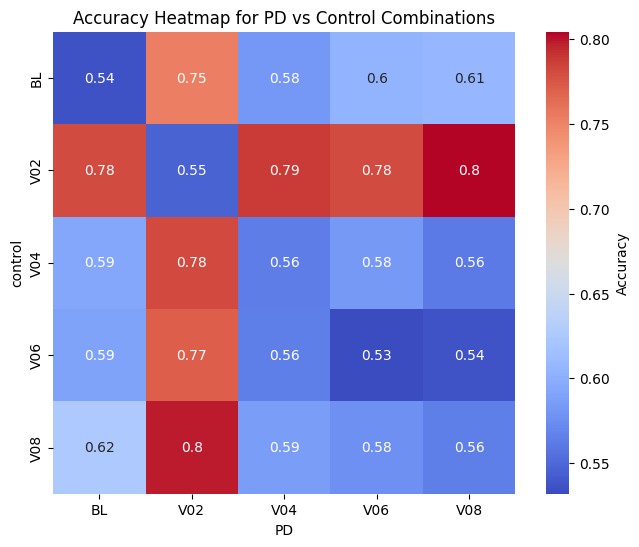

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PD = []
Control= []
acc = []
for i,j in ACCURACY_DICT.items():
    PD.append(i.split('_')[1])
    Control.append(i.split('_')[-1])
    acc.append(j)


accuracy_table_pd_control = pd.DataFrame([PD,Control,acc]).T
accuracy_table_pd_control  = accuracy_table_pd_control.rename(columns = {0:'PD', 1:'control', 2: 'Accuracy'})

accuracy_table_pd_control['Accuracy'] = accuracy_table_pd_control['Accuracy'].astype(float)
heatmap_data_ = accuracy_table_pd_control.pivot(index="control", columns="PD", values="Accuracy")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_, annot=True, cmap="coolwarm", square=True, cbar_kws={'label': 'Accuracy'})
plt.title("Accuracy Heatmap for PD vs Control Combinations")

plt.savefig("../heatmaps_plots/accuracy_heatmaps/mitochondria_con_vs_pd_accuracy_heatmap.svg", format='svg')

plt.show()

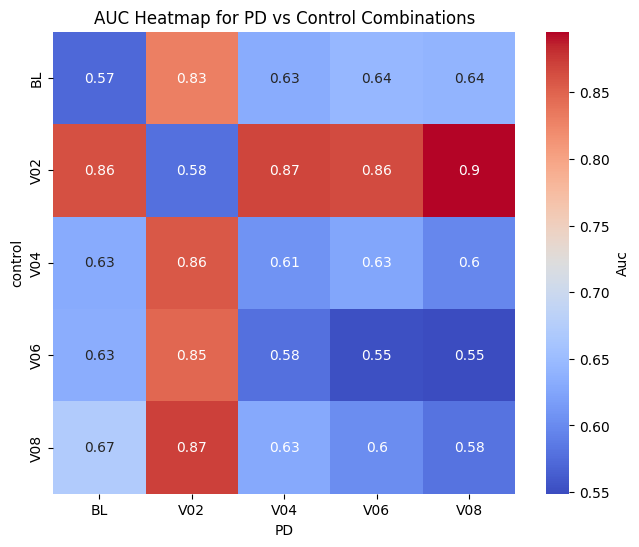

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PD = []
Control= []
auc = []
for i,j in AUC_SCORES.items():
    PD.append(i.split('_')[1])
    Control.append(i.split('_')[-1])
    auc.append(j)


auc_table_pd_control = pd.DataFrame([PD,Control,auc]).T
auc_table_pd_control  = auc_table_pd_control.rename(columns = {0:'PD', 1:'control', 2: 'Auc'})

auc_table_pd_control['Auc'] = auc_table_pd_control['Auc'].astype(float)
heatmap_data_ = auc_table_pd_control.pivot(index="control", columns="PD", values="Auc")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_, annot=True, cmap="coolwarm", square=True, cbar_kws={'label': 'Auc'})
plt.title("AUC Heatmap for PD vs Control Combinations")

plt.savefig("../heatmaps_plots/auc_heatmaps/mitochondria_con_vs_pd_auc_heatmap.svg", format='svg')

plt.show()

In [61]:
df_acc = pd.DataFrame(list(ACCURACY_DICT.items()), columns=['Comparison', 'Accuracy'])
df_auc = pd.DataFrame(list(AUC_SCORES.items()), columns=['Comparison', 'AUC'])
#df_f1  = pd.DataFrame(list(F1_SCORES.items()), columns=['Comparison', 'F1'])
df_precision = pd.DataFrame(list(PRECISION_SCORES.items()), columns=['Comparison', 'Precision'])
df_recall = pd.DataFrame(list(RECALL_SCORES.items()), columns=['Comparison', 'Recall'])

import pandas as pd
from functools import reduce

# List of DataFrames to merge
dfs = [df_acc, df_auc, df_precision, df_recall]

# Merge all DataFrames on 'Comparison'
df_all = reduce(lambda left, right: pd.merge(left, right, on='Comparison'), dfs)

df_all.to_csv('../metrics_csv_files/metrics_mitochondria_con_vs_pd.csv',index = False)

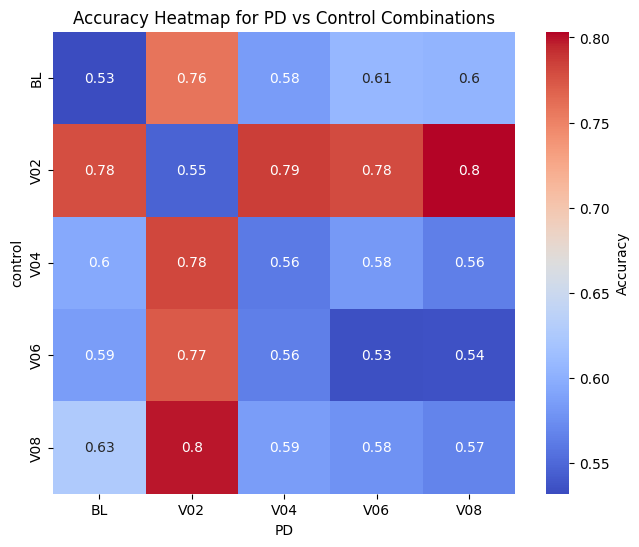

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PD = []
Control= []
acc = []
for i,j in ACCURACY_DICT.items():
    PD.append(i.split('_')[1])
    Control.append(i.split('_')[-1])
    acc.append(j)


accuracy_table_pd_control = pd.DataFrame([PD,Control,acc]).T
accuracy_table_pd_control  = accuracy_table_pd_control.rename(columns = {0:'PD', 1:'control', 2: 'Accuracy'})

accuracy_table_pd_control['Accuracy'] = accuracy_table_pd_control['Accuracy'].astype(float)
heatmap_data_ = accuracy_table_pd_control.pivot(index="control", columns="PD", values="Accuracy")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_, annot=True, cmap="coolwarm", square=True, cbar_kws={'label': 'Accuracy'})
plt.title("Accuracy Heatmap for PD vs Control Combinations")
plt.show()

In [76]:
accuracy_table_pd_control

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


PD control  Accuracy
0   V06     V06  0.534303
1   V06     V08  0.576875
2   V06     V02  0.779761
3   V06     V04  0.582583
4   V06      BL  0.607171
5   V08     V06  0.536045
6   V08     V08  0.568125
7   V08     V02  0.803352
8   V08     V04  0.564167
9   V08      BL  0.603421
10  V02     V06  0.772333
11  V02     V08  0.798266
12  V02     V02  0.546028
13  V02     V04  0.781236
14  V02      BL  0.757947
15  V04     V06  0.564409
16  V04     V08  0.585656
17  V04     V02  0.786099
18  V04     V04  0.561597
19  V04      BL  0.584105
20   BL     V06  0.585576
21   BL     V08  0.626578
22   BL     V02  0.778479
23   BL     V04  0.595083
24   BL      BL  0.532132

In [77]:
heatmap_data_

PD             BL       V02       V04       V06       V08
control                                                  
BL       0.532132  0.757947  0.584105  0.607171  0.603421
V02      0.778479  0.546028  0.786099  0.779761  0.803352
V04      0.595083  0.781236  0.561597  0.582583  0.564167
V06      0.585576  0.772333  0.564409  0.534303  0.536045
V08      0.626578  0.798266  0.585656  0.576875  0.568125

In [78]:

FEATURE_IMPORTANCES['PD_V08_Control_V08_0']
sorted_0_dict_FEATURE_IMPORTANCES_asc = dict(sorted(FEATURE_IMPORTANCES['PD_V08_Control_V08_0'].items(), key=lambda item: item[1]))


In [79]:
sorted_0_dict_FEATURE_IMPORTANCES_asc

{'ENSG00000114026': -0.3958790494213298,
 'ENSG00000160957': -0.3599674013131786,
 'ENSG00000067369': -0.18070450972514288,
 'ENSG00000132781': -0.17141473808110647,
 'ENSG00000103152': -0.12453473496277005,
 'ENSG00000140398': -0.09356118941393672,
 'ENSG00000005156': -0.07657842059230156,
 'ENSG00000116288': -0.057950119083377105,
 'ENSG00000179262': -0.051659626599513404,
 'ENSG00000070501': -0.04496181995516326,
 'ENSG00000128951': -0.011904986820720477,
 'ENSG00000138346': -0.0019455715976295076,
 'ENSG00000065978': 0.000956166922693799,
 'ENSG00000039650': 0.017770439316297335,
 'ENSG00000140521': 0.020132059711958222,
 'ENSG00000100601': 0.04632889232525584,
 'ENSG00000170430': 0.06346654769417877,
 'ENSG00000100823': 0.08836233400748007,
 'ENSG00000076248': 0.09394211867649938,
 'ENSG00000225830': 0.10256463582827717,
 'ENSG00000164306': 0.1508455525539237,
 'ENSG00000012048': 0.2012691424390324,
 'ENSG00000065057': 0.2034666639312661,
 'ENSG00000008405': 0.2062322844583485,
 '

## sorted_1_dict_FEATURE_IMPORTANCES_asc = dict(sorted(FEATURE_IMPORTANCES['Prodromal_V08_Control_V08'].items(), key=lambda item: item[1]))
sorted_1_dict_FEATURE_IMPORTANCES_asc

In [80]:
sorted_2_dict_FEATURE_IMPORTANCES_asc = dict(sorted(FEATURE_IMPORTANCES['PD_V08_Control_V08_0'].items(), key=lambda item: item[1]))
sorted_2_dict_FEATURE_IMPORTANCES_asc

{'ENSG00000114026': -0.3958790494213298,
 'ENSG00000160957': -0.3599674013131786,
 'ENSG00000067369': -0.18070450972514288,
 'ENSG00000132781': -0.17141473808110647,
 'ENSG00000103152': -0.12453473496277005,
 'ENSG00000140398': -0.09356118941393672,
 'ENSG00000005156': -0.07657842059230156,
 'ENSG00000116288': -0.057950119083377105,
 'ENSG00000179262': -0.051659626599513404,
 'ENSG00000070501': -0.04496181995516326,
 'ENSG00000128951': -0.011904986820720477,
 'ENSG00000138346': -0.0019455715976295076,
 'ENSG00000065978': 0.000956166922693799,
 'ENSG00000039650': 0.017770439316297335,
 'ENSG00000140521': 0.020132059711958222,
 'ENSG00000100601': 0.04632889232525584,
 'ENSG00000170430': 0.06346654769417877,
 'ENSG00000100823': 0.08836233400748007,
 'ENSG00000076248': 0.09394211867649938,
 'ENSG00000225830': 0.10256463582827717,
 'ENSG00000164306': 0.1508455525539237,
 'ENSG00000012048': 0.2012691424390324,
 'ENSG00000065057': 0.2034666639312661,
 'ENSG00000008405': 0.2062322844583485,
 '

In [81]:
data.DIAGNOSIS.value_counts()

DIAGNOSIS
PD           1716
Control       869
Prodromal     254
Name: count, dtype: int64

In [82]:
data['DIAGNOSIS_2'] = data['DIAGNOSIS']

/tmp/ipykernel_2839/3022521848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DIAGNOSIS_2'] = data['DIAGNOSIS']


In [83]:
data['DIAGNOSIS'].replace({'Control': '1.Control', 'Prodromal': '2.Prodromal', 'PD': '3.PD'}, inplace=True)


/tmp/ipykernel_2839/1258779229.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['DIAGNOSIS'].replace({'Control': '1.Control', 'Prodromal': '2.Prodromal', 'PD': '3.PD'}, inplace=True)
/tmp/ipykernel_2839/1258779229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DIAGNOSIS'].replace({'Control': '1.Control', 'Prodromal': '2.Prod

In [84]:
data['New_Time_Point'] = data['DIAGNOSIS'] + '_' + data['Time_Point']
data['New_Time_Point_2'] = data['DIAGNOSIS_2'] + '_' + data['Time_Point']

/tmp/ipykernel_2839/3372653969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['New_Time_Point'] = data['DIAGNOSIS'] + '_' + data['Time_Point']
/tmp/ipykernel_2839/3372653969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['New_Time_Point_2'] = data['DIAGNOSIS_2'] + '_' + data['Time_Point']


In [85]:
data = data.sort_values(by = 'New_Time_Point')

In [86]:
tmp_data = data[data.Time_Point !='V02']

In [87]:
tmp_data

DIAGNOSIS Patient_Name Time_Point  ENSG00000103152  ENSG00000164306  \
2979  1.Control         4067         BL          9.38589          5.78732   
1675  1.Control         3555         BL          6.54863          7.58490   
1672  1.Control         3554         BL          6.88679          7.31071   
1663  1.Control         3551         BL         11.87870         12.11110   
1844  1.Control         3614         BL          6.25020          7.99291   
...         ...          ...        ...              ...              ...   
1047       3.PD         3352        V08          2.15646          1.69835   
3260       3.PD         4099        V08          9.31232          9.26247   
578        3.PD         3154        V08          8.92418          6.21250   
1992       3.PD         3700        V08          6.14682          7.56176   
1622       3.PD         3530        V08          6.22193          6.93653   

      ENSG00000100601  ENSG00000005156  ENSG00000104884  ENSG00000070501  \
2979         4.020060          6.09891         1.184190         33.16970   
1675         4.510800          6.36584         0.778523         40.76250   
1672         4.659960          6.44876         0.992975         24.87910   
1663         9.760400         12.00800         1.926670         43.18820   
1844         3.200520          4.37542         0.756572         25.19460   
...               ...              ...              ...              ...   
1047         0.960342          1.46049         0.370031          7.21169   
3260         3.991400          8.73973         1.033030         41.35840   
578          4.734370          7.30405         0.977768         25.74400   
1992         4.180610          4.31062         1.099080         24.44920   
1622         2.558050          4.71107         0.587091         38.06040   

      ENSG00000114026  ...  ENSG00000012048  ENSG00000039650  ENSG00000170430  \
2979         4.836210  ...          5.11343         17.84840          6.92071   
1675         4.137930  ...          5.26091         16.43070          6.21612   
1672         4.643620  ...          2.82477         17.07830          4.77400   
1663         7.491670  ...          5.69105         31.90520         10.87780   
1844         3.569420  ...          2.23750          9.78251          4.59095   
...               ...  ...              ...              ...              ...   
1047         0.890893  ...          1.22691          3.03134          1.54699   
3260         3.362820  ...          5.92975         13.18660          8.62330   
578          3.823230  ...          3.48433         13.01380          7.54205   
1992         3.235300  ...          3.01487         11.57940          3.90116   
1622         2.561270  ...          3.57158          8.77721          4.61662   

      ENSG00000140398  ENSG00000225830  ENSG00000100823  ENSG00000065057  \
2979         3.484700         13.59440         21.78290         3.844120   
1675         2.444060         12.73500         14.68530         4.035780   
1672         2.980860         10.14690         12.65730         2.467660   
1663         4.687420         18.12580         15.80670         5.240480   
1844         3.041110          8.10421         14.21760         2.440290   
...               ...              ...              ...              ...   
1047         0.593909          2.98596          5.40956         0.800655   
3260         3.283580         12.70930         19.86150         3.214260   
578          3.657460         13.37260         22.23870         3.589930   
1992         2.410730          9.89227         14.28070         2.289140   
1622         1.150310         10.33190         12.41180         2.275900   

      DIAGNOSIS_2  New_Time_Point  New_Time_Point_2  
2979      Control    1.Control_BL        Control_BL  
1675      Control    1.Control_BL        Control_BL  
1672      Control    1.Control_BL        Control_BL  
1663      Control    1.Control_BL        Control_BL  
1844      Co

In [88]:
df = pd.DataFrame(sorted_2_dict_FEATURE_IMPORTANCES_asc.items())
df[2] = np.abs(df[1])
df = df.sort_values(by = 2, ascending=False)
df

0         1         2
0   ENSG00000114026 -0.395879  0.395879
26  ENSG00000104884  0.395532  0.395532
1   ENSG00000160957 -0.359967  0.359967
25  ENSG00000051341  0.266273  0.266273
24  ENSG00000154328  0.253161  0.253161
23  ENSG00000008405  0.206232  0.206232
22  ENSG00000065057  0.203467  0.203467
21  ENSG00000012048  0.201269  0.201269
2   ENSG00000067369 -0.180705  0.180705
3   ENSG00000132781 -0.171415  0.171415
20  ENSG00000164306  0.150846  0.150846
4   ENSG00000103152 -0.124535  0.124535
19  ENSG00000225830  0.102565  0.102565
18  ENSG00000076248  0.093942  0.093942
5   ENSG00000140398 -0.093561  0.093561
17  ENSG00000100823  0.088362  0.088362
6   ENSG00000005156 -0.076578  0.076578
16  ENSG00000170430  0.063467  0.063467
7   ENSG00000116288 -0.057950  0.057950
8   ENSG00000179262 -0.051660  0.051660
15  ENSG00000100601  0.046329  0.046329
9   ENSG00000070501 -0.044962  0.044962
14  ENSG00000140521  0.020132  0.020132
13  ENSG00000039650  0.017770  0.017770
10  ENSG00000128951 -0.011905  0.011905
11  ENSG00000138346 -0.001946  0.001946
12  ENSG00000065978  0.000956  0.000956

In [89]:
tmp_data

DIAGNOSIS Patient_Name Time_Point  ENSG00000103152  ENSG00000164306  \
2979  1.Control         4067         BL          9.38589          5.78732   
1675  1.Control         3555         BL          6.54863          7.58490   
1672  1.Control         3554         BL          6.88679          7.31071   
1663  1.Control         3551         BL         11.87870         12.11110   
1844  1.Control         3614         BL          6.25020          7.99291   
...         ...          ...        ...              ...              ...   
1047       3.PD         3352        V08          2.15646          1.69835   
3260       3.PD         4099        V08          9.31232          9.26247   
578        3.PD         3154        V08          8.92418          6.21250   
1992       3.PD         3700        V08          6.14682          7.56176   
1622       3.PD         3530        V08          6.22193          6.93653   

      ENSG00000100601  ENSG00000005156  ENSG00000104884  ENSG00000070501  \
2979         4.020060          6.09891         1.184190         33.16970   
1675         4.510800          6.36584         0.778523         40.76250   
1672         4.659960          6.44876         0.992975         24.87910   
1663         9.760400         12.00800         1.926670         43.18820   
1844         3.200520          4.37542         0.756572         25.19460   
...               ...              ...              ...              ...   
1047         0.960342          1.46049         0.370031          7.21169   
3260         3.991400          8.73973         1.033030         41.35840   
578          4.734370          7.30405         0.977768         25.74400   
1992         4.180610          4.31062         1.099080         24.44920   
1622         2.558050          4.71107         0.587091         38.06040   

      ENSG00000114026  ...  ENSG00000012048  ENSG00000039650  ENSG00000170430  \
2979         4.836210  ...          5.11343         17.84840          6.92071   
1675         4.137930  ...          5.26091         16.43070          6.21612   
1672         4.643620  ...          2.82477         17.07830          4.77400   
1663         7.491670  ...          5.69105         31.90520         10.87780   
1844         3.569420  ...          2.23750          9.78251          4.59095   
...               ...  ...              ...              ...              ...   
1047         0.890893  ...          1.22691          3.03134          1.54699   
3260         3.362820  ...          5.92975         13.18660          8.62330   
578          3.823230  ...          3.48433         13.01380          7.54205   
1992         3.235300  ...          3.01487         11.57940          3.90116   
1622         2.561270  ...          3.57158          8.77721          4.61662   

      ENSG00000140398  ENSG00000225830  ENSG00000100823  ENSG00000065057  \
2979         3.484700         13.59440         21.78290         3.844120   
1675         2.444060         12.73500         14.68530         4.035780   
1672         2.980860         10.14690         12.65730         2.467660   
1663         4.687420         18.12580         15.80670         5.240480   
1844         3.041110          8.10421         14.21760         2.440290   
...               ...              ...              ...              ...   
1047         0.593909          2.98596          5.40956         0.800655   
3260         3.283580         12.70930         19.86150         3.214260   
578          3.657460         13.37260         22.23870         3.589930   
1992         2.410730          9.89227         14.28070         2.289140   
1622         1.150310         10.33190         12.41180         2.275900   

      DIAGNOSIS_2  New_Time_Point  New_Time_Point_2  
2979      Control    1.Control_BL        Control_BL  
1675      Control    1.Control_BL        Control_BL  
1672      Control    1.Control_BL        Control_BL  
1663      Control    1.Control_BL        Control_BL  
1844      Co

In [90]:
tmp_data.New_Time_Point_2.unique()

array(['Control_BL', 'Control_V04', 'Control_V06', 'Control_V08',
       'Prodromal_BL', 'Prodromal_V04', 'Prodromal_V06', 'Prodromal_V08',
       'PD_BL', 'PD_V04', 'PD_V06', 'PD_V08'], dtype=object)

In [91]:
genes = df[0].values.tolist()

In [92]:
control_tmp_data = tmp_data[tmp_data['New_Time_Point_2'].str.startswith('Control')]
control_tmp_data = control_tmp_data.sort_values(by = 'New_Time_Point') 
control_tmp_data

DIAGNOSIS Patient_Name Time_Point  ENSG00000103152  ENSG00000164306  \
2979  1.Control         4067         BL          9.38589          5.78732   
497   1.Control         3114         BL          5.61130          5.25938   
782   1.Control         3222         BL          4.38430          4.65817   
777   1.Control         3221         BL          7.06867          7.68997   
596   1.Control         3161         BL          3.83322          3.60128   
...         ...          ...        ...              ...              ...   
1090  1.Control         3361        V08          5.79354          6.28531   
1722  1.Control         3570        V08          8.08844          7.37626   
1598  1.Control         3523        V08          2.64933          5.42830   
2498  1.Control         3950        V08          6.94006          5.40553   
722   1.Control         3206        V08          7.87797         12.44980   

      ENSG00000100601  ENSG00000005156  ENSG00000104884  ENSG00000070501  \
2979          4.02006          6.09891         1.184190         33.16970   
497           3.00982          7.00288         1.018360         30.40690   
782           2.17810          4.14971         0.322208         26.38660   
777           4.41089          6.94779         1.412730         26.51370   
596           2.59674          3.44844         0.684448         17.07510   
...               ...              ...              ...              ...   
1090          3.24686          4.81919         0.916050         35.32200   
1722          4.71011          7.12054         1.161800         30.12410   
1598          1.98438          2.40629         0.429180          9.65064   
2498          3.47111          8.24968         1.524200         34.94610   
722           6.88936         11.24680         1.286500         32.44930   

      ENSG00000114026  ...  ENSG00000012048  ENSG00000039650  ENSG00000170430  \
2979          4.83621  ...          5.11343         17.84840          6.92071   
497           5.26165  ...          2.61060         11.64300          3.69205   
782           2.31834  ...          2.34246          8.25103          3.69590   
777           4.97410  ...          3.69350         19.93570          6.48665   
596           2.65527  ...          2.33883          7.73092          3.80952   
...               ...  ...              ...              ...              ...   
1090          4.18232  ...          4.98453         13.60470          5.09253   
1722          4.54428  ...          3.96754         14.22040          6.24888   
1598          2.02114  ...          2.00904          3.74589          3.11001   
2498          5.29185  ...          4.34254         32.97290          5.87056   
722           6.30491  ...          3.28348         20.45900          9.94688   

      ENSG00000140398  ENSG00000225830  ENSG00000100823  ENSG00000065057  \
2979         3.484700         13.59440         21.78290          3.84412   
497          4.294630          9.86873         18.83620          2.99104   
782          1.675930          8.43445          9.41278          1.65070   
777          2.900860          9.25708         20.01960          2.77741   
596          1.524200          7.38983         15.14530          1.41279   
...               ...              ...              ...              ...   
1090         2.600350         11.25420         10.68210          2.49363   
1722         2.023230         12.35130         14.48380          3.70852   
1598         0.903771          6.43806          7.32909          1.22470   
2498         5.286540          8.24819         12.19560          2.52026   
722          3.039710         14.45260         25.11660          4.83289   

      DIAGNOSIS_2  New_Time_Point  New_Time_Point_2  
2979      Control    1.Control_BL        Control_BL  
497       Control    1.Control_BL        Control_BL  
782       Control    1.Control_BL        Control_BL  
777       Control    1.Control_BL        Control_BL  
596       Co

In [93]:
def return_gene_name(ensembleid):

    try:
        return results[results['Gene stable ID'] == ensembleid]['Gene name'].values[0]
    except:
        return ensembleid

tmp_df = df.reset_index()


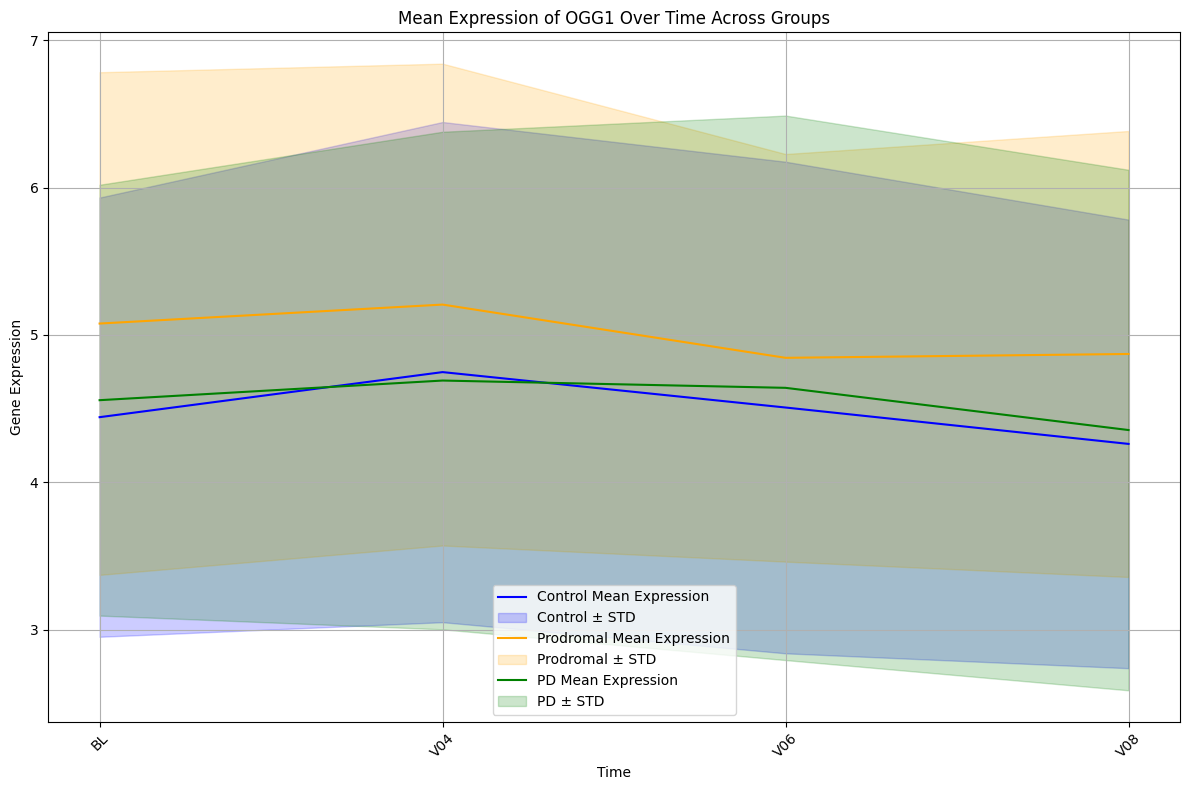

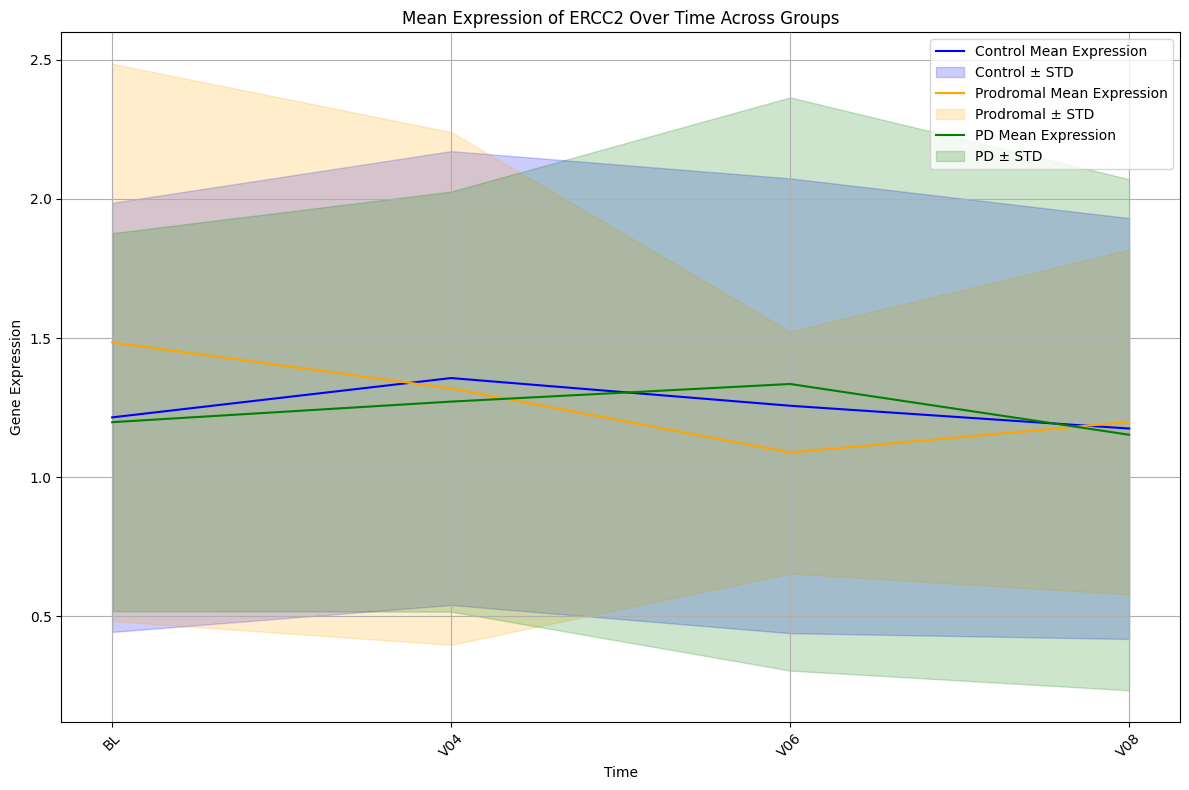

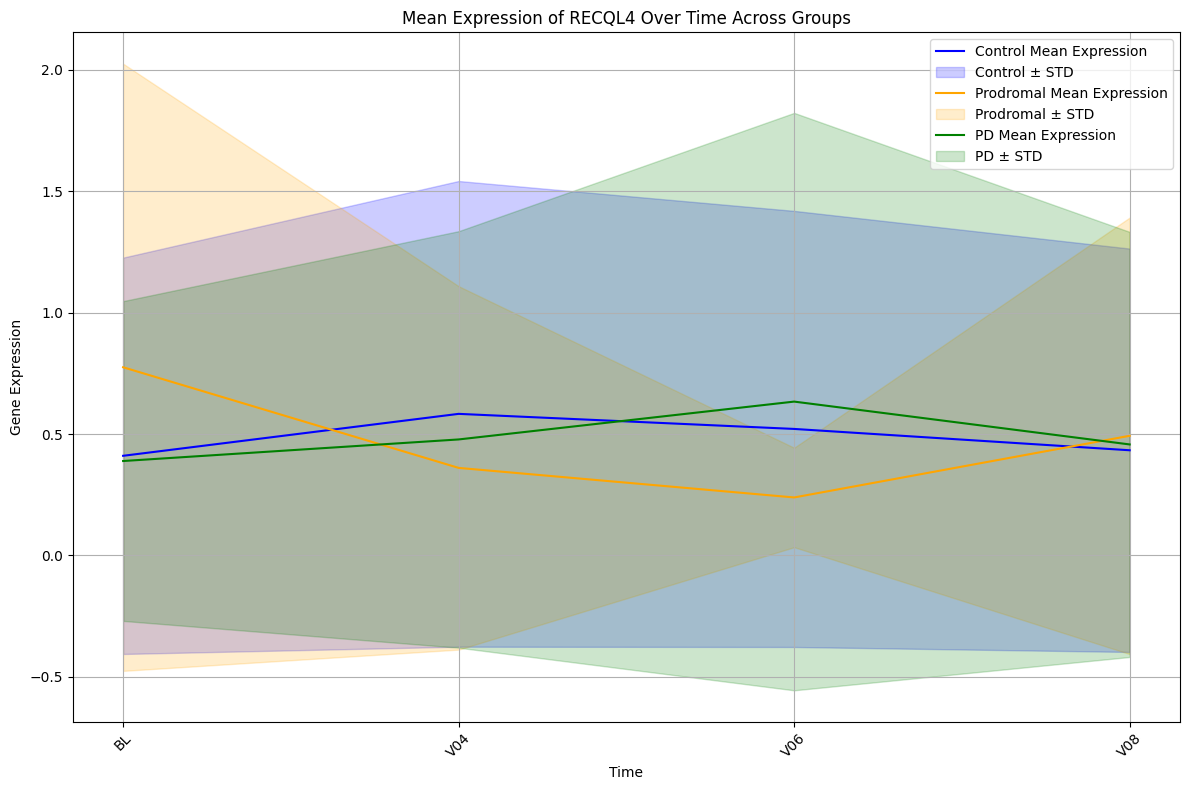

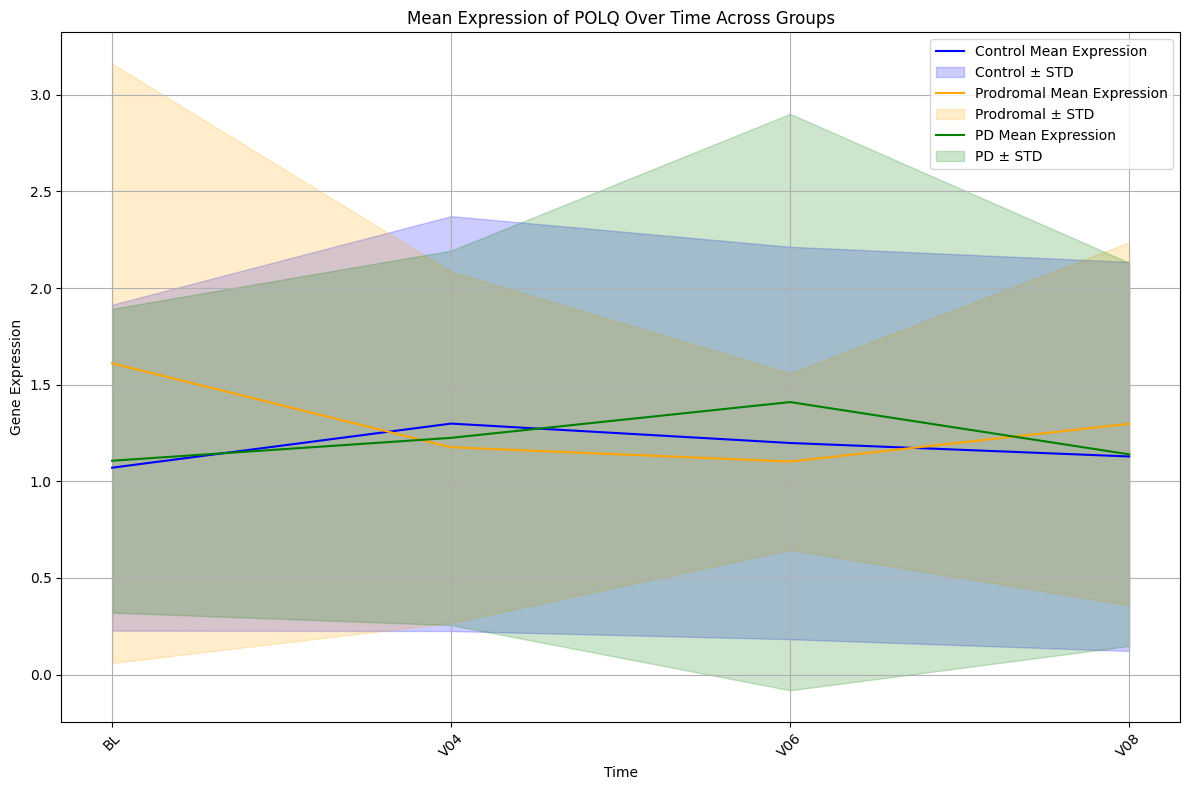

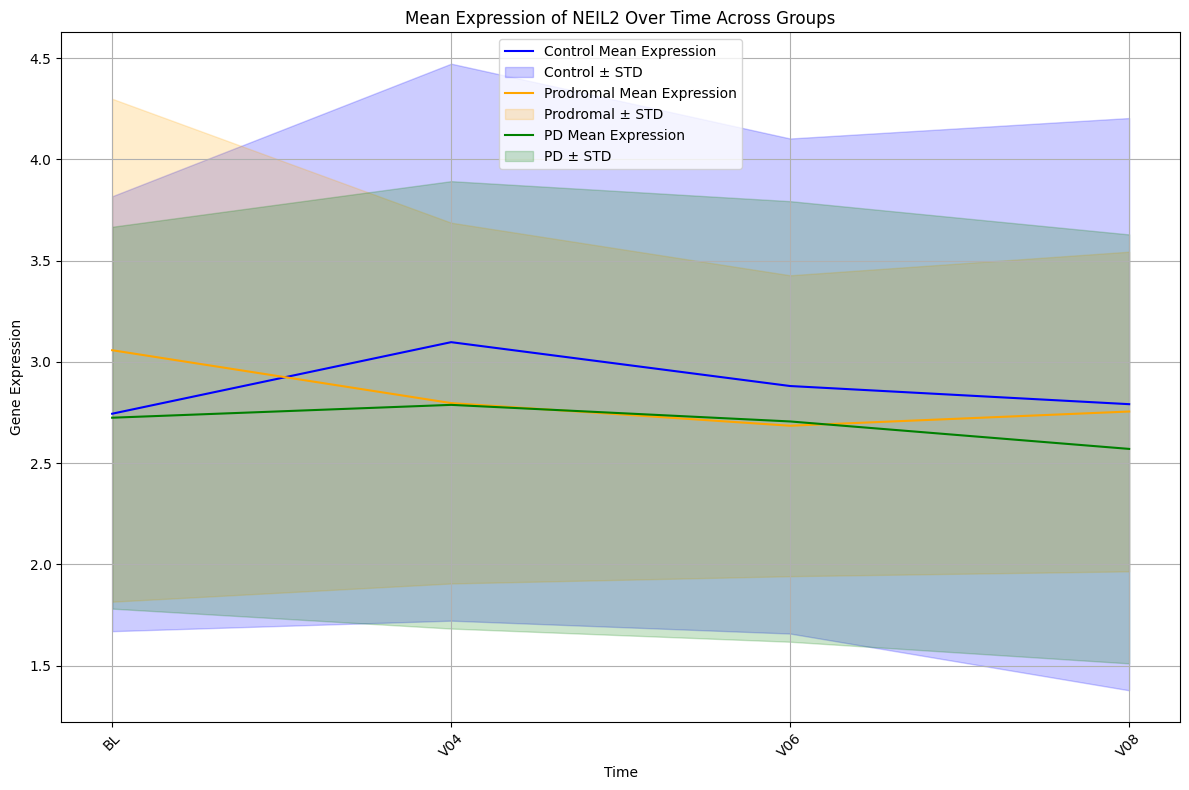

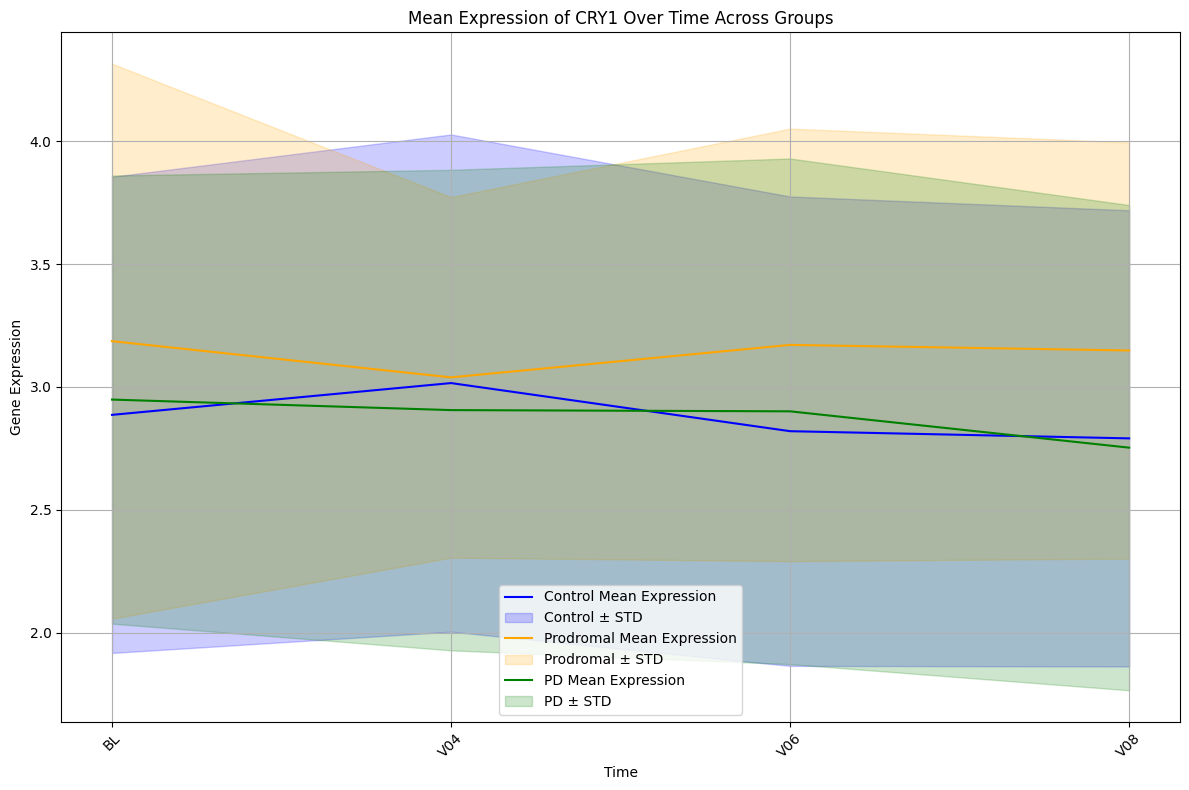

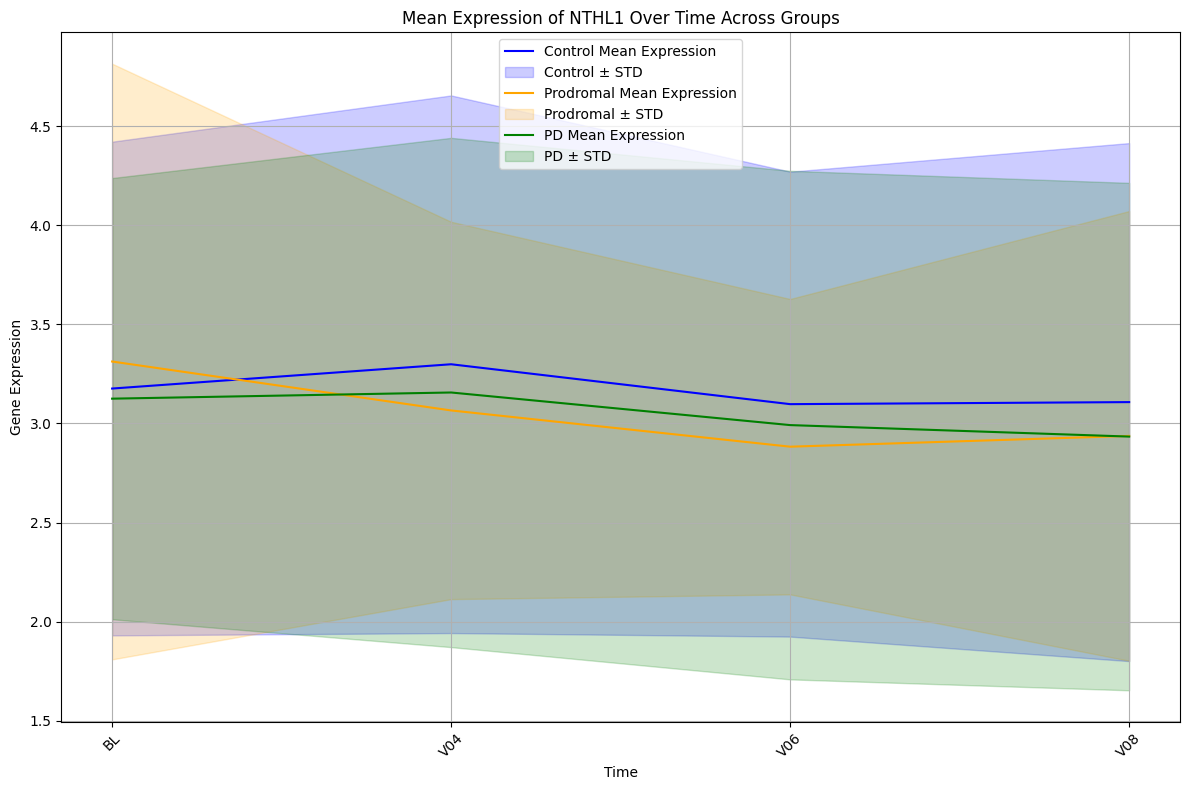

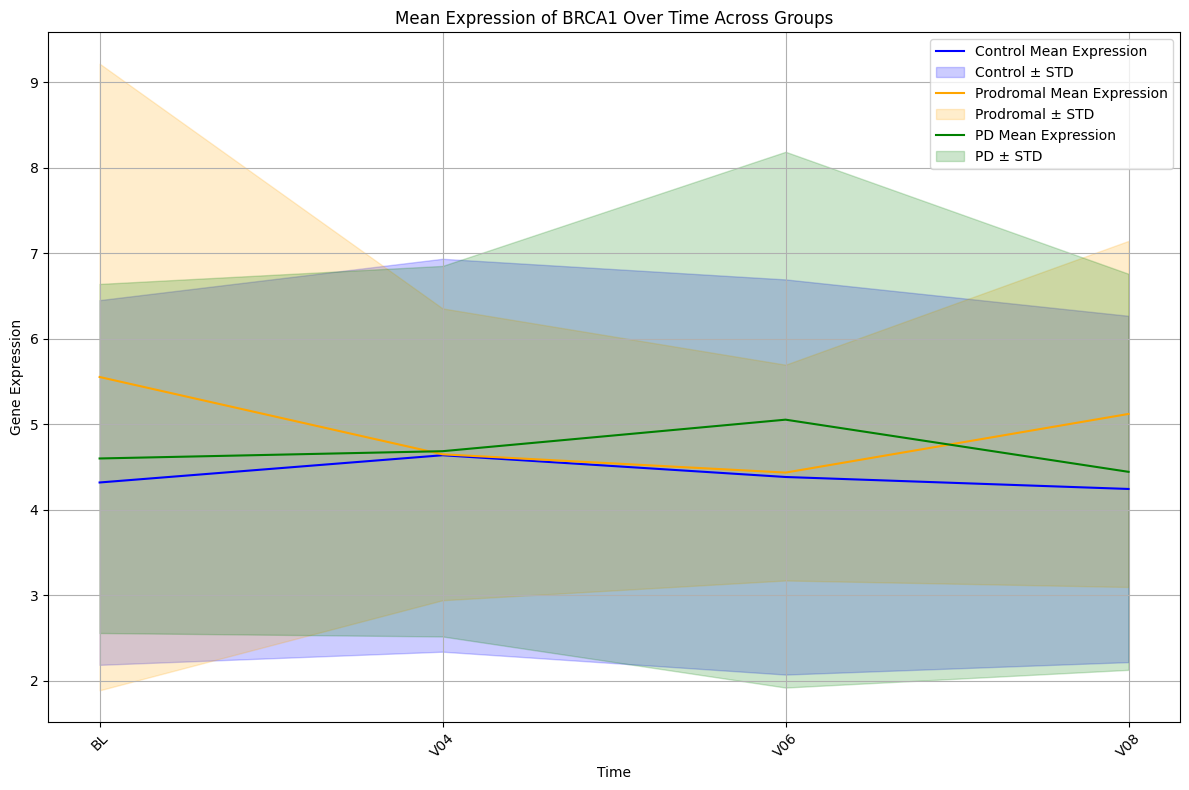

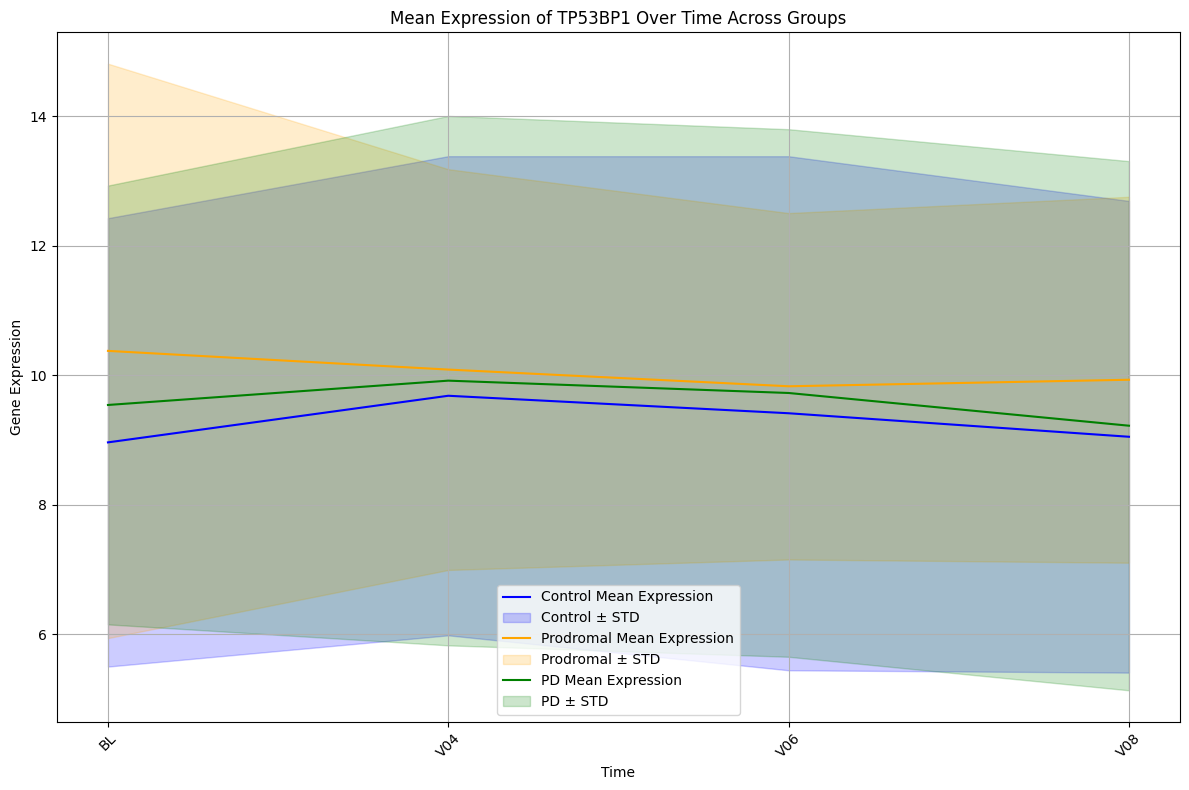

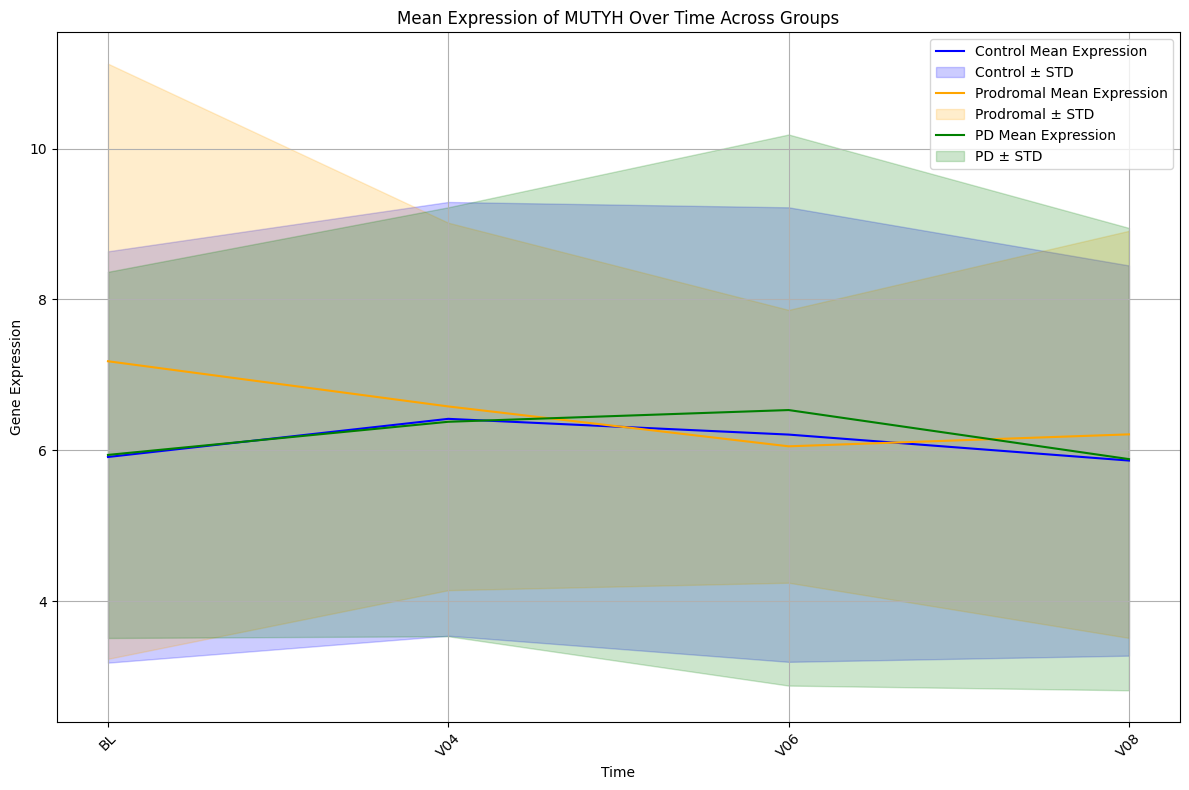

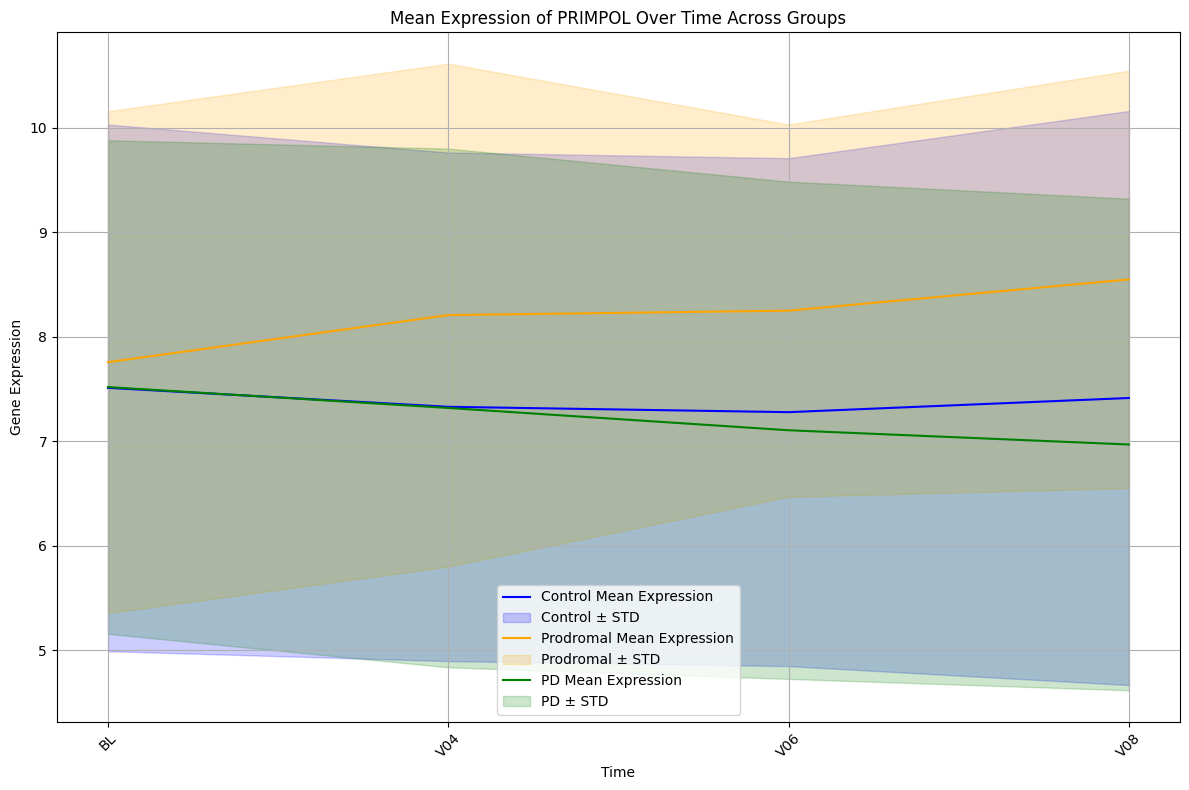

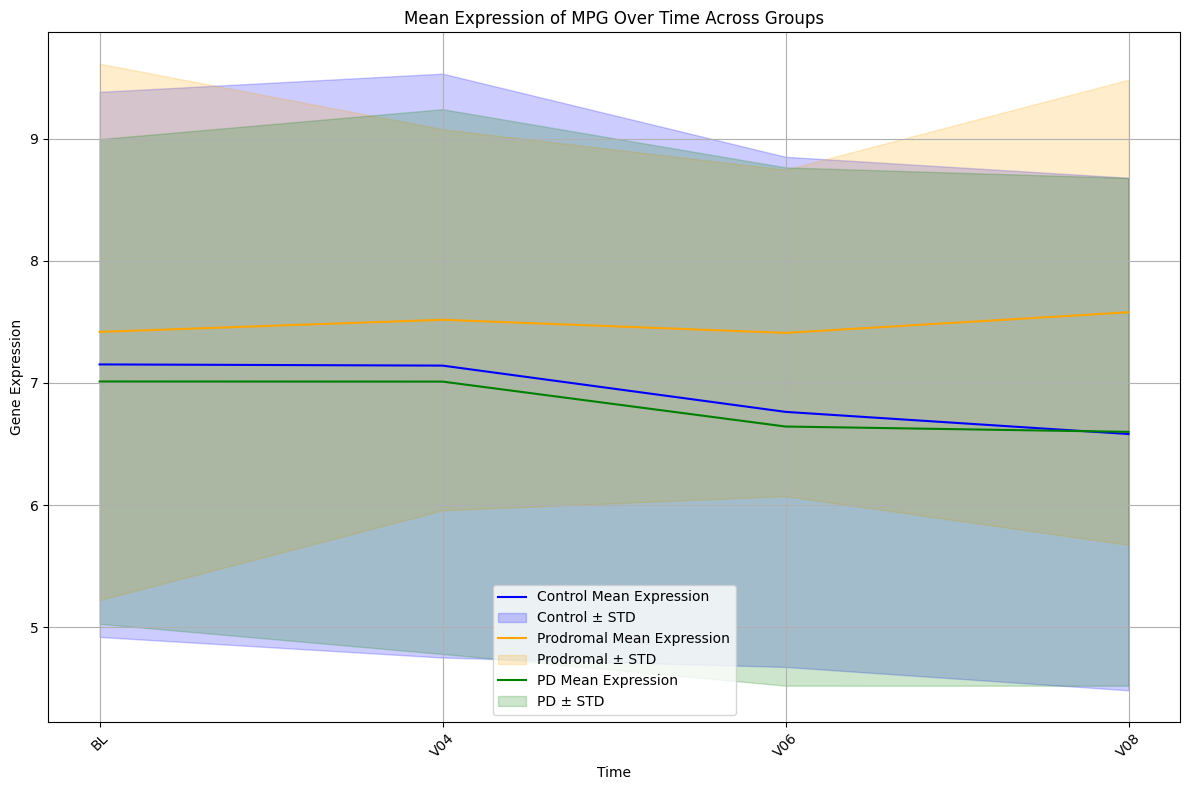

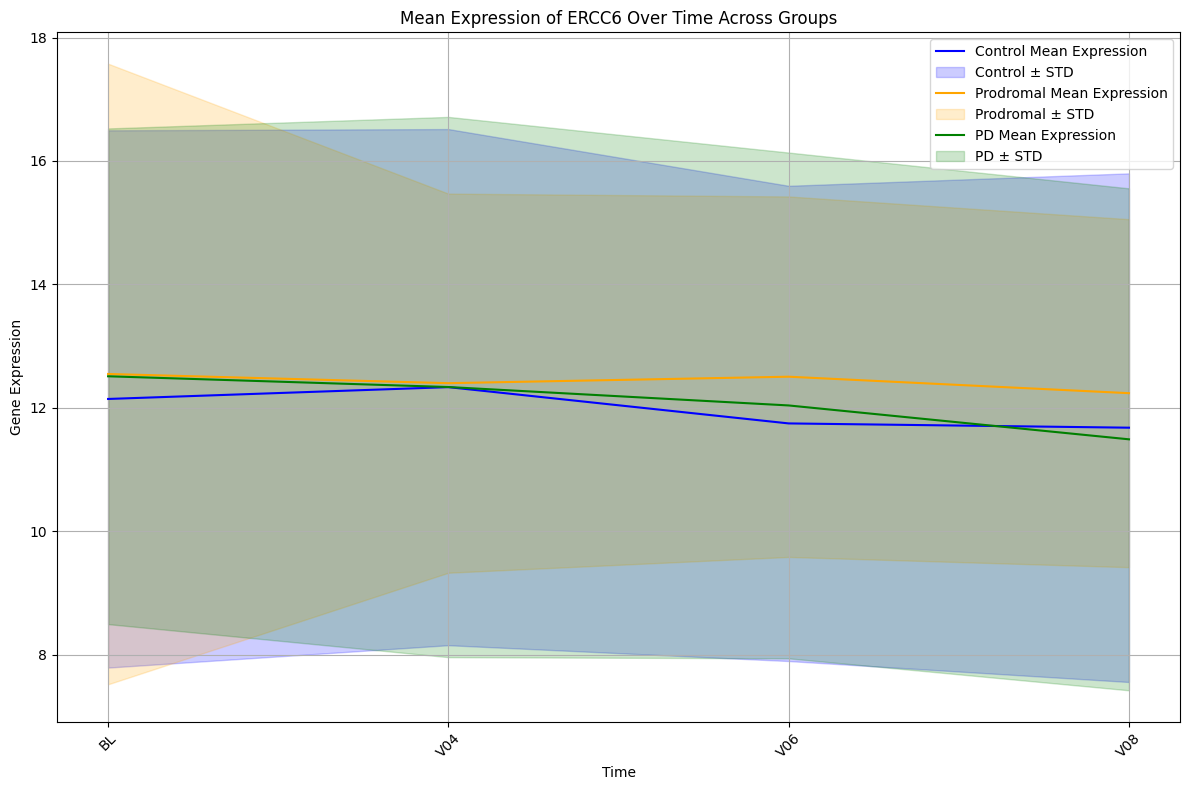

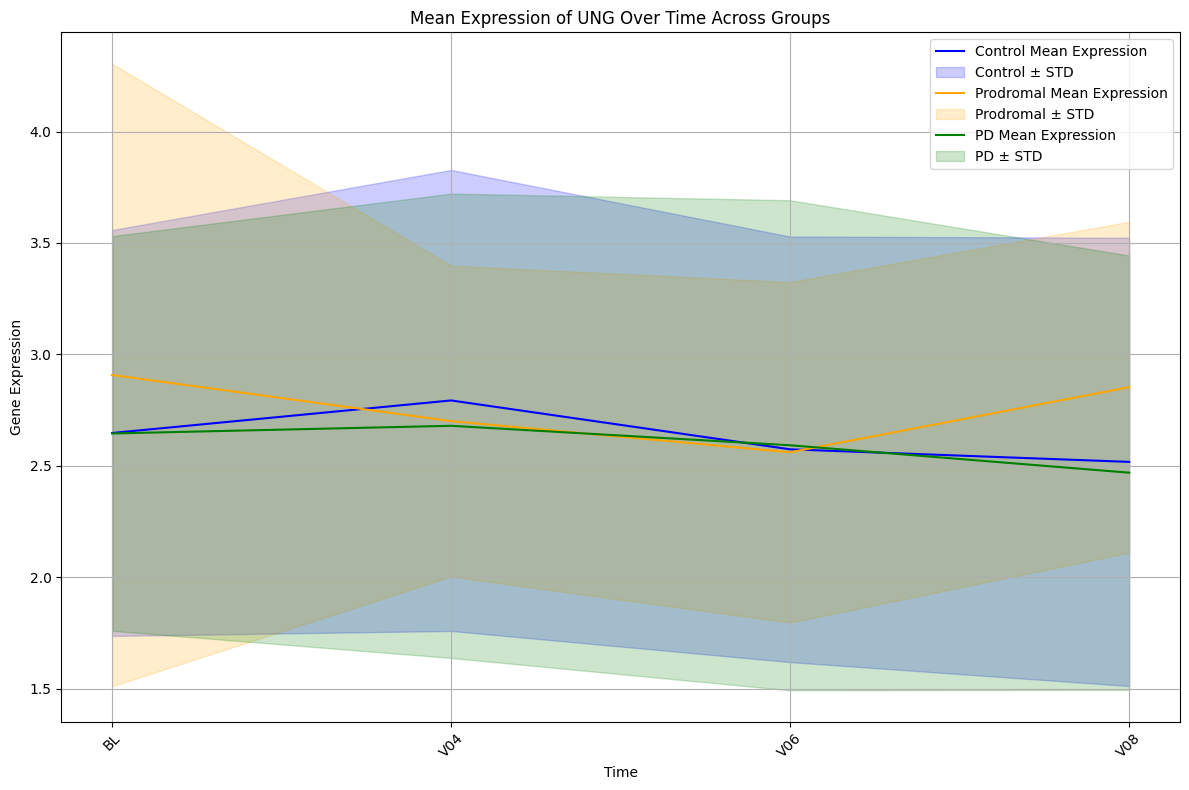

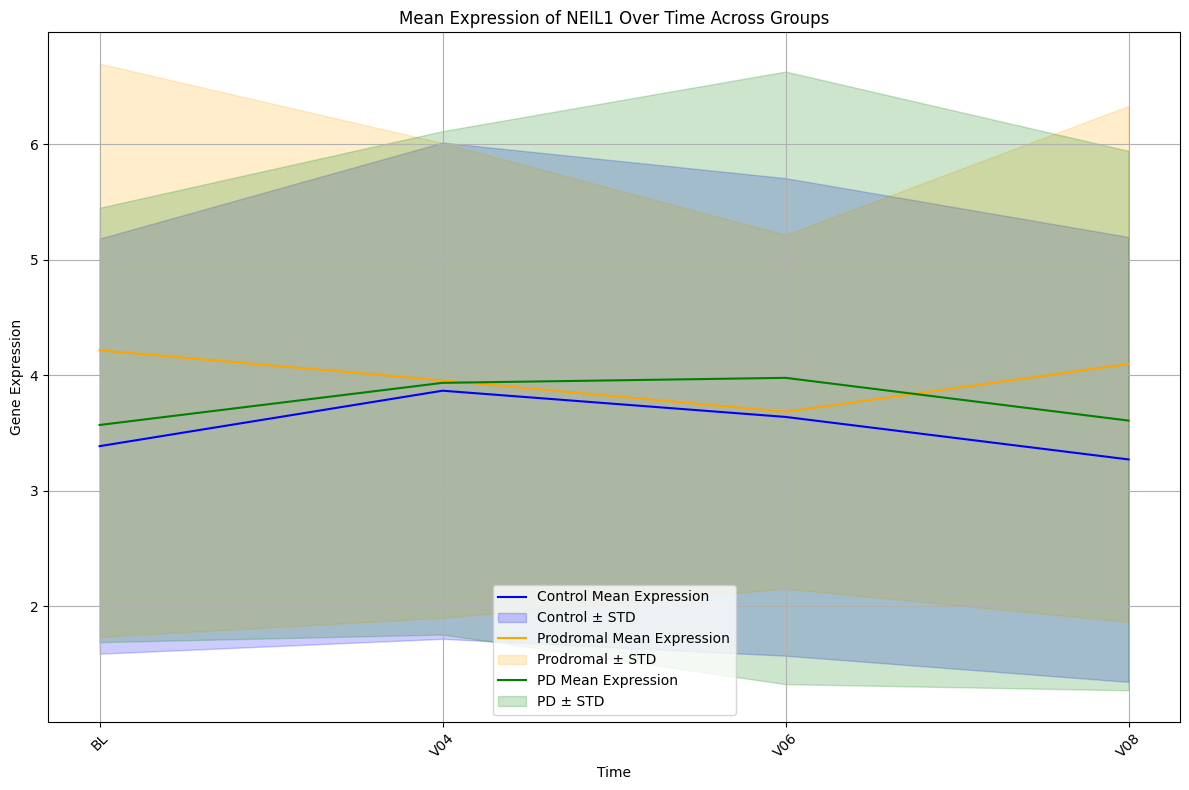

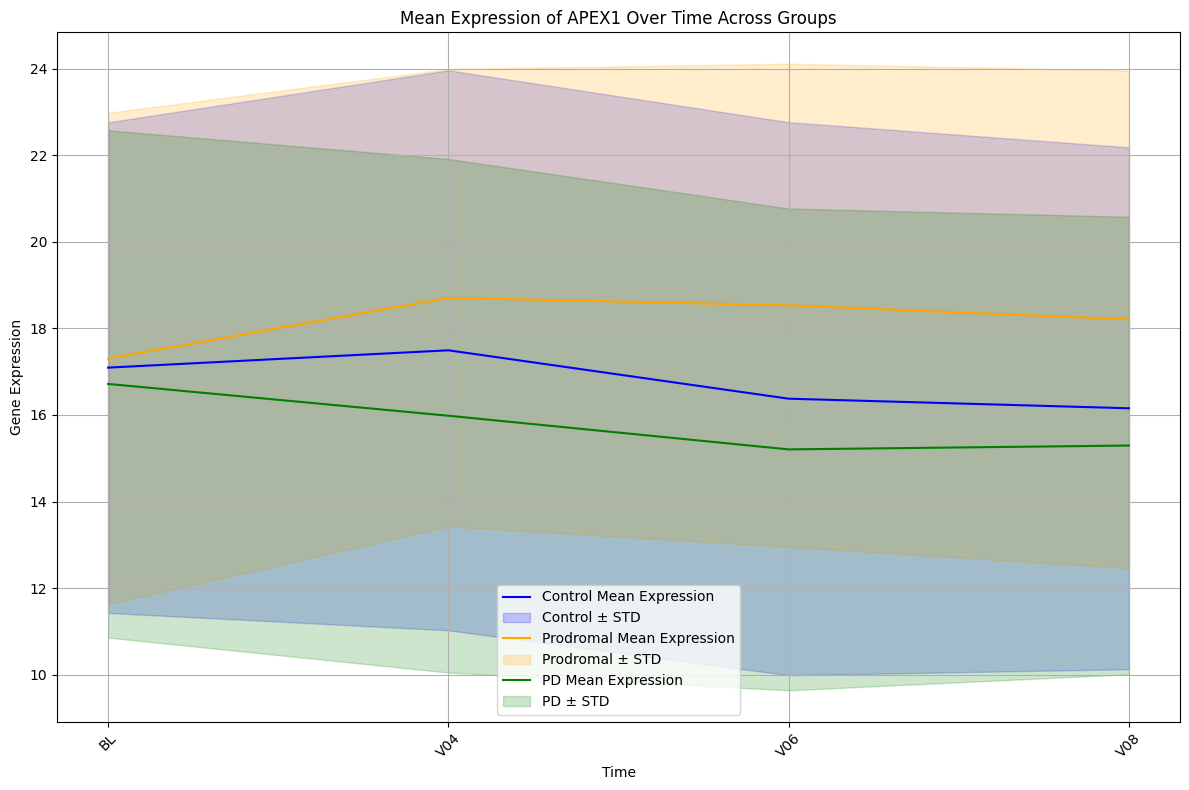

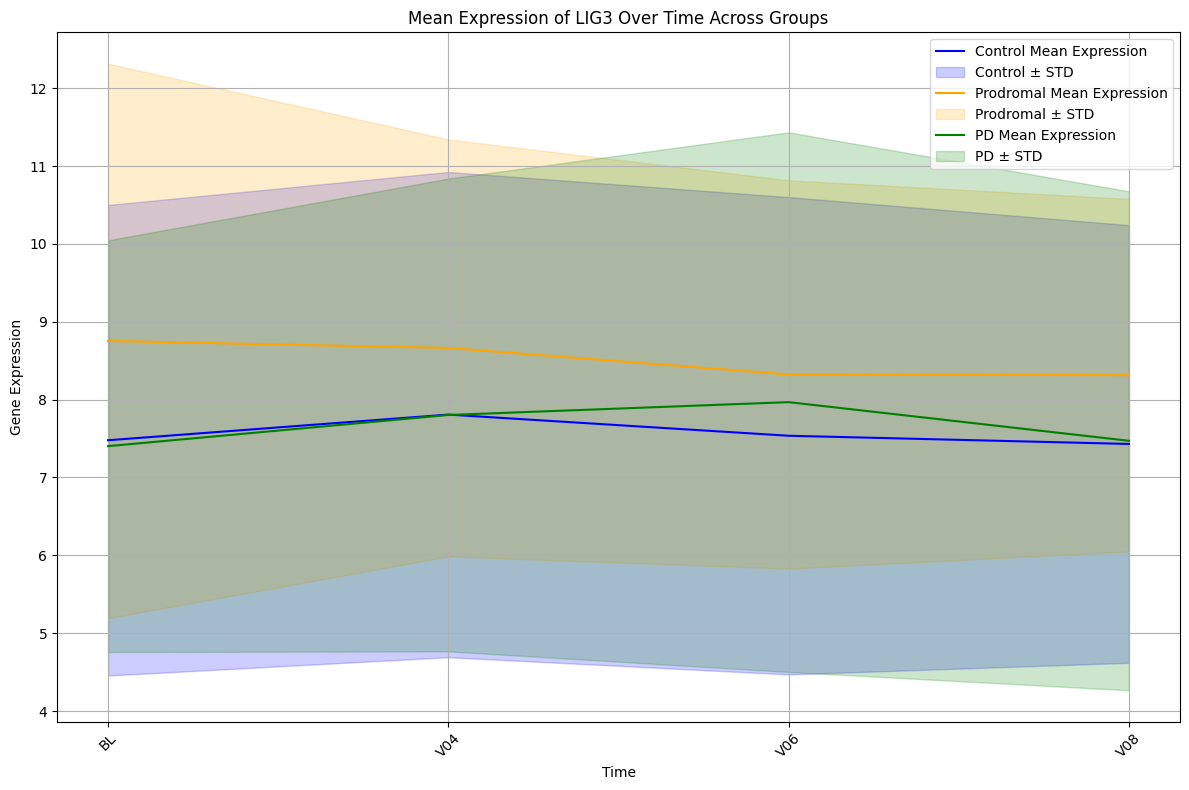

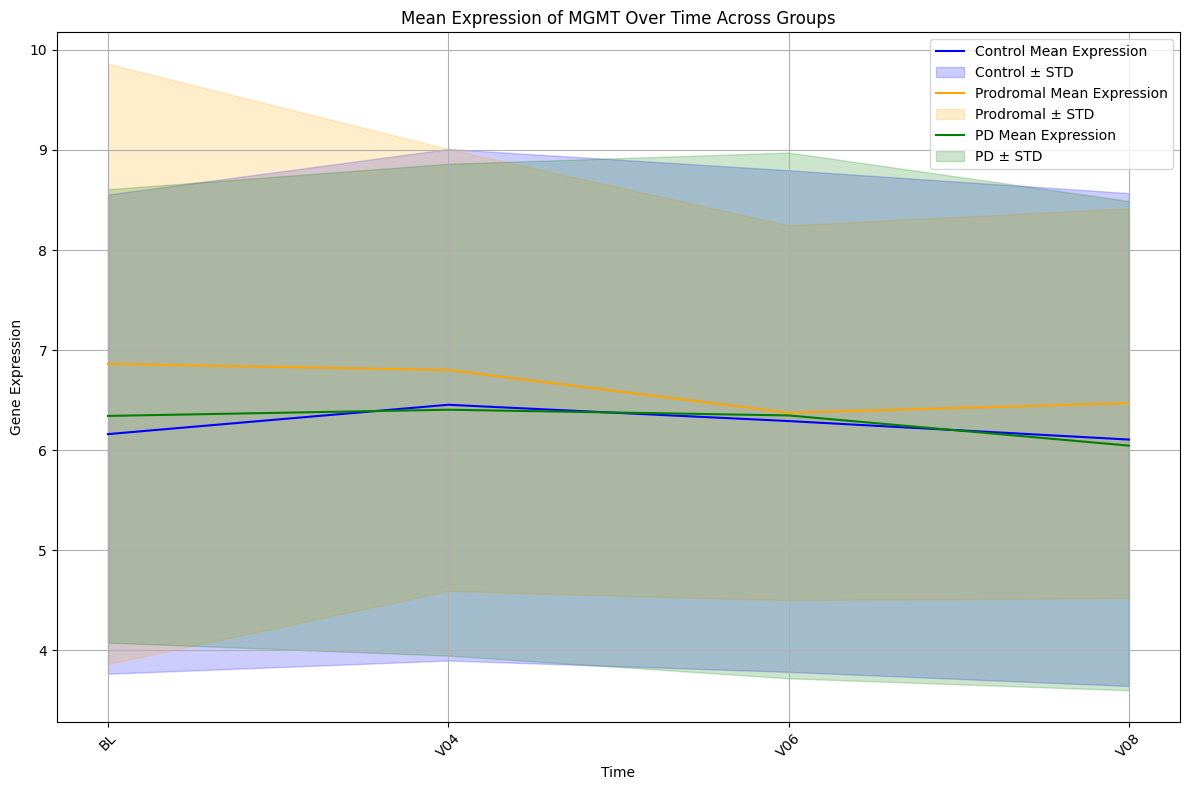

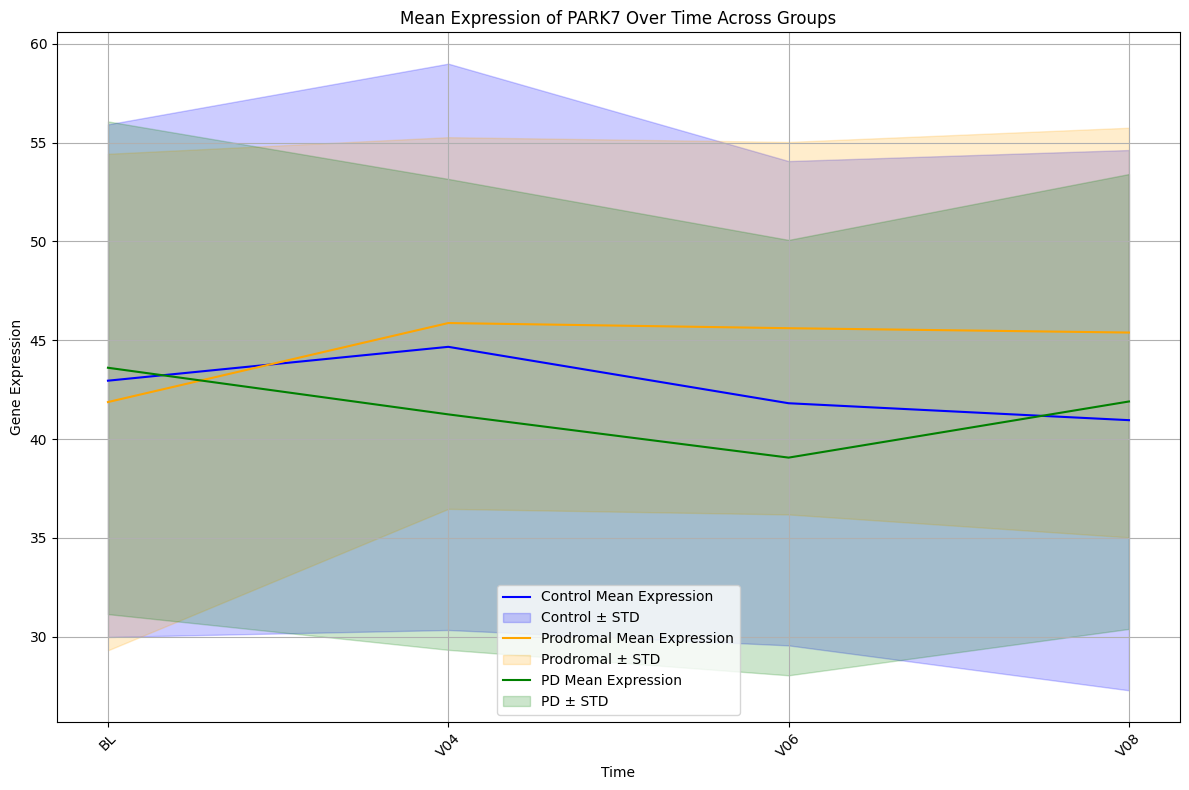

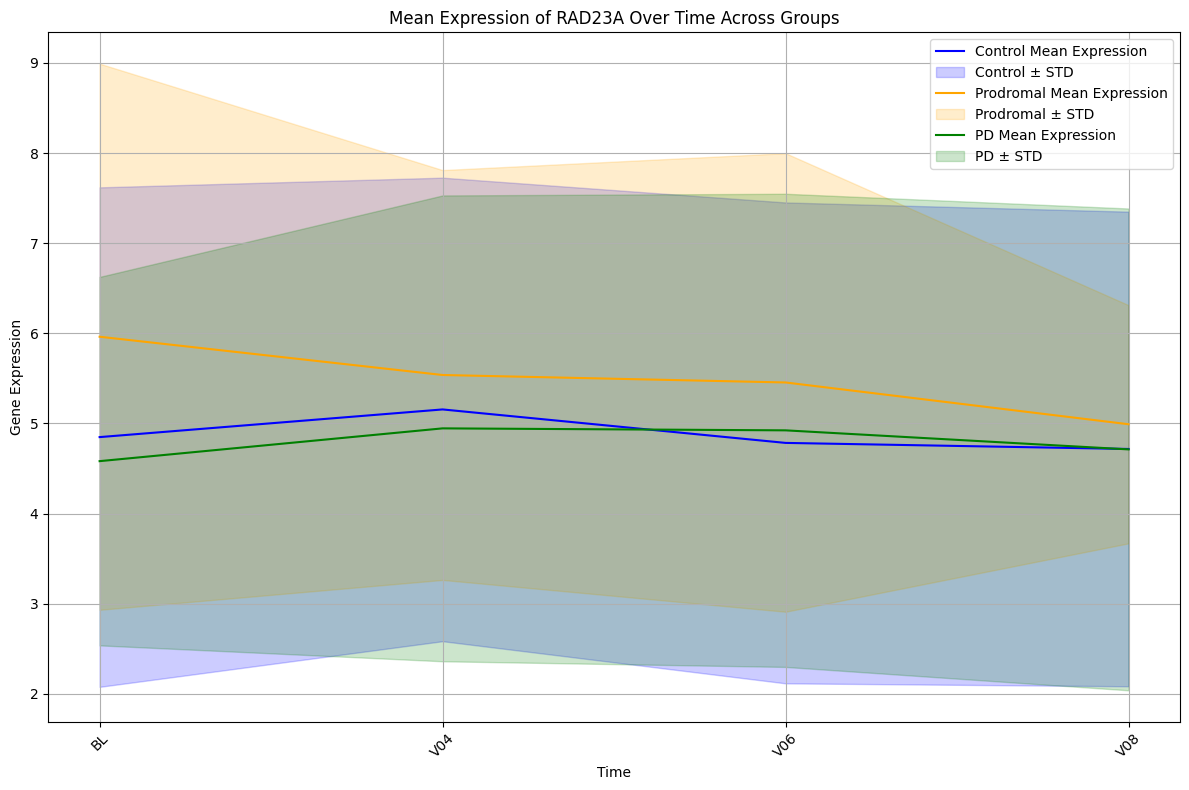

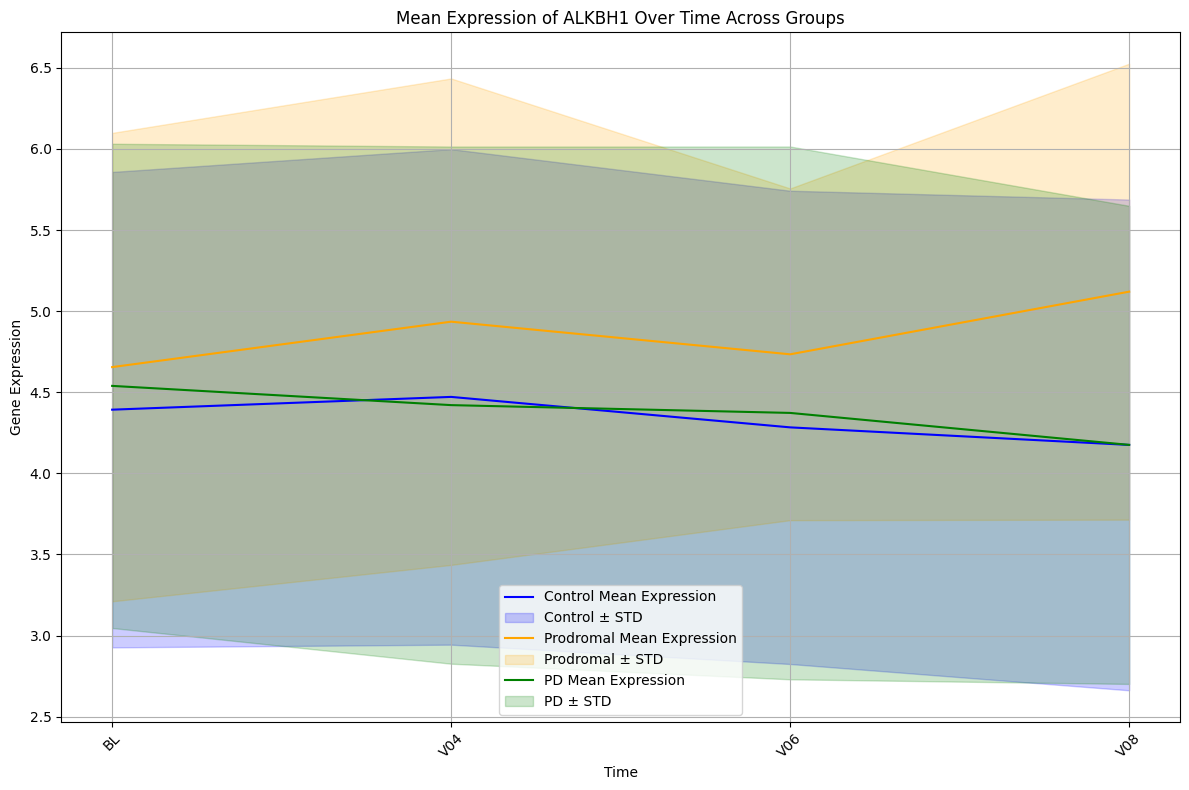

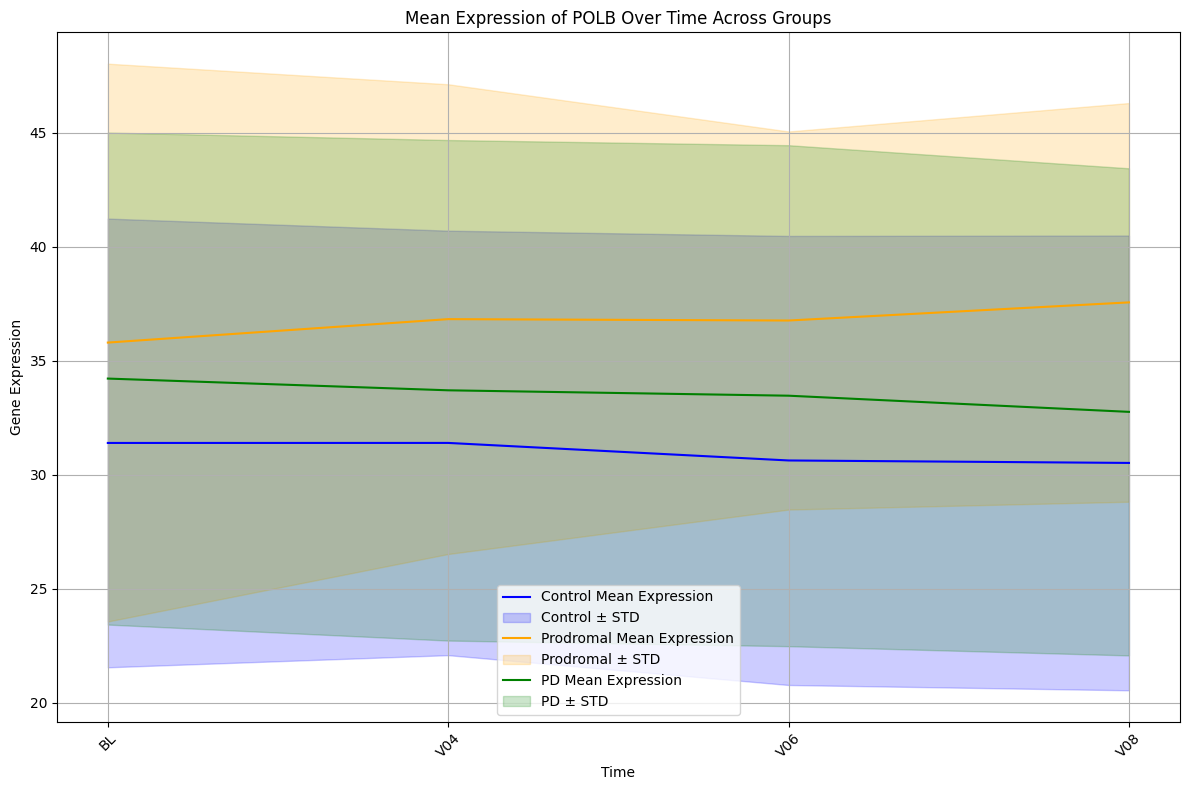

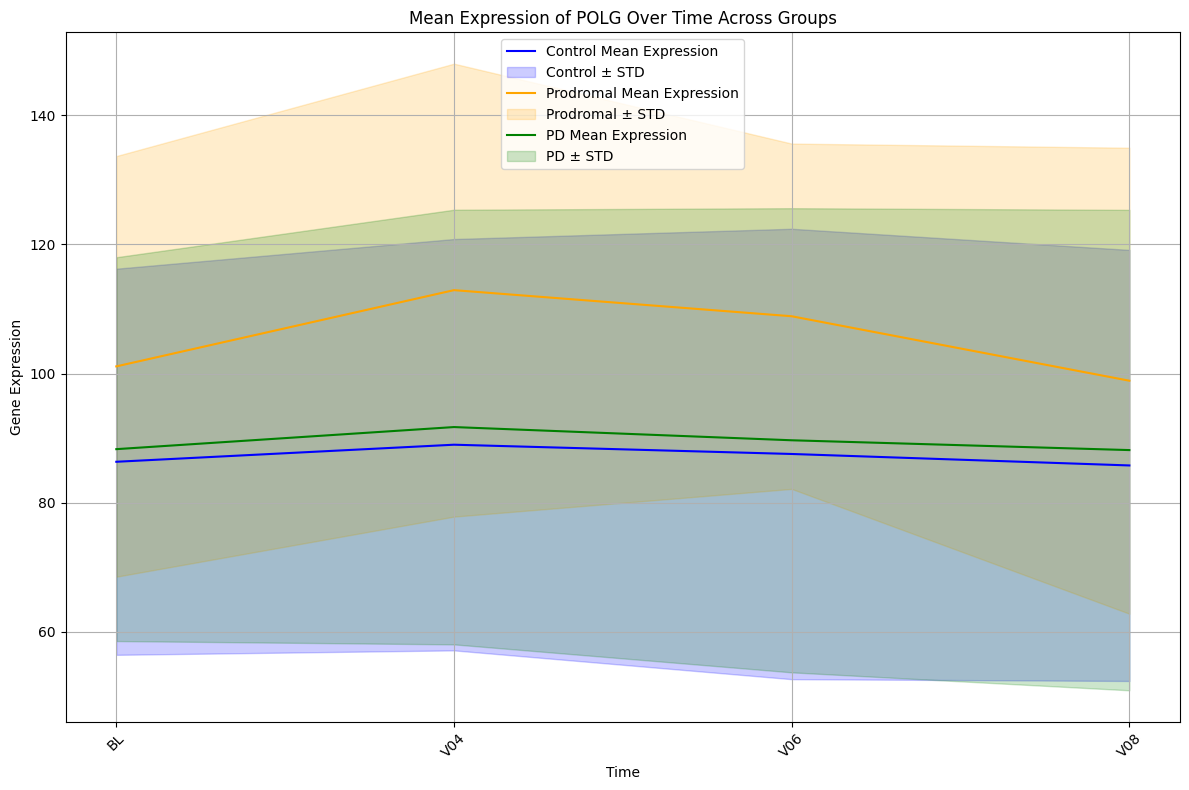

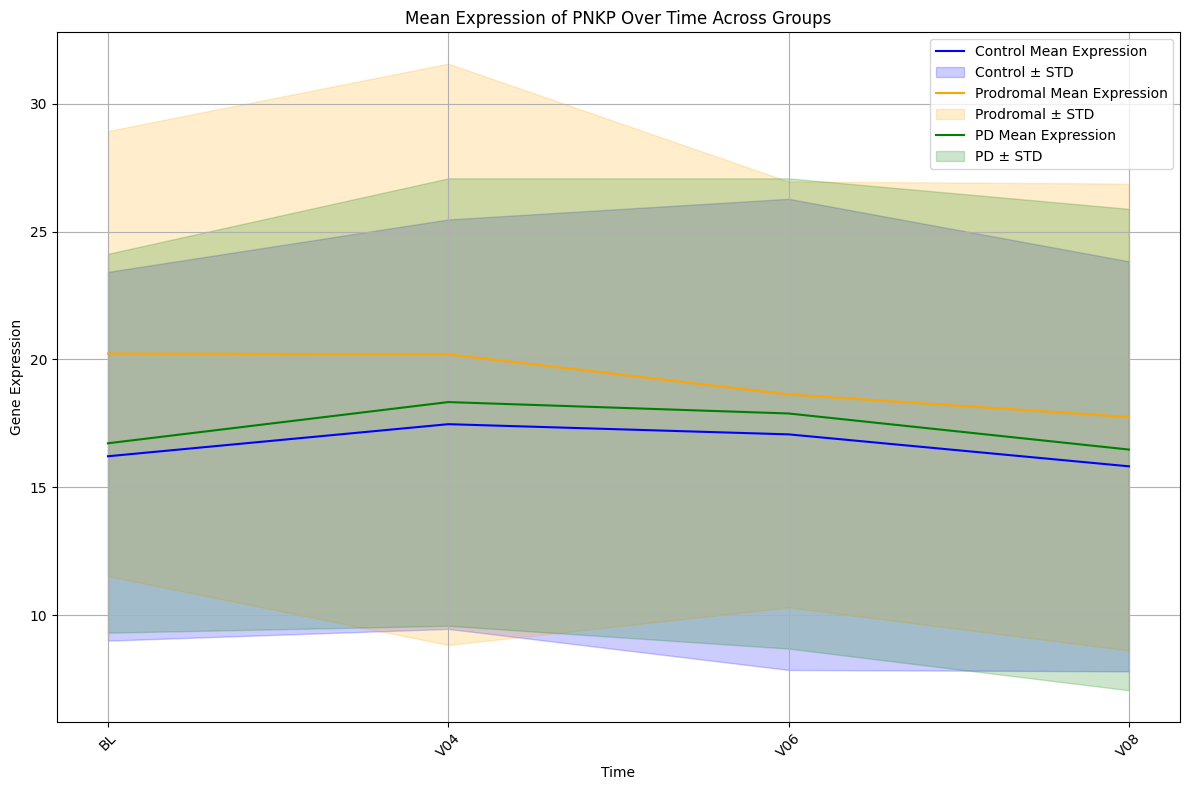

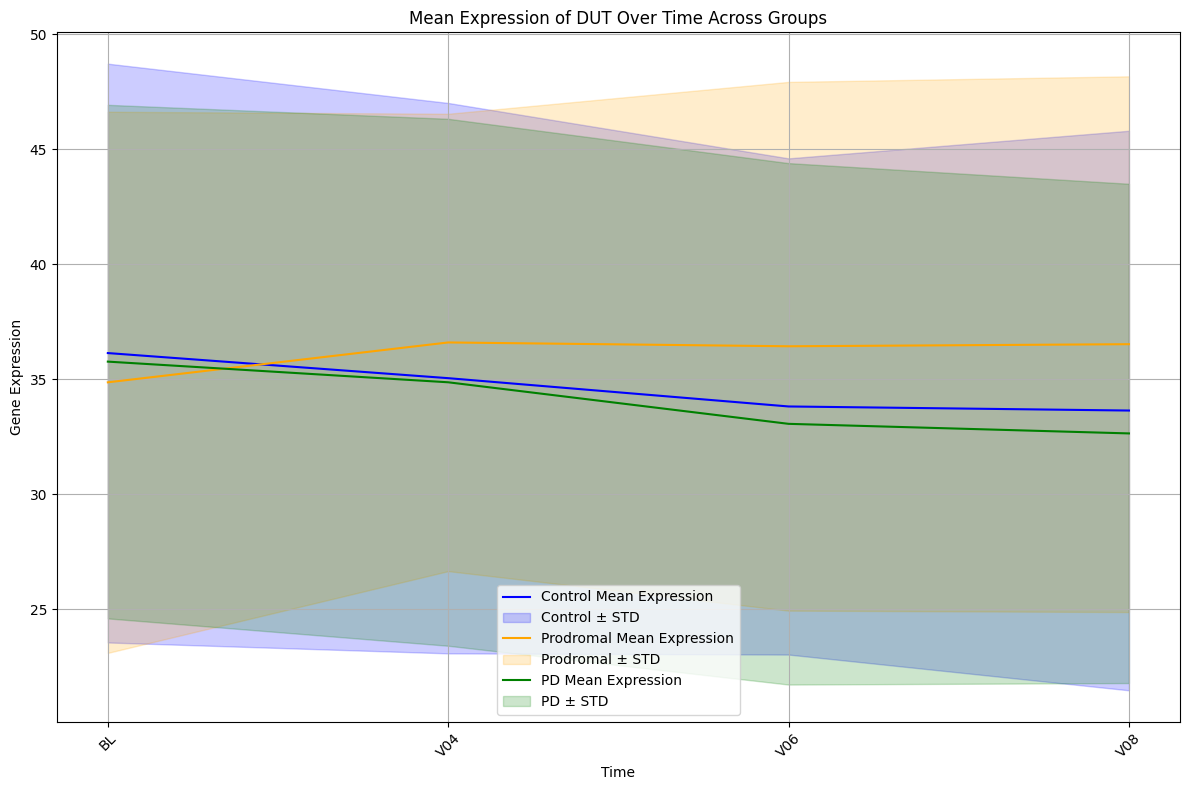

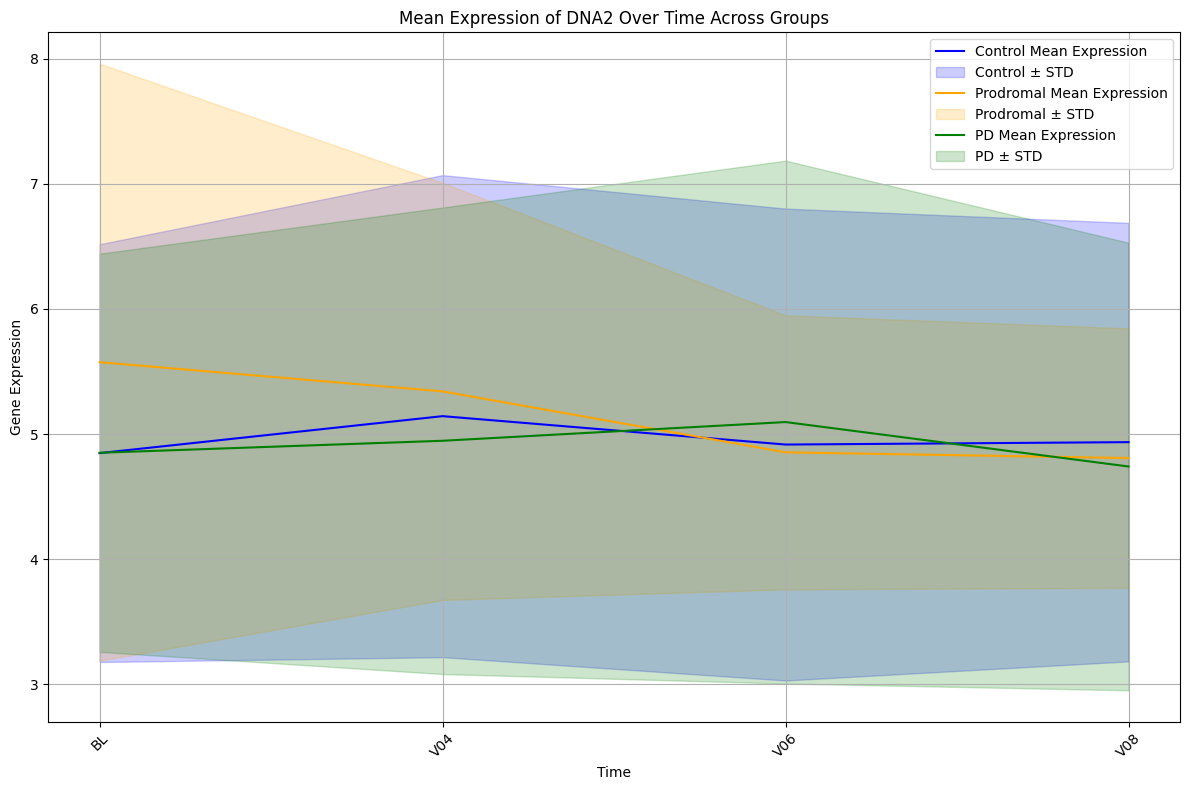

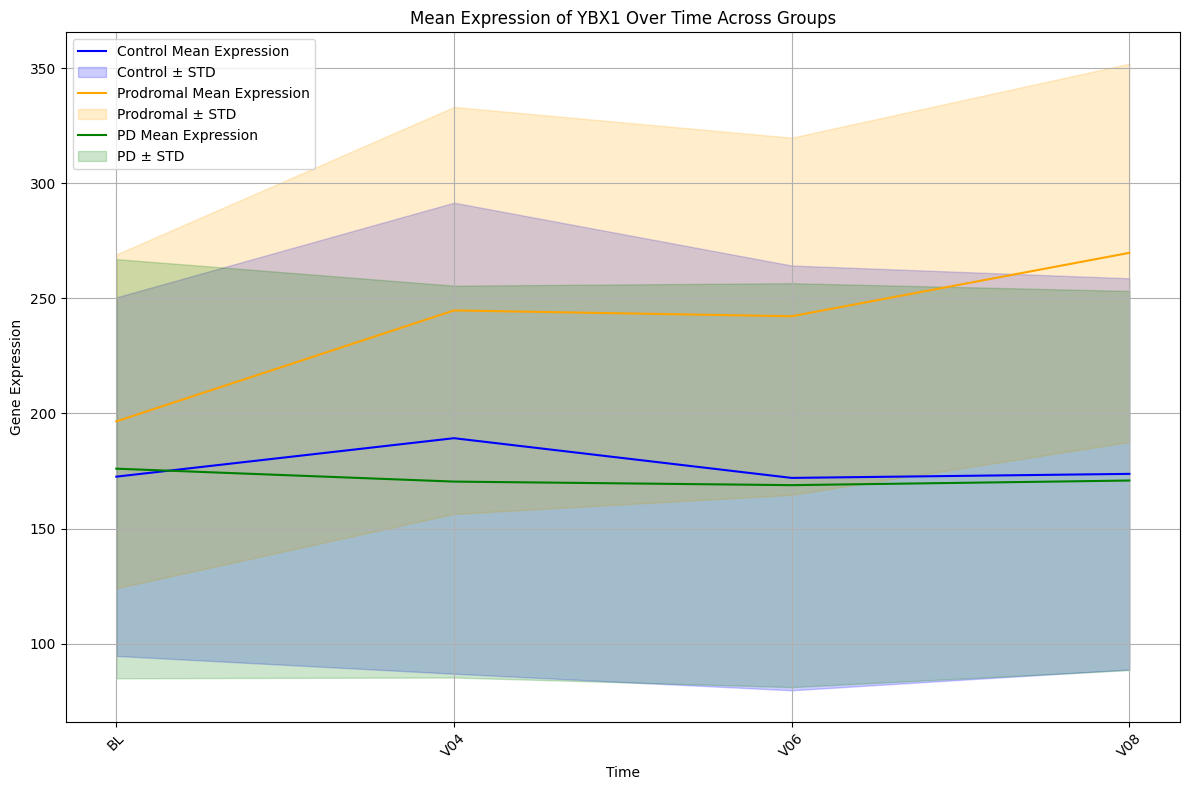

In [94]:
import matplotlib.pyplot as plt

# Loop through each gene
for gene in genes:
    # Create a new figure for each gene
    plt.figure(figsize=(12, 8))
    
    # Define a list to store the group data
    groups = ['Control', 'Prodromal', 'PD']
    colors = {'Control': 'blue', 'Prodromal': 'orange', 'PD': 'green'}
    
    for group in groups:
        # Filter and sort data by group
        group_tmp_data = tmp_data[tmp_data['New_Time_Point_2'].str.startswith(group)]
        group_tmp_data = group_tmp_data.sort_values(by='New_Time_Point')
        
        # Calculate mean and standard deviation
        mean_expression = group_tmp_data.groupby('New_Time_Point')[gene].mean()
        std_expression = group_tmp_data.groupby('New_Time_Point')[gene].std()
        
        # Extract clean time points
        index = [i.split('_')[1] for i in mean_expression.index]
        
        # Plot mean expression
        plt.plot(index, mean_expression, color=colors[group], label=f'{group} Mean Expression')
        
        # Fill the standard deviation area
        plt.fill_between(index,
                         mean_expression - std_expression,
                         mean_expression + std_expression,
                         color=colors[group], alpha=0.2, label=f'{group} ± STD')
    
    # Customize plot
    plt.xlabel('Time')
    plt.ylabel('Gene Expression')
    gene  = return_gene_name(gene)
    plt.title(f'Mean Expression of {gene} Over Time Across Groups')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # Show the plot
    plt.show()



In [96]:
compare_list = ['PD_BL_Control_BL',  'PD_V02_Control_V02' ,'PD_V04_Control_V04', 'PD_V06_Control_V06', 'PD_V08_Control_V08']

In [97]:
compare_list

['PD_BL_Control_BL',
 'PD_V02_Control_V02',
 'PD_V04_Control_V04',
 'PD_V06_Control_V06',
 'PD_V08_Control_V08']

In [98]:
FEATURE_IMPORTANCES_PD_BL_Control_BL = dict()
FEATURE_IMPORTANCES_PD_V02_Control_V02 = dict()
FEATURE_IMPORTANCES_PD_V04_Control_V04 = dict()
FEATURE_IMPORTANCES_PD_V06_Control_V06 = dict()
FEATURE_IMPORTANCES_PD_V08_Control_V08 = dict()

for i in FEATURE_IMPORTANCES.keys():
    if 'PD_BL_Control_BL' in i:
        FEATURE_IMPORTANCES_PD_BL_Control_BL[i] = FEATURE_IMPORTANCES[i]

    elif 'PD_V02_Control_V02' in i:
        FEATURE_IMPORTANCES_PD_V02_Control_V02[i] = FEATURE_IMPORTANCES[i]

    elif 'PD_V04_Control_V04' in i:
        FEATURE_IMPORTANCES_PD_V04_Control_V04[i] = FEATURE_IMPORTANCES[i]

    elif 'PD_V06_Control_V06' in i:
        FEATURE_IMPORTANCES_PD_V06_Control_V06[i] = FEATURE_IMPORTANCES[i]

    elif 'PD_V08_Control_V08' in i:
        FEATURE_IMPORTANCES_PD_V08_Control_V08[i] = FEATURE_IMPORTANCES[i]
        
        

In [99]:
list(FEATURE_IMPORTANCES_PD_BL_Control_BL.keys())[:10]

['PD_BL_Control_BL_0',
 'PD_BL_Control_BL_1',
 'PD_BL_Control_BL_2',
 'PD_BL_Control_BL_3',
 'PD_BL_Control_BL_4',
 'PD_BL_Control_BL_5',
 'PD_BL_Control_BL_6',
 'PD_BL_Control_BL_7',
 'PD_BL_Control_BL_8',
 'PD_BL_Control_BL_9']

In [100]:
genes_list = list(FEATURE_IMPORTANCES_PD_BL_Control_BL['PD_BL_Control_BL_0'].keys())
genes_list[0:10]

['ENSG00000103152',
 'ENSG00000164306',
 'ENSG00000100601',
 'ENSG00000005156',
 'ENSG00000104884',
 'ENSG00000070501',
 'ENSG00000114026',
 'ENSG00000154328',
 'ENSG00000008405',
 'ENSG00000160957']

In [101]:
AVG_FEATURE_IMPORTANCES_PD_BL_Control_BL = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_PD_BL_Control_BL.keys():
        s += FEATURE_IMPORTANCES_PD_BL_Control_BL[k][i]
    s = s/len(FEATURE_IMPORTANCES_PD_BL_Control_BL.keys())
    AVG_FEATURE_IMPORTANCES_PD_BL_Control_BL[i] = s


AVG_FEATURE_IMPORTANCES_PD_V02_Control_V02 = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_PD_V02_Control_V02.keys():
        s += FEATURE_IMPORTANCES_PD_V02_Control_V02[k][i]
    s = s/len(FEATURE_IMPORTANCES_PD_V02_Control_V02.keys())
    AVG_FEATURE_IMPORTANCES_PD_V02_Control_V02[i] = s


AVG_FEATURE_IMPORTANCES_PD_V04_Control_V04 = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_PD_V04_Control_V04.keys():
        s += FEATURE_IMPORTANCES_PD_V04_Control_V04[k][i]
    s = s/len(FEATURE_IMPORTANCES_PD_V04_Control_V04.keys())
    AVG_FEATURE_IMPORTANCES_PD_V04_Control_V04[i] = s


AVG_FEATURE_IMPORTANCES_PD_V06_Control_V06 = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_PD_V06_Control_V06.keys():
        s += FEATURE_IMPORTANCES_PD_V06_Control_V06[k][i]
    s = s/len(FEATURE_IMPORTANCES_PD_V06_Control_V06.keys())
    AVG_FEATURE_IMPORTANCES_PD_V06_Control_V06[i] = s


AVG_FEATURE_IMPORTANCES_PD_V08_Control_V08 = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_PD_V08_Control_V08.keys():
        s += FEATURE_IMPORTANCES_PD_V08_Control_V08[k][i]
    s = s/len(FEATURE_IMPORTANCES_PD_V08_Control_V08.keys())
    AVG_FEATURE_IMPORTANCES_PD_V08_Control_V08[i] = s
      

In [102]:
FEATURE_IMPORTANCES_MERGE = dict()
FEATURE_IMPORTANCES_MERGE['PD_BL_Control_BL'] = AVG_FEATURE_IMPORTANCES_PD_BL_Control_BL
FEATURE_IMPORTANCES_MERGE['PD_V02_Control_V02'] = AVG_FEATURE_IMPORTANCES_PD_V02_Control_V02
FEATURE_IMPORTANCES_MERGE['PD_V04_Control_V04'] = AVG_FEATURE_IMPORTANCES_PD_V04_Control_V04
FEATURE_IMPORTANCES_MERGE['PD_V06_Control_V06'] = AVG_FEATURE_IMPORTANCES_PD_V06_Control_V06
FEATURE_IMPORTANCES_MERGE['PD_V08_Control_V08'] = AVG_FEATURE_IMPORTANCES_PD_V08_Control_V08


In [103]:
ranking_of_features = []
for i in compare_list:


    df = pd.DataFrame(FEATURE_IMPORTANCES_MERGE[i].items())
    df[2] = np.abs(df[1])
    df = df.sort_values(by = 2, ascending=False)
    print(df)
    ranking_of_features.append(df[0].tolist())


                  0         1         2
9   ENSG00000160957  0.414408  0.414408
8   ENSG00000008405 -0.366164  0.366164
6   ENSG00000114026 -0.364659  0.364659
3   ENSG00000005156  0.361941  0.361941
11  ENSG00000067369 -0.333385  0.333385
26  ENSG00000065057 -0.259708  0.259708
15  ENSG00000179262  0.179125  0.179125
19  ENSG00000076248  0.169355  0.169355
7   ENSG00000154328  0.148305  0.148305
18  ENSG00000138346  0.106690  0.106690
24  ENSG00000225830  0.097206  0.097206
0   ENSG00000103152  0.084911  0.084911
13  ENSG00000051341 -0.082125  0.082125
22  ENSG00000170430 -0.070096  0.070096
12  ENSG00000132781  0.069082  0.069082
1   ENSG00000164306  0.061733  0.061733
25  ENSG00000100823  0.060241  0.060241
23  ENSG00000140398 -0.055529  0.055529
2   ENSG00000100601 -0.053201  0.053201
21  ENSG00000039650 -0.043365  0.043365
4   ENSG00000104884  0.042779  0.042779
5   ENSG00000070501 -0.028841  0.028841
20  ENSG00000012048  0.023610  0.023610
10  ENSG00000140521  0.011760  0.011760


In [104]:
ranking_of_features[4][0:10]

['ENSG00000160957',
 'ENSG00000051341',
 'ENSG00000114026',
 'ENSG00000154328',
 'ENSG00000065057',
 'ENSG00000104884',
 'ENSG00000140398',
 'ENSG00000164306',
 'ENSG00000012048',
 'ENSG00000067369']

In [105]:
gene_lists = ranking_of_features

In [106]:
ranking_of_features[4][0:10]

['ENSG00000160957',
 'ENSG00000051341',
 'ENSG00000114026',
 'ENSG00000154328',
 'ENSG00000065057',
 'ENSG00000104884',
 'ENSG00000140398',
 'ENSG00000164306',
 'ENSG00000012048',
 'ENSG00000067369']

In [107]:
gene_lists = ranking_of_features

In [108]:
gene_indices = {}

# Loop through each list and index each gene
for list_idx, gene_list in enumerate(gene_lists):
    for gene_idx, gene in enumerate(gene_list):
        # Initialize the gene's entry if not present
        if gene not in gene_indices:
            gene_indices[gene] = [-1] * len(gene_lists)  # Default -1 for lists where gene is absent
        # Update the index of the gene in the current list
        gene_indices[gene][list_idx] = gene_idx

# Display results
for gene, indices in gene_indices.items():
    print(f"{gene}: {indices}")

ENSG00000160957: [0, 0, 3, 22, 0]
ENSG00000008405: [1, 6, 0, 10, 10]
ENSG00000114026: [2, 3, 7, 6, 2]
ENSG00000005156: [3, 13, 19, 12, 19]
ENSG00000067369: [4, 20, 13, 24, 9]
ENSG00000065057: [5, 23, 1, 2, 4]
ENSG00000179262: [6, 14, 6, 11, 16]
ENSG00000076248: [7, 2, 11, 7, 21]
ENSG00000154328: [8, 7, 12, 0, 3]
ENSG00000138346: [9, 4, 4, 8, 18]
ENSG00000225830: [10, 19, 16, 18, 14]
ENSG00000103152: [11, 9, 8, 14, 11]
ENSG00000051341: [12, 16, 10, 3, 1]
ENSG00000170430: [13, 17, 17, 15, 15]
ENSG00000132781: [14, 8, 9, 9, 24]
ENSG00000164306: [15, 12, 20, 5, 7]
ENSG00000100823: [16, 15, 14, 13, 13]
ENSG00000140398: [17, 10, 15, 4, 6]
ENSG00000100601: [18, 11, 5, 23, 12]
ENSG00000039650: [19, 26, 23, 19, 26]
ENSG00000104884: [20, 1, 2, 20, 5]
ENSG00000070501: [21, 18, 21, 17, 20]
ENSG00000012048: [22, 5, 22, 1, 8]
ENSG00000140521: [23, 22, 25, 25, 22]
ENSG00000116288: [24, 24, 18, 16, 17]
ENSG00000128951: [25, 21, 24, 21, 23]
ENSG00000065978: [26, 25, 26, 26, 25]


In [109]:
ranking_df = pd.DataFrame(gene_indices).T
ranking_df.columns = ['BL','V02','V04','V06','V08']


In [110]:
def return_gene_name(ensembleid):

    try:
        return results[results['Gene stable ID'] == ensembleid]['Gene name'].values[0]
    except:
        return ensembleid

In [111]:
tmp_df = ranking_df.reset_index()
ranking_df['Gene_Name'] =tmp_df['index'].apply(return_gene_name).tolist()

In [112]:
ranking_df[ranking_df.Gene_Name.isna()]

Empty DataFrame
Columns: [BL, V02, V04, V06, V08, Gene_Name]
Index: []

In [113]:
ranking_df.set_index('Gene_Name',inplace=True)
ranking_df

BL  V02  V04  V06  V08
Gene_Name                        
RECQL4      0    0    3   22    0
CRY1        1    6    0   10   10
OGG1        2    3    7    6    2
LIG3        3   13   19   12   19
TP53BP1     4   20   13   24    9
NTHL1       5   23    1    2    4
RAD23A      6   14    6   11   16
UNG         7    2   11    7   21
NEIL2       8    7   12    0    3
DNA2        9    4    4    8   18
ERCC6      10   19   16   18   14
MPG        11    9    8   14   11
POLQ       12   16   10    3    1
MGMT       13   17   17   15   15
MUTYH      14    8    9    9   24
PRIMPOL    15   12   20    5    7
APEX1      16   15   14   13   13
NEIL1      17   10   15    4    6
ALKBH1     18   11    5   23   12
PNKP       19   26   23   19   26
ERCC2      20    1    2   20    5
POLB       21   18   21   17   20
BRCA1      22    5   22    1    8
POLG       23   22   25   25   22
PARK7      24   24   18   16   17
DUT        25   21   24   21   23
YBX1       26   25   26   26   25

In [115]:
ranking_df.to_csv('ranking_df/Mitochondria_Genes_control_to_pd_ranking_df.csv', index=True)
ranking_df.head()

BL  V02  V04  V06  V08
Gene_Name                        
RECQL4      0    0    3   22    0
CRY1        1    6    0   10   10
OGG1        2    3    7    6    2
LIG3        3   13   19   12   19
TP53BP1     4   20   13   24    9

In [116]:
subset_dict = {key: gene_indices[key] for key in ranking_of_features[4] if key in gene_indices}

print(subset_dict)

{'ENSG00000160957': [0, 0, 3, 22, 0], 'ENSG00000051341': [12, 16, 10, 3, 1], 'ENSG00000114026': [2, 3, 7, 6, 2], 'ENSG00000154328': [8, 7, 12, 0, 3], 'ENSG00000065057': [5, 23, 1, 2, 4], 'ENSG00000104884': [20, 1, 2, 20, 5], 'ENSG00000140398': [17, 10, 15, 4, 6], 'ENSG00000164306': [15, 12, 20, 5, 7], 'ENSG00000012048': [22, 5, 22, 1, 8], 'ENSG00000067369': [4, 20, 13, 24, 9], 'ENSG00000008405': [1, 6, 0, 10, 10], 'ENSG00000103152': [11, 9, 8, 14, 11], 'ENSG00000100601': [18, 11, 5, 23, 12], 'ENSG00000100823': [16, 15, 14, 13, 13], 'ENSG00000225830': [10, 19, 16, 18, 14], 'ENSG00000170430': [13, 17, 17, 15, 15], 'ENSG00000179262': [6, 14, 6, 11, 16], 'ENSG00000116288': [24, 24, 18, 16, 17], 'ENSG00000138346': [9, 4, 4, 8, 18], 'ENSG00000005156': [3, 13, 19, 12, 19], 'ENSG00000070501': [21, 18, 21, 17, 20], 'ENSG00000076248': [7, 2, 11, 7, 21], 'ENSG00000140521': [23, 22, 25, 25, 22], 'ENSG00000128951': [25, 21, 24, 21, 23], 'ENSG00000132781': [14, 8, 9, 9, 24], 'ENSG00000065978': [26, 

In [117]:
gene_ranks = subset_dict

In [118]:
# Original dictionary with gene rankings
'''gene_ranks = subset_dict


# Flatten the list to find the min and max values across all rankings
all_ranks = [rank for ranks in gene_ranks.values() for rank in ranks]
min_rank, max_rank = min(all_ranks), max(all_ranks)

# Normalize each ranking
normalized_gene_ranks = {
    gene: [(rank - min_rank) / (max_rank - min_rank) * 10 for rank in ranks]
    for gene, ranks in gene_ranks.items()
}

# Display the normalized rankings
for gene, normalized_ranks in normalized_gene_ranks.items():
    print(f"{gene}: {normalized_ranks}")
'''

'gene_ranks = subset_dict\n\n\n# Flatten the list to find the min and max values across all rankings\nall_ranks = [rank for ranks in gene_ranks.values() for rank in ranks]\nmin_rank, max_rank = min(all_ranks), max(all_ranks)\n\n# Normalize each ranking\nnormalized_gene_ranks = {\n    gene: [(rank - min_rank) / (max_rank - min_rank) * 10 for rank in ranks]\n    for gene, ranks in gene_ranks.items()\n}\n\n# Display the normalized rankings\nfor gene, normalized_ranks in normalized_gene_ranks.items():\n    print(f"{gene}: {normalized_ranks}")\n'

In [119]:
df = pd.DataFrame(gene_ranks).T
df

0   1   2   3   4
ENSG00000160957   0   0   3  22   0
ENSG00000051341  12  16  10   3   1
ENSG00000114026   2   3   7   6   2
ENSG00000154328   8   7  12   0   3
ENSG00000065057   5  23   1   2   4
ENSG00000104884  20   1   2  20   5
ENSG00000140398  17  10  15   4   6
ENSG00000164306  15  12  20   5   7
ENSG00000012048  22   5  22   1   8
ENSG00000067369   4  20  13  24   9
ENSG00000008405   1   6   0  10  10
ENSG00000103152  11   9   8  14  11
ENSG00000100601  18  11   5  23  12
ENSG00000100823  16  15  14  13  13
ENSG00000225830  10  19  16  18  14
ENSG00000170430  13  17  17  15  15
ENSG00000179262   6  14   6  11  16
ENSG00000116288  24  24  18  16  17
ENSG00000138346   9   4   4   8  18
ENSG00000005156   3  13  19  12  19
ENSG00000070501  21  18  21  17  20
ENSG00000076248   7   2  11   7  21
ENSG00000140521  23  22  25  25  22
ENSG00000128951  25  21  24  21  23
ENSG00000132781  14   8   9   9  24
ENSG00000065978  26  25  26  26  25
ENSG00000039650  19  26  23  19  26

In [120]:
df

0   1   2   3   4
ENSG00000160957   0   0   3  22   0
ENSG00000051341  12  16  10   3   1
ENSG00000114026   2   3   7   6   2
ENSG00000154328   8   7  12   0   3
ENSG00000065057   5  23   1   2   4
ENSG00000104884  20   1   2  20   5
ENSG00000140398  17  10  15   4   6
ENSG00000164306  15  12  20   5   7
ENSG00000012048  22   5  22   1   8
ENSG00000067369   4  20  13  24   9
ENSG00000008405   1   6   0  10  10
ENSG00000103152  11   9   8  14  11
ENSG00000100601  18  11   5  23  12
ENSG00000100823  16  15  14  13  13
ENSG00000225830  10  19  16  18  14
ENSG00000170430  13  17  17  15  15
ENSG00000179262   6  14   6  11  16
ENSG00000116288  24  24  18  16  17
ENSG00000138346   9   4   4   8  18
ENSG00000005156   3  13  19  12  19
ENSG00000070501  21  18  21  17  20
ENSG00000076248   7   2  11   7  21
ENSG00000140521  23  22  25  25  22
ENSG00000128951  25  21  24  21  23
ENSG00000132781  14   8   9   9  24
ENSG00000065978  26  25  26  26  25
ENSG00000039650  19  26  23  19  26

In [121]:
def return_gene_name(ensembleid):

    try:
        return results[results['Gene stable ID'] == ensembleid]['Gene name'].values[0]
    except:
        return ensembleid

tmp_df = df.reset_index()
df['Gene_Name'] =tmp_df['index'].apply(return_gene_name).tolist()
df.set_index('Gene_Name',inplace=True)

In [122]:
ranked_df = df.rank(axis=0, method='min').astype(int)

print(ranked_df)

            0   1   2   3   4
Gene_Name                    
RECQL4      1   1   4  23   1
POLQ       13  17  11   4   2
OGG1        3   4   8   7   3
NEIL2       9   8  13   1   4
NTHL1       6  24   2   3   5
ERCC2      21   2   3  21   6
NEIL1      18  11  16   5   7
PRIMPOL    16  13  21   6   8
BRCA1      23   6  23   2   9
TP53BP1     5  21  14  25  10
CRY1        2   7   1  11  11
MPG        12  10   9  15  12
ALKBH1     19  12   6  24  13
APEX1      17  16  15  14  14
ERCC6      11  20  17  19  15
MGMT       14  18  18  16  16
RAD23A      7  15   7  12  17
PARK7      25  25  19  17  18
DNA2       10   5   5   9  19
LIG3        4  14  20  13  20
POLB       22  19  22  18  21
UNG         8   3  12   8  22
POLG       24  23  26  26  23
DUT        26  22  25  22  24
MUTYH      15   9  10  10  25
YBX1       27  26  27  27  26
PNKP       20  27  24  20  27


In [123]:
reversed_ranks = ranked_df .max() - ranked_df  + 1

print(reversed_ranks)

            0   1   2   3   4
Gene_Name                    
RECQL4     27  27  24   5  27
POLQ       15  11  17  24  26
OGG1       25  24  20  21  25
NEIL2      19  20  15  27  24
NTHL1      22   4  26  25  23
ERCC2       7  26  25   7  22
NEIL1      10  17  12  23  21
PRIMPOL    12  15   7  22  20
BRCA1       5  22   5  26  19
TP53BP1    23   7  14   3  18
CRY1       26  21  27  17  17
MPG        16  18  19  13  16
ALKBH1      9  16  22   4  15
APEX1      11  12  13  14  14
ERCC6      17   8  11   9  13
MGMT       14  10  10  12  12
RAD23A     21  13  21  16  11
PARK7       3   3   9  11  10
DNA2       18  23  23  19   9
LIG3       24  14   8  15   8
POLB        6   9   6  10   7
UNG        20  25  16  20   6
POLG        4   5   2   2   5
DUT         2   6   3   6   4
MUTYH      13  19  18  18   3
YBX1        1   2   1   1   2
PNKP        8   1   4   8   1


In [124]:
rank_dict = reversed_ranks.T.to_dict(orient='list')
rank_dict

{'RECQL4': [27, 27, 24, 5, 27],
 'POLQ': [15, 11, 17, 24, 26],
 'OGG1': [25, 24, 20, 21, 25],
 'NEIL2': [19, 20, 15, 27, 24],
 'NTHL1': [22, 4, 26, 25, 23],
 'ERCC2': [7, 26, 25, 7, 22],
 'NEIL1': [10, 17, 12, 23, 21],
 'PRIMPOL': [12, 15, 7, 22, 20],
 'BRCA1': [5, 22, 5, 26, 19],
 'TP53BP1': [23, 7, 14, 3, 18],
 'CRY1': [26, 21, 27, 17, 17],
 'MPG': [16, 18, 19, 13, 16],
 'ALKBH1': [9, 16, 22, 4, 15],
 'APEX1': [11, 12, 13, 14, 14],
 'ERCC6': [17, 8, 11, 9, 13],
 'MGMT': [14, 10, 10, 12, 12],
 'RAD23A': [21, 13, 21, 16, 11],
 'PARK7': [3, 3, 9, 11, 10],
 'DNA2': [18, 23, 23, 19, 9],
 'LIG3': [24, 14, 8, 15, 8],
 'POLB': [6, 9, 6, 10, 7],
 'UNG': [20, 25, 16, 20, 6],
 'POLG': [4, 5, 2, 2, 5],
 'DUT': [2, 6, 3, 6, 4],
 'MUTYH': [13, 19, 18, 18, 3],
 'YBX1': [1, 2, 1, 1, 2],
 'PNKP': [8, 1, 4, 8, 1]}

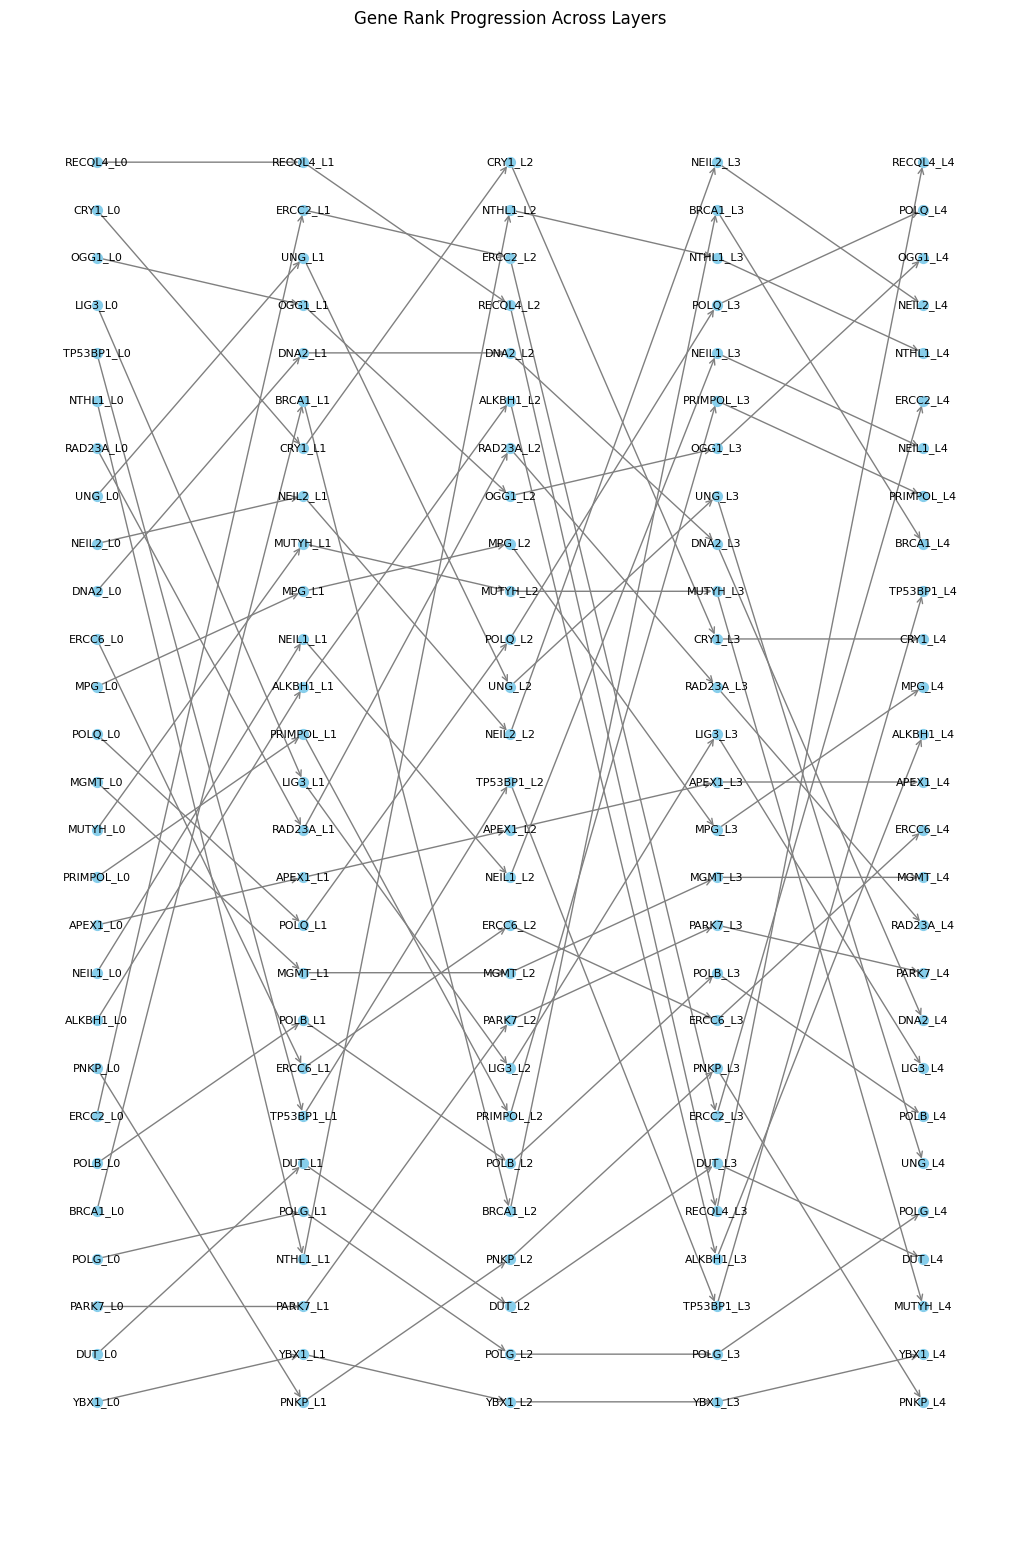

In [125]:
import matplotlib.pyplot as plt
import networkx as nx

# The rank positions for each gene across four layers
gene_ranks = rank_dict

G = nx.DiGraph()

# Number of layers
num_layers = len(next(iter(gene_ranks.values())))

# Add nodes and edges for each gene across the layers
for gene, ranks in gene_ranks.items():
    for layer in range(num_layers - 1):
        # Add nodes for the gene at each layer with unique identifiers
        current_node = f"{gene}_L{layer}"
        next_node = f"{gene}_L{layer + 1}"
        G.add_node(current_node, layer=layer, rank=ranks[layer])
        G.add_node(next_node, layer=layer + 1, rank=ranks[layer + 1])
        
        # Add a directed edge to show rank progression between layers
        G.add_edge(current_node, next_node)

# Position nodes to show each layer vertically
pos = {}
layer_spacing = 1.5  # Space between layers
rank_spacing = 0.3   # Space between ranks in a layer

for node, data in G.nodes(data=True):
    layer = data['layer']
    rank = data['rank']
    pos[node] = (layer * layer_spacing, -rank * rank_spacing)

# Draw the graph
plt.figure(figsize=(10, 15))
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, arrowstyle='->', arrowsize=10, node_color="skyblue", edge_color="gray")

plt.title("Gene Rank Progression Across Layers")
plt.xlabel("Layers")
plt.ylabel("Rank (Higher is lower on graph)")
plt.gca().invert_yaxis()  # To have higher ranks visually lower
plt.show()

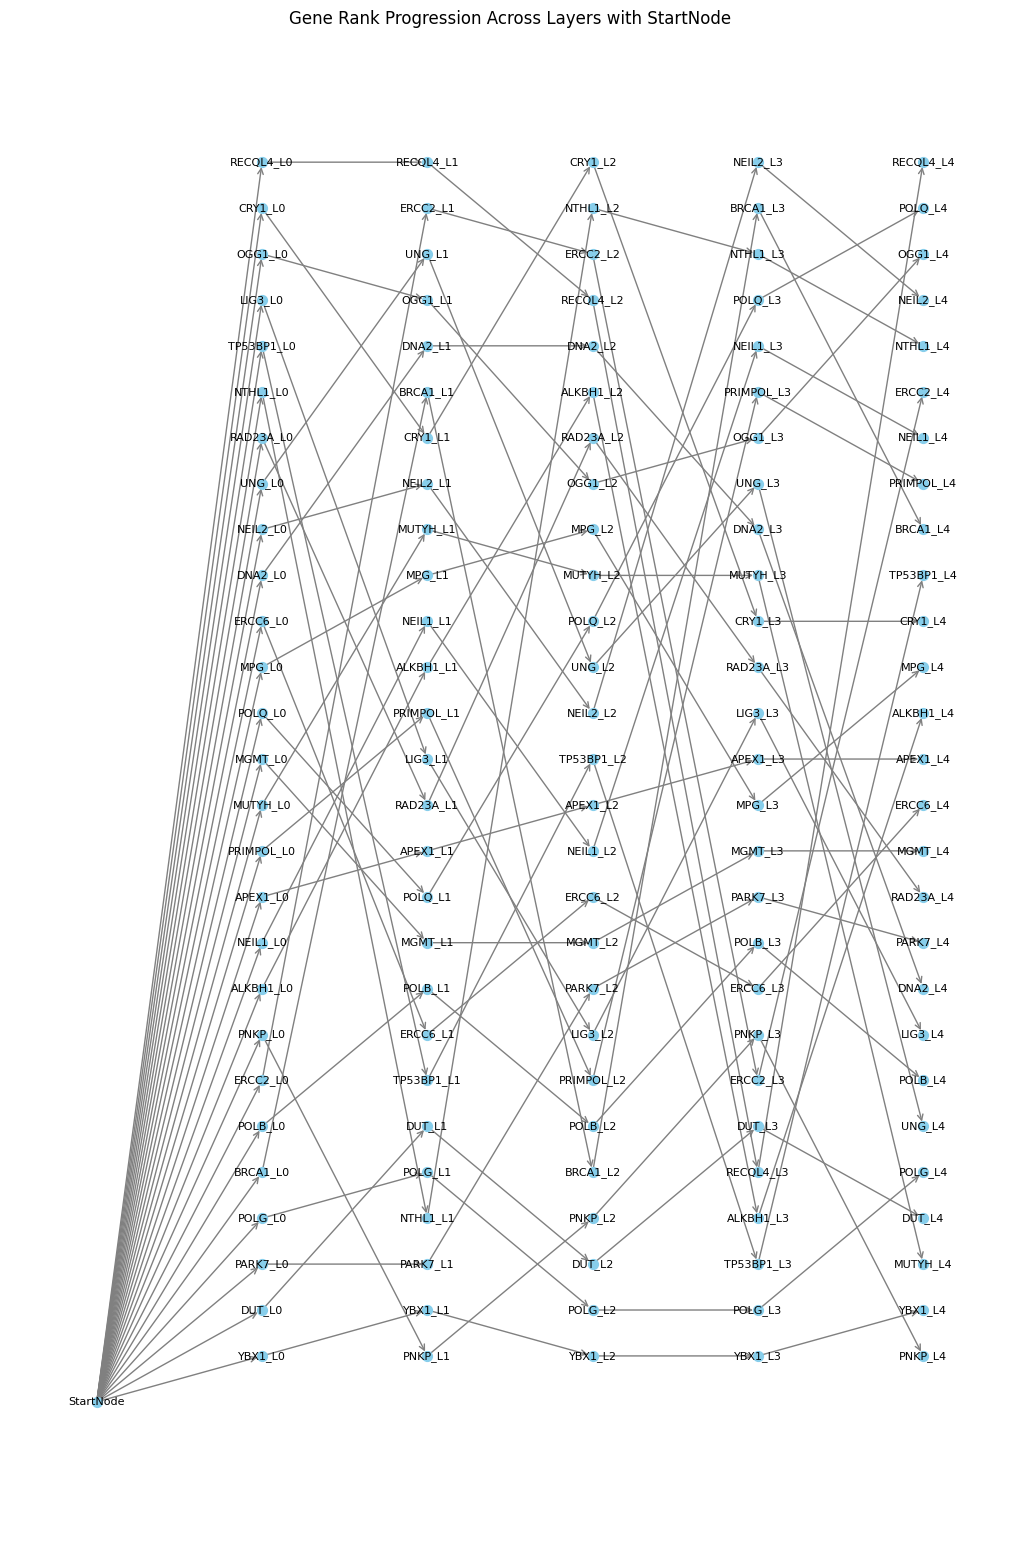

In [126]:
import matplotlib.pyplot as plt
import networkx as nx

# Example rank dictionary (you should replace this with your actual rank_dict)

# Create the directed graph
G = nx.DiGraph()

# Number of layers (based on the length of the rank list)
num_layers = len(next(iter(rank_dict.values())))

# Add the start node before the first layer
start_node = "StartNode"
G.add_node(start_node, layer=-1, rank=0)  # Layer -1 to indicate it's before the first layer

# Add nodes and edges for each gene across the layers
for gene, ranks in rank_dict.items():
    for layer in range(num_layers - 1):
        # Add nodes for the gene at each layer with unique identifiers
        current_node = f"{gene}_L{layer}"
        next_node = f"{gene}_L{layer + 1}"
        G.add_node(current_node, layer=layer, rank=ranks[layer])
        G.add_node(next_node, layer=layer + 1, rank=ranks[layer + 1])
        
        # Add a directed edge to show rank progression between layers
        G.add_edge(current_node, next_node)
    
    # Add edges from the start node to the first layer nodes
    first_layer_node = f"{gene}_L0"
    G.add_edge(start_node, first_layer_node)

# Position nodes to show each layer vertically
pos = {}
layer_spacing = 1.5  # Space between layers
rank_spacing = 0.3   # Space between ranks in a layer

for node, data in G.nodes(data=True):
    layer = data['layer']
    rank = data['rank']
    pos[node] = (layer * layer_spacing, -rank * rank_spacing)

# Draw the graph
plt.figure(figsize=(10, 15))
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, arrowstyle='->', arrowsize=10, node_color="skyblue", edge_color="gray")

# Title and labels
plt.title("Gene Rank Progression Across Layers with StartNode")
plt.xlabel("Layers")
plt.ylabel("Rank (Higher is lower on graph)")
plt.gca().invert_yaxis()  # To have higher ranks visually lower
plt.savefig("gene_rank_progression.svg", format="svg")
plt.show()


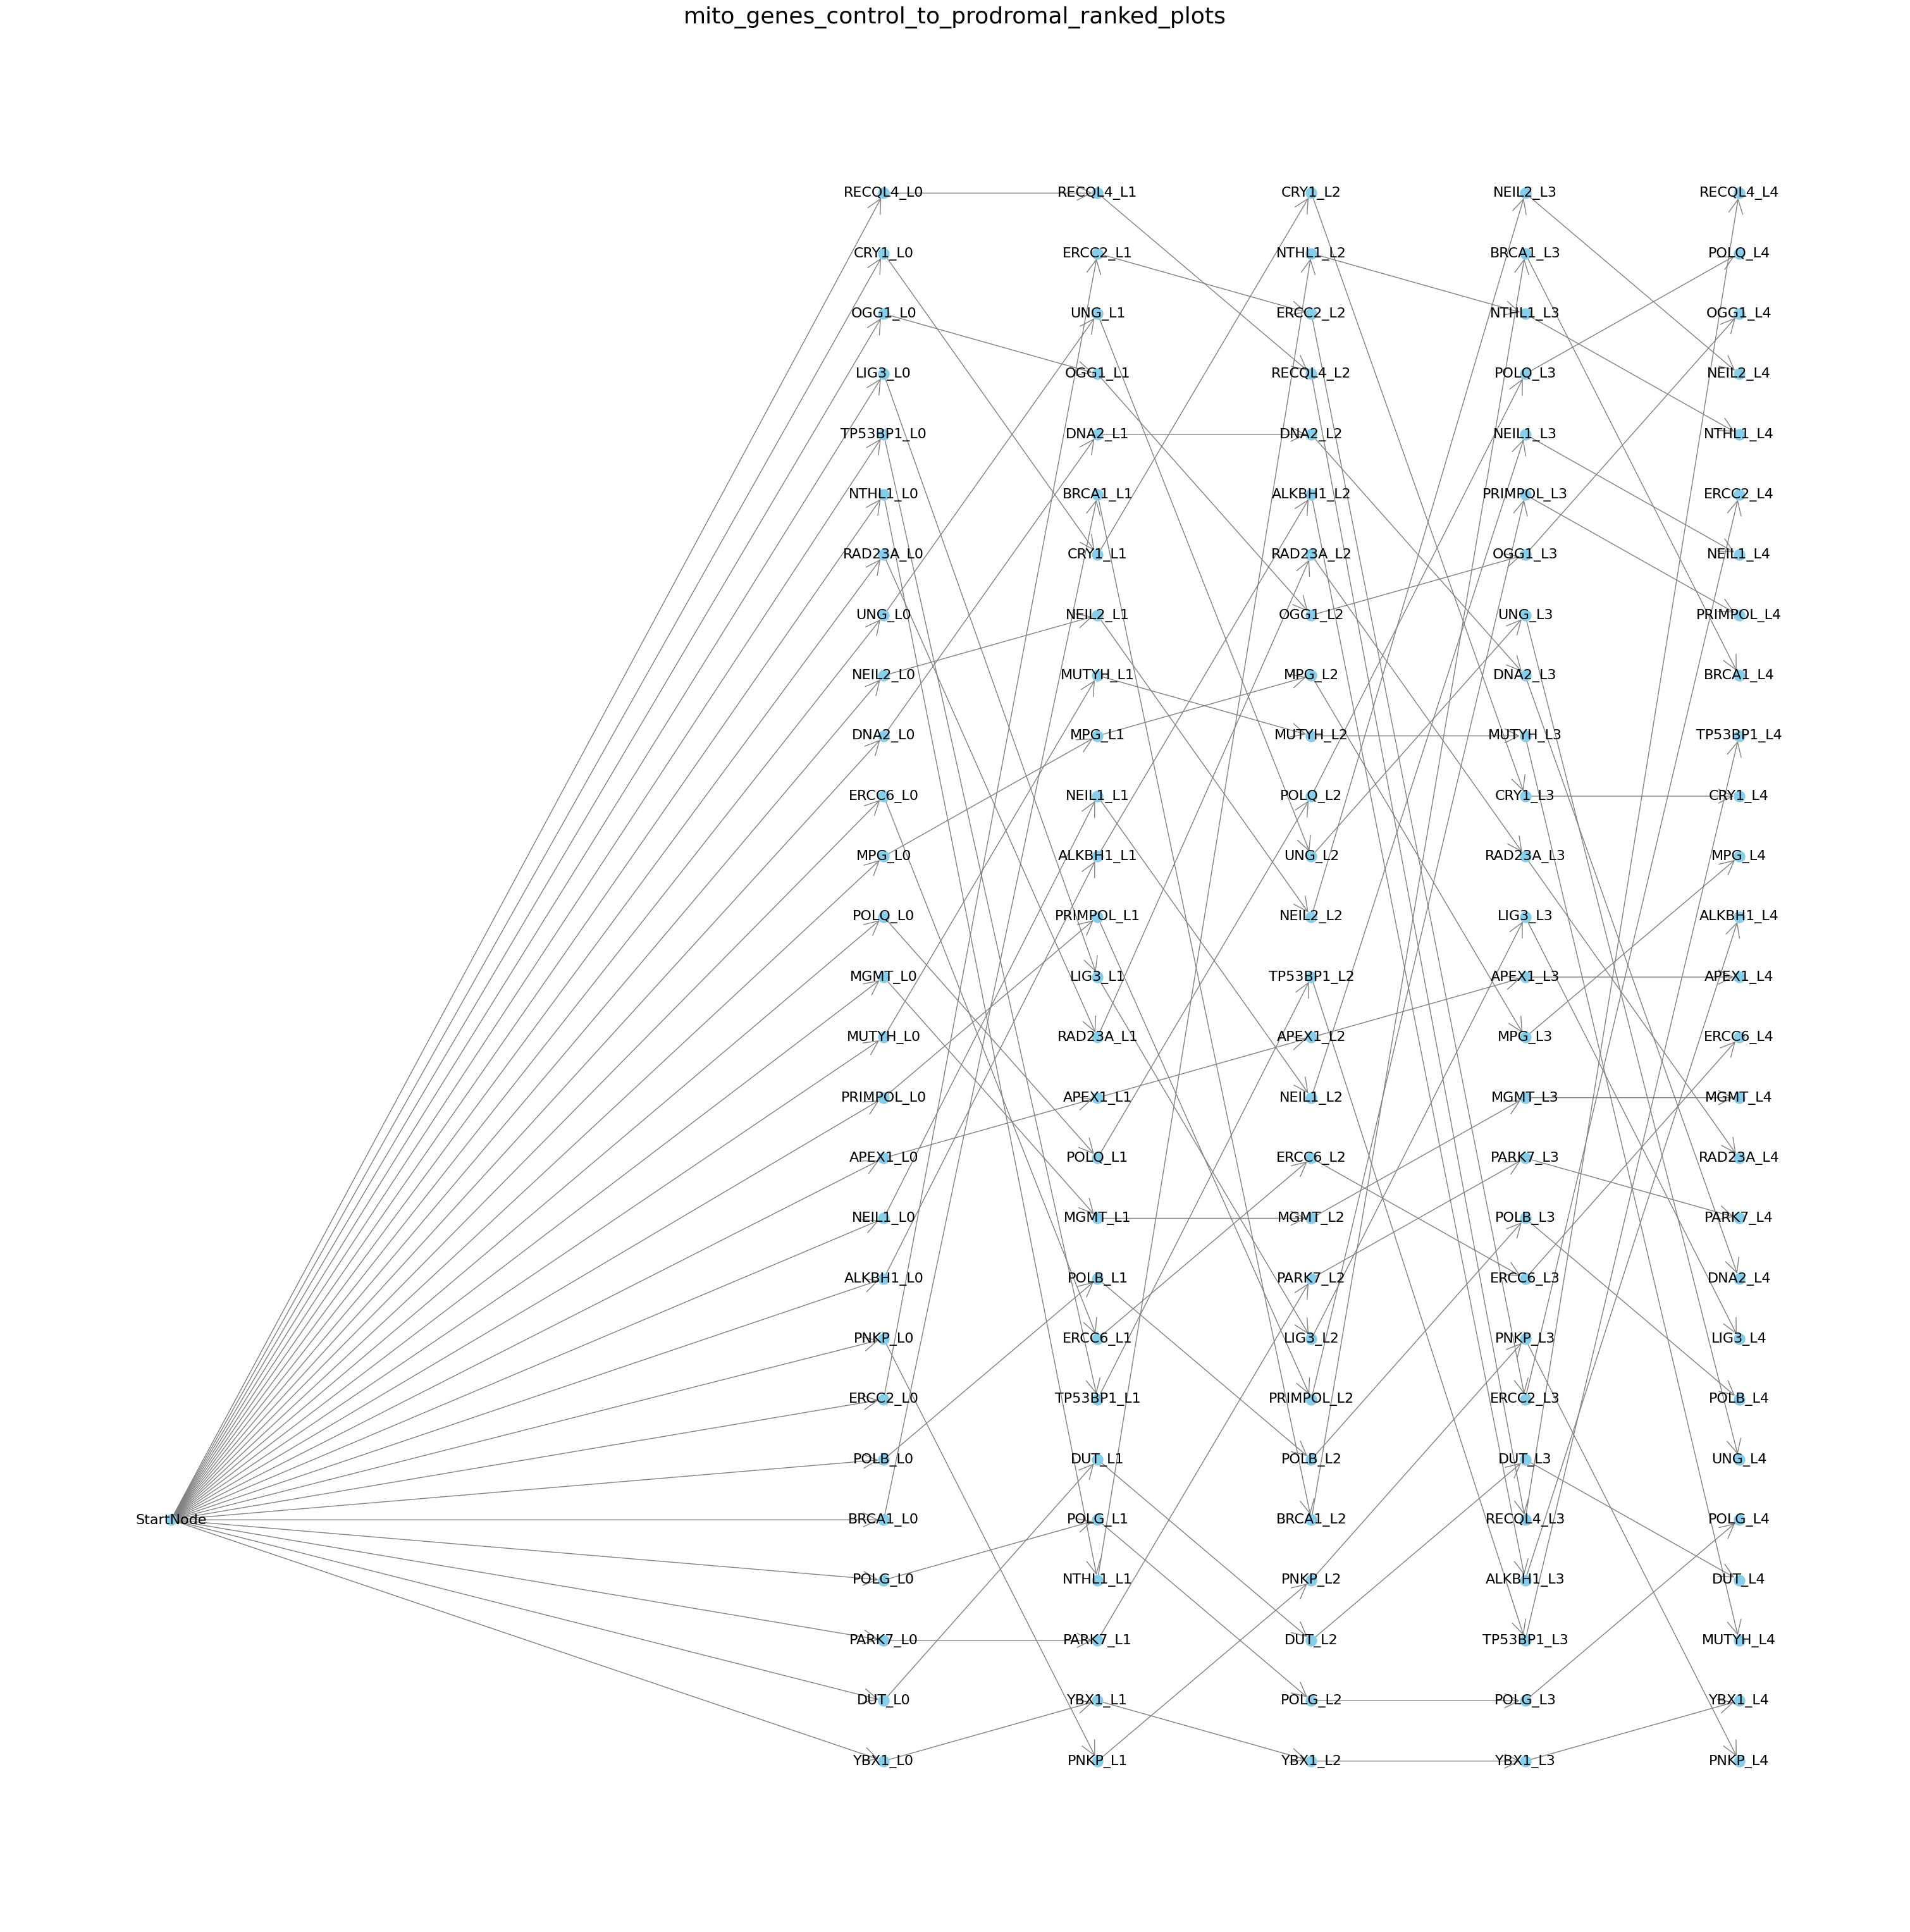

In [130]:
import matplotlib.pyplot as plt
import networkx as nx

# Example rank dictionary (you should replace this with your actual rank_dict)



# Create the directed graph
G = nx.DiGraph()

# Number of layers (based on the length of the rank list)
num_layers = len(next(iter(rank_dict.values())))

# Add the start node before the first layer
start_node = "StartNode"
G.add_node(start_node, layer=-1, rank=0)  # Layer -1 to indicate it's before the first layer

# Add nodes and edges for each gene across the layers
for gene, ranks in rank_dict.items():
    for layer in range(num_layers - 1):
        # Add nodes for the gene at each layer with unique identifiers
        current_node = f"{gene}_L{layer}"
        next_node = f"{gene}_L{layer + 1}"
        G.add_node(current_node, layer=layer, rank=ranks[layer])
        G.add_node(next_node, layer=layer + 1, rank=ranks[layer + 1])
        
        # Add a directed edge to show rank progression between layers
        G.add_edge(current_node, next_node)
    
    # Add edges from the start node to the first layer nodes
    first_layer_node = f"{gene}_L0"
    G.add_edge(start_node, first_layer_node)

# Position nodes to show each layer vertically
pos = {}
layer_spacing = 1.5  # Space between layers
rank_spacing = 0.3   # Space between ranks in a layer

# Set the position of the StartNode to be at the mid-left of the first layer
start_node_x_pos = -5 # Fixed position on the left
start_node_y_pos = -1.5  # Middle of first layer vertically

# Position the nodes
for node, data in G.nodes(data=True):
    layer = data['layer']
    rank = data['rank']
    
    if layer == -1:
        # Place the StartNode on the mid-left of the first layer
        pos[node] = (start_node_x_pos, start_node_y_pos)
    else:
        # Place other nodes based on their layer and rank
        pos[node] = (layer * layer_spacing, -rank * rank_spacing)

# Draw the graph
plt.figure(figsize=(30, 30))
nx.draw(G, pos, with_labels=True, node_size=150, font_size=16, arrowstyle='->', arrowsize=40, node_color="skyblue", edge_color="gray")

# Title and labels
plt.title("mito_genes_control_to_prodromal_ranked_plots", fontsize=26)
plt.xlabel("Layers")
plt.ylabel("Rank (Higher is lower on graph)")
plt.gca().invert_yaxis()  # To have higher ranks visually lower

# Save the plot as an SVG file
plt.savefig("gene_rank_progression_with_start_node_left.svg", format="svg")
plt.savefig("gene_rank_progression_with_start_node_left.png", format="png")
# Show the plot
#plt.savefig(f"save_mito_genes_plots/mito_control_to_prodromal_ranked_genes_plots.png", dpi=300)
plt.show()


In [140]:
li = [AVG_FEATURE_IMPORTANCES_PD_BL_Control_BL,
AVG_FEATURE_IMPORTANCES_PD_V02_Control_V02,
AVG_FEATURE_IMPORTANCES_PD_V04_Control_V04,
AVG_FEATURE_IMPORTANCES_PD_V06_Control_V06,
AVG_FEATURE_IMPORTANCES_PD_V08_Control_V08]


In [159]:
li_2 = ['AVG_FEATURE_IMPORTANCES_PD_BL_Control_BL',
'AVG_FEATURE_IMPORTANCES_PD_V02_Control_V02',
'AVG_FEATURE_IMPORTANCES_PD_V04_Control_V04',
'AVG_FEATURE_IMPORTANCES_PD_V06_Control_V06',
'AVG_FEATURE_IMPORTANCES_PD_V08_Control_V08']

In [141]:
def return_gene_name(ensembleid):

    try:
        return results[results['Gene stable ID'] == ensembleid]['Gene name'].values[0]
    except:
        return ensembleid


def return_dataframe(Feature_importance):
    df = pd.DataFrame.from_dict(Feature_importance, orient='index', columns=['Values'])
    df['Gene_Name'] =df.reset_index()['index'].apply(return_gene_name).tolist()
    return df

In [144]:
!pwd

/12tb_dsk3/PD_classifier/with_smug_1/New_Gene_sets


In [150]:
!mkdir -p feature_importance_weights
!mkdir -p feature_importance_weights/mitochondria_genes/control_vs_pd

In [161]:
for i,j in enumerate(li):
    print(li_2[i])
    df = return_dataframe(j)
    name = "_".join(li_2[i].split('_')[-4:])
    df.to_csv(f'feature_importance_weights/mitochondria_genes/control_vs_pd/{name}.csv',index = True)
    
    

AVG_FEATURE_IMPORTANCES_PD_BL_Control_BL
AVG_FEATURE_IMPORTANCES_PD_V02_Control_V02
AVG_FEATURE_IMPORTANCES_PD_V04_Control_V04
AVG_FEATURE_IMPORTANCES_PD_V06_Control_V06
AVG_FEATURE_IMPORTANCES_PD_V08_Control_V08


In [182]:
def return_value(i):

    l = [AVG_FEATURE_IMPORTANCES_PD_BL_Control_BL[i],AVG_FEATURE_IMPORTANCES_PD_V02_Control_V02[i],AVG_FEATURE_IMPORTANCES_PD_V04_Control_V04[i],
    AVG_FEATURE_IMPORTANCES_PD_V06_Control_V06[i],AVG_FEATURE_IMPORTANCES_PD_V08_Control_V08[i]]
    return l


li = []
genes = []
for i in AVG_FEATURE_IMPORTANCES_PD_BL_Control_BL.keys():
    
    li.append(return_value(i))
    genes.append(i)

df = pd.DataFrame(li)
df['genes'] = genes
df = df.set_index('genes')
df.columns = ['BL','V02','V04','V06','V08']
df['Gene_Name'] =df.reset_index()['genes'].apply(return_gene_name).tolist()
df = df.set_index('Gene_Name')
df.to_csv(f'feature_importance_weights/mitochondria_genes/control_vs_pd/control_vs_pd.csv',index = True)
df


BL       V02       V04       V06       V08
Gene_Name                                                  
MPG        0.084911  0.155428 -0.192564  0.050986 -0.130718
PRIMPOL    0.061733  0.122118 -0.046029  0.165741  0.184954
ALKBH1    -0.053201  0.140526  0.255668 -0.012706  0.103899
LIG3       0.361941  0.091379  0.047390 -0.094362 -0.040604
ERCC2      0.042779 -0.372916 -0.294405 -0.024493  0.261545
POLB      -0.028841 -0.026931 -0.037064 -0.027688 -0.035563
OGG1      -0.364659  0.303865  0.223240 -0.151666 -0.333381
NEIL2      0.148305  0.186696  0.088314  0.346185  0.289381
CRY1      -0.366164 -0.228086  0.480139 -0.099570  0.137324
RECQL4     0.414408  0.776771  0.256851  0.014937 -0.525215
POLG       0.011760 -0.018080 -0.008287 -0.001384  0.018220
TP53BP1   -0.333385 -0.021825 -0.086208 -0.011962 -0.157711
MUTYH      0.069082 -0.168356 -0.167724  0.108041 -0.011525
POLQ      -0.082125 -0.035639  0.124428  0.214167  0.392329
PARK7     -0.006584 -0.004266  0.062525  0.036143 -0.058045
RAD23A     0.179125  0.046358  0.248105  0.096933 -0.058663
DUT       -0.003817 -0.021528 -0.021564 -0.015631 -0.017064
YBX1      -0.000792 -0.000585 -0.001045  0.000811  0.002068
DNA2       0.106690  0.286230  0.256088 -0.134971  0.049523
UNG        0.169355 -0.352532  0.092621 -0.140262 -0.025003
BRCA1      0.023610 -0.246960  0.027831 -0.291925  0.170175
PNKP      -0.043365  0.000158 -0.027361  0.025998  0.002067
MGMT      -0.070096 -0.035005 -0.076339 -0.049090 -0.073822
NEIL1     -0.055529 -0.141111 -0.079221  0.208217 -0.233777
ERCC6      0.097206 -0.024460 -0.076736 -0.026361  0.074814
APEX1      0.060241  0.044713  0.086196  0.066526  0.086502
NTHL1     -0.259708  0.017161 -0.361127 -0.265264  0.286354

In [181]:
li

[[0.08491090722178449,
  0.15542797172697304,
  -0.1925636443041995,
  0.050985681977859465,
  -0.13071833553794474],
 [0.0617334415692023,
  0.12211827868021648,
  -0.04602930052445932,
  0.16574104099143405,
  0.18495386189670104],
 [-0.053200956176552947,
  0.14052617544533008,
  0.25566829486036197,
  -0.012705548632931203,
  0.10389867012375487],
 [0.36194120779898703,
  0.09137943914373146,
  0.047389744981681144,
  -0.09436151370984747,
  -0.040603769027764386],
 [0.042778711494930954,
  -0.37291553142978195,
  -0.2944049989987851,
  -0.024492762964264888,
  0.26154454508366515],
 [-0.028840696292887852,
  -0.02693082179229593,
  -0.03706374559291867,
  -0.027688252804527257,
  -0.0355633689922093],
 [-0.36465914419458956,
  0.3038652592557827,
  0.22323997443690793,
  -0.15166624041524876,
  -0.3333806321885502],
 [0.1483048010724578,
  0.18669623138782263,
  0.08831408833432752,
  0.34618539181450103,
  0.28938089855302435],
 [-0.3661641593722807,
  -0.22808646366475824,
  0.4

In [174]:
df

BL       V02       V04       V06       V08
genes                                                            
ENSG00000103152  0.084911  0.155428 -0.192564  0.050986 -0.130718
ENSG00000164306  0.061733  0.122118 -0.046029  0.165741  0.184954
ENSG00000100601 -0.053201  0.140526  0.255668 -0.012706  0.103899
ENSG00000005156  0.361941  0.091379  0.047390 -0.094362 -0.040604
ENSG00000104884  0.042779 -0.372916 -0.294405 -0.024493  0.261545
ENSG00000070501 -0.028841 -0.026931 -0.037064 -0.027688 -0.035563
ENSG00000114026 -0.364659  0.303865  0.223240 -0.151666 -0.333381
ENSG00000154328  0.148305  0.186696  0.088314  0.346185  0.289381
ENSG00000008405 -0.366164 -0.228086  0.480139 -0.099570  0.137324
ENSG00000160957  0.414408  0.776771  0.256851  0.014937 -0.525215
ENSG00000140521  0.011760 -0.018080 -0.008287 -0.001384  0.018220
ENSG00000067369 -0.333385 -0.021825 -0.086208 -0.011962 -0.157711
ENSG00000132781  0.069082 -0.168356 -0.167724  0.108041 -0.011525
ENSG00000051341 -0.082125 -0.035639  0.124428  0.214167  0.392329
ENSG00000116288 -0.006584 -0.004266  0.062525  0.036143 -0.058045
ENSG00000179262  0.179125  0.046358  0.248105  0.096933 -0.058663
ENSG00000128951 -0.003817 -0.021528 -0.021564 -0.015631 -0.017064
ENSG00000065978 -0.000792 -0.000585 -0.001045  0.000811  0.002068
ENSG00000138346  0.106690  0.286230  0.256088 -0.134971  0.049523
ENSG00000076248  0.169355 -0.352532  0.092621 -0.140262 -0.025003
ENSG00000012048  0.023610 -0.246960  0.027831 -0.291925  0.170175
ENSG00000039650 -0.043365  0.000158 -0.027361  0.025998  0.002067
ENSG00000170430 -0.070096 -0.035005 -0.076339 -0.049090 -0.073822
ENSG00000140398 -0.055529 -0.141111 -0.079221  0.208217 -0.233777
ENSG00000225830  0.097206 -0.024460 -0.076736 -0.026361  0.074814
ENSG00000100823  0.060241  0.044713  0.086196  0.066526  0.086502
ENSG00000065057 -0.259708  0.017161 -0.361127 -0.265264  0.286354